# Analytics - Product Quality 

#### Date: 2023/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: 2023/02
##### Professor: Hilmer Neri

##### Members:

| Foto | Nome | Github | Email | Matrícula |
|:----:|:----:|:------:|:-----:|:--------:|
| <img width="100px" style="border-radius:10%" src="https://github.com/DaviMarinho.png" alt="Davi Marinho da Silva Campos"> | Davi Marinho da Silva Campos | @DaviMarinho | davii_marinho@hotmail.com | 190026600 |
| <img width="100px" style="border-radius:10%" src="https://github.com/Diego-Carlito.png" alt="Diego Carlito Rodrigues de Souza"> | Diego Carlito Rodrigues de Souza | @Diego-Carlito | <221007690@aluno.unb.br> | 221007690 |
| <img width="100px" style="border-radius:10%" src="https://github.com/eric-kingu.png" alt="Eric Akio Lages Nishimura"> | Eric Akio Lages Nishimura | @eric-kingu | <190105895@aluno.unb.br> | 190105895 |
| <img width="100px" style="border-radius:10%" src="https://github.com/GabrielaTiago.png" alt="Gabriela Tiago de Araujo"> | Gabriela Tiago de Araujo | @GabrielaTiago | <190028475@aluno.unb.br> | 190028475 |
| <img width="100px" style="border-radius:10%" src="https://github.com/Gabrielle-Ribeiro.png" alt="Gabrielle Ribeiro Gomes"> | Gabrielle Ribeiro Gomes | @Gabrielle-Ribeiro | gabrielleribeiro2010@gmail.com | 170011020 |
| <img width="100px" style="border-radius:10%" src="https://github.com/geraldovictor.png" alt="Geraldo Victor Alves Barbosa"> | Geraldo Victor Alves Barbosa | @geraldovictor | geraldovictor@outlook.com | 170011119 |
| <img width="100px" style="border-radius:10%" src="https://github.com/cansancaojennifer.png" alt="Jennifer Costa Cansanção"> | Jennifer Costa Cansanção | @cansancaojennifer | <221007733@aluno.unb.br> | 221007733 |
| <img width="100px" style="border-radius:10%" src="https://github.com/joao15victor08.png" alt="Jennifer Costa Cansanção"> | João Victor de Oliveira Matos | @joao15victor08 | joao15victor08@gmail.com | 170013987 |
| <img width="100px" style="border-radius:10%" src="https://github.com/nYCSTs.png" alt="Lucas da Cunha Andrade"> | Lucas da Cunha Andrade | @nYCSTs | lucascandrade14@hotmail.com | 180105256 |
| <img width="100px" style="border-radius:10%" src="https://github.com/Marcosatc147.png" alt="Marcos Antonio Teles de Castilhos"> | Marcos Antonio Teles de Castilhos | @Marcosatc147 | <221008300@aluno.unb.br> | 221008300 |
| <img width="100px" style="border-radius:10%" src="https://github.com/RaisSabeAndrade.png" alt="Raissa Andrade Silveira"> | Raissa Andrade Silveira | @RaisSabeAndrade | <221035077@aluno.unb.br> | 221035077 |
| <img width="100px" style="border-radius:10%" src="https://github.com/castroricardo1.png" alt="Ricardo de Castro Loureiro"> | Ricardo de Castro Loureiro | @castroricardo1 | ricardoloureiro75@gmail.com | 200043111 |
| <img width="100px" style="border-radius:10%" src="https://github.com/savioc2.png" alt="Ana Carolina Rodrigues Leite"> | Sávio Cunha de Carvalho | @savioc2 | saviocunha61@gmail.com | 180130889 |
| <img width="100px" style="border-radius:10%" src="https://github.com/vitoriaaquere.png" alt="Vitória Aquere Matos"> | Vitória Aquere Matos | @vitoriaaquere | <190096616@aluno.unb.br> | 190096616 |

##### Data de análise: [R1] -  26/05/2023 (Sprint 04)


### LIBRARIES

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Deal with data
import pandas as pd
import json
from glob import glob
import os

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Deal with type hints
from typing import List

# Deal with time
import datetime

### GRAPH SETTINGS

In [3]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

#### Replace your semester, project name, repository name, and the programming language extension

In [5]:
# Set your repo major name here
# Example: fga-eps-mds-2022-1-MeasureSoftGram-
repo_name = 'fga-eps-mds-2023.2-UnB-TV-'

# Add your repos here
# Example: 'Front': 'py',
repos_language = {
    'Frontend': 'ts',
    'Users': 'py',
    'VideoService': 'py',
    'Admin': 'py',
}

### SonarCloud
##### Path to the folder with all your jsons

In [6]:
# Maybe you should change this path to your own path

sonar_files = glob('./analytics-raw-data/*.json')

## Create DataFrame

#### Unmarshall json

In [7]:
def unmarshall(json_path: str) -> dict:
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
    return json_obj

#### Create a list with all valid columns

In [8]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'tests',
               'test_errors',
               'test_failures',
               'test_execution_time',
               'security_rating']

#### Extract files dataframe out of component dataframe

In [9]:
def get_files_df(df: pd.DataFrame) -> pd.DataFrame:

    files_df = df[df['qualifier'] == 'FIL']

    files_df = files_df.dropna(subset=['functions', 'complexity','comment_lines_density', 'duplicated_lines_density', 'coverage' ])

    return files_df

#### Extract directories dataframe out of component dataframe

In [10]:
def get_dir_df(df: pd.DataFrame) -> pd.DataFrame:
    dirs = df[df["qualifier"] == "DIR"]

    newdf = pd.to_numeric(dirs["tests"])

    max_value_index = newdf.idxmax()

    return dirs.loc[max_value_index]

#### Extract uts dataframe out of component dataframe

In [11]:
def get_uts_df(df: pd.DataFrame) -> pd.DataFrame:
    uts_df = df[df['qualifier'] == 'UTS']

    uts_df = uts_df.fillna(0)

    uts_df = uts_df.dropna(subset=['test_execution_time'])

    return uts_df

#### Generate component dataframe

In [12]:
def metric_per_file(json_dict: dict) -> List[dict]:
    file_json = []

    for component in json_dict['components']:
        ncloc_value = 0
        for measure in component['measures']:
            if measure['metric'] == 'ncloc':
                ncloc_value = float(measure['value'])
                break

        if (component['qualifier'] == 'FIL' and ncloc_value > 0) \
                or component['qualifier'] == 'DIR' \
                or component['qualifier'] == 'UTS':
            file_json.append(component)

    return file_json


def generate_component_dataframe_data(
        metrics_list: List[str],
        file_component_data: List[dict],
        language_extension: str) -> pd.DataFrame:

    df_columns = metrics_list

    files_df = pd.DataFrame(columns = df_columns)
    dirs_df = pd.DataFrame(columns = df_columns)
    uts_df = pd.DataFrame(columns = df_columns)

    for file in file_component_data:
        try:
                if file['qualifier'] == 'FIL' and file['language'] == language_extension:
                    for measure in file['measures']:
                        files_df.at[file['path'], measure['metric']] = measure['value']

                    files_df['qualifier'] = file['qualifier']

                elif file['qualifier'] == 'DIR':
                    for measure in file['measures']:
                        dirs_df.at[file['path'], measure['metric']] = measure['value']

                    dirs_df['qualifier'] = file['qualifier']

                elif file['qualifier'] == 'UTS':
                    for measure in file['measures']:
                        uts_df.at[file['path'], measure['metric']] = measure['value']

                    uts_df['qualifier'] = file['qualifier']

        except:
            pass

    files_df.reset_index(inplace = True)
    dirs_df.reset_index(inplace = True)
    uts_df.reset_index(inplace = True)

    files_df = files_df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)
    dirs_df = dirs_df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)
    uts_df = uts_df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    df = pd.concat([files_df, dirs_df, uts_df], axis=0)

    return df


def create_component_df(json_list):
    df = pd.DataFrame()

    for json_path in json_list:
        file_component = unmarshall(json_path)
        file_component_data = metric_per_file(file_component)

        base_name = os.path.basename(json_path)

        base_name_key = base_name.split("-")[6]
        if base_name_key in repos_language:
            language_extension = repos_language[base_name_key]
        else:
            language_extension = None  # or some default value

        file_component_dataframe = generate_component_dataframe_data(
            metric_list,
            file_component_data,
            language_extension)


        file_component_dataframe['filename'] = base_name

        df = pd.concat([df, file_component_dataframe], ignore_index=True)

    aux_df = df['filename'].str.split(r"-(\d+-\d+-\d+-\d+-\d+-\d+)-(.*?).json", expand=True)

    df['repository'] = aux_df[0]
    df['datetime'] = aux_df[1]
    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'datetime'])

    return df

In [13]:
file_component_df = create_component_df(sonar_files)
file_component_df.repository.unique()

array(['fga-eps-mds-2023.2-UnB-TV-Admin',
       'fga-eps-mds-2023.2-UnB-TV-Frontend',
       'fga-eps-mds-2023.2-UnB-TV-Users',
       'fga-eps-mds-2023.2-UnB-TV-VideoService'], dtype=object)

### Create dataframe per repository

In [14]:
repos_dataframes = []

for repo in repos_language.keys():
    dataframe = file_component_df[file_component_df['repository'] == repo_name+repo]
    repos_dataframes.append({'name': repo, 'df': dataframe})

## Measure calculations according to Q-Rapids quality model

In [15]:
def _ncloc(df: pd.DataFrame) -> int:
    ncloc = 0
    for each in df['ncloc']:
        # try to cast the current ncloc value to int, if the value is NaN/Null, consider it as zero.
        try:
            n = int(each)
        except ValueError:
            n = 0
        ncloc += n

    return ncloc

## Quality Aspect - Maintainability

### Factor - Code Quality

#### Complexity

In [16]:
def m1(df: pd.DataFrame):

    files_df = get_files_df(df)

    density_non_complex_files = len(files_df[(files_df['complexity'].astype(float) /
                                              files_df['functions'].astype(float)) < 10]) / len(files_df)

    return density_non_complex_files

#### Comments

In [17]:
def m2(df: pd.DataFrame):

    files_df = get_files_df(df)

    density_comment_files = len(files_df[(files_df['comment_lines_density'].astype(float) > 10) &
                                         (files_df['comment_lines_density'].astype(float) < 30)]) / len(files_df)

    return density_comment_files

#### Duplications

In [18]:
def m3(df: pd.DataFrame):

    files_df = get_files_df(df)

    duplication = len(files_df[(files_df['duplicated_lines_density'].astype(float) < 5)])/len(files_df)

    return duplication

## Quality Aspect - Reliability

### Factor - Testing Status

#### Passed tests

In [19]:
def m4(df: pd.DataFrame):

    dir_df = get_dir_df(df)

    passed_tests = (float(dir_df['tests']) - (float(dir_df['test_errors']) + float(dir_df['test_failures']))) /\
               float(dir_df['tests'])

    return passed_tests

#### Fast test builds

In [20]:
def m5(df: pd.DataFrame):
    dir_df = get_uts_df(df)

    density_fast_test_builds = len(dir_df[(dir_df['test_execution_time'].astype(float)) < 300000]) /\
                               len(dir_df['test_execution_time'].astype(float))
    return density_fast_test_builds

#### Test coverage

In [21]:
def m6(df: pd.DataFrame):

    files_df = get_files_df(df)

    density_test_coverage = len(files_df[(files_df['coverage'].astype(float) > 60)]) / len(files_df)

    return density_test_coverage

## Calculate measures for each repository

In [22]:
def create_metrics_df(df: pd.DataFrame) -> pd.DataFrame:

    date_time_vec = df['datetime'].unique()

    m1_list = []
    m2_list = []
    m3_list = []
    m4_list = []
    m5_list = []
    m6_list = []

    ncloc_list = []
    repository_list = []
    version_list = []

    for version in date_time_vec:

        version_df = df[df['datetime'] == version]

        try:
            m1_list.append(m1(version_df))
        except Exception:
            m1_list.append(0)

        try:
            m2_list.append(m2(version_df))
        except Exception:
            m2_list.append(0)

        try:
            m3_list.append(m3(version_df))
        except Exception:
            m3_list.append(0)

        try:
            m4_list.append(m4(version_df))
        except Exception:
            m4_list.append(0)

        try:
            m5_list.append(m5(version_df))
        except Exception:
            m5_list.append(0)

        try:
            m6_list.append(m6(version_df))
        except Exception:
            m6_list.append(0)

        ncloc_list.append(_ncloc(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)

    final_dict = {
        'm1': m1_list,
        'm2': m2_list,
        'm3': m3_list,
        'm4': m4_list,
        'm5': m5_list,
        'm6': m6_list,
        'repository': repository_list,
        'version': version_list,
        'ncloc': ncloc_list
    }

    metrics_df = pd.DataFrame(final_dict)

    return metrics_df

In [23]:
# Here we will create a dictionary with the metrics for each repository
metrics = {}

for repo_df in repos_dataframes:
    metrics[repo_df['name']] = create_metrics_df(repo_df['df'])

C:\Users\davii\AppData\Local\Temp\ipykernel_4864\2067229751.py:6: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_value_index = newdf.idxmax()
C:\Users\davii\AppData\Local\Temp\ipykernel_4864\2067229751.py:6: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_value_index = newdf.idxmax()
C:\Users\davii\AppData\Local\Temp\ipykernel_4864\2067229751.py:6: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_value_index = newdf.idxmax()
C:\Users\davii\AppData\Local\Temp\ipykernel_4864\2067229751.py:6: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_value

## Data visualization

In this area you will need to plot the metrics of each repository.

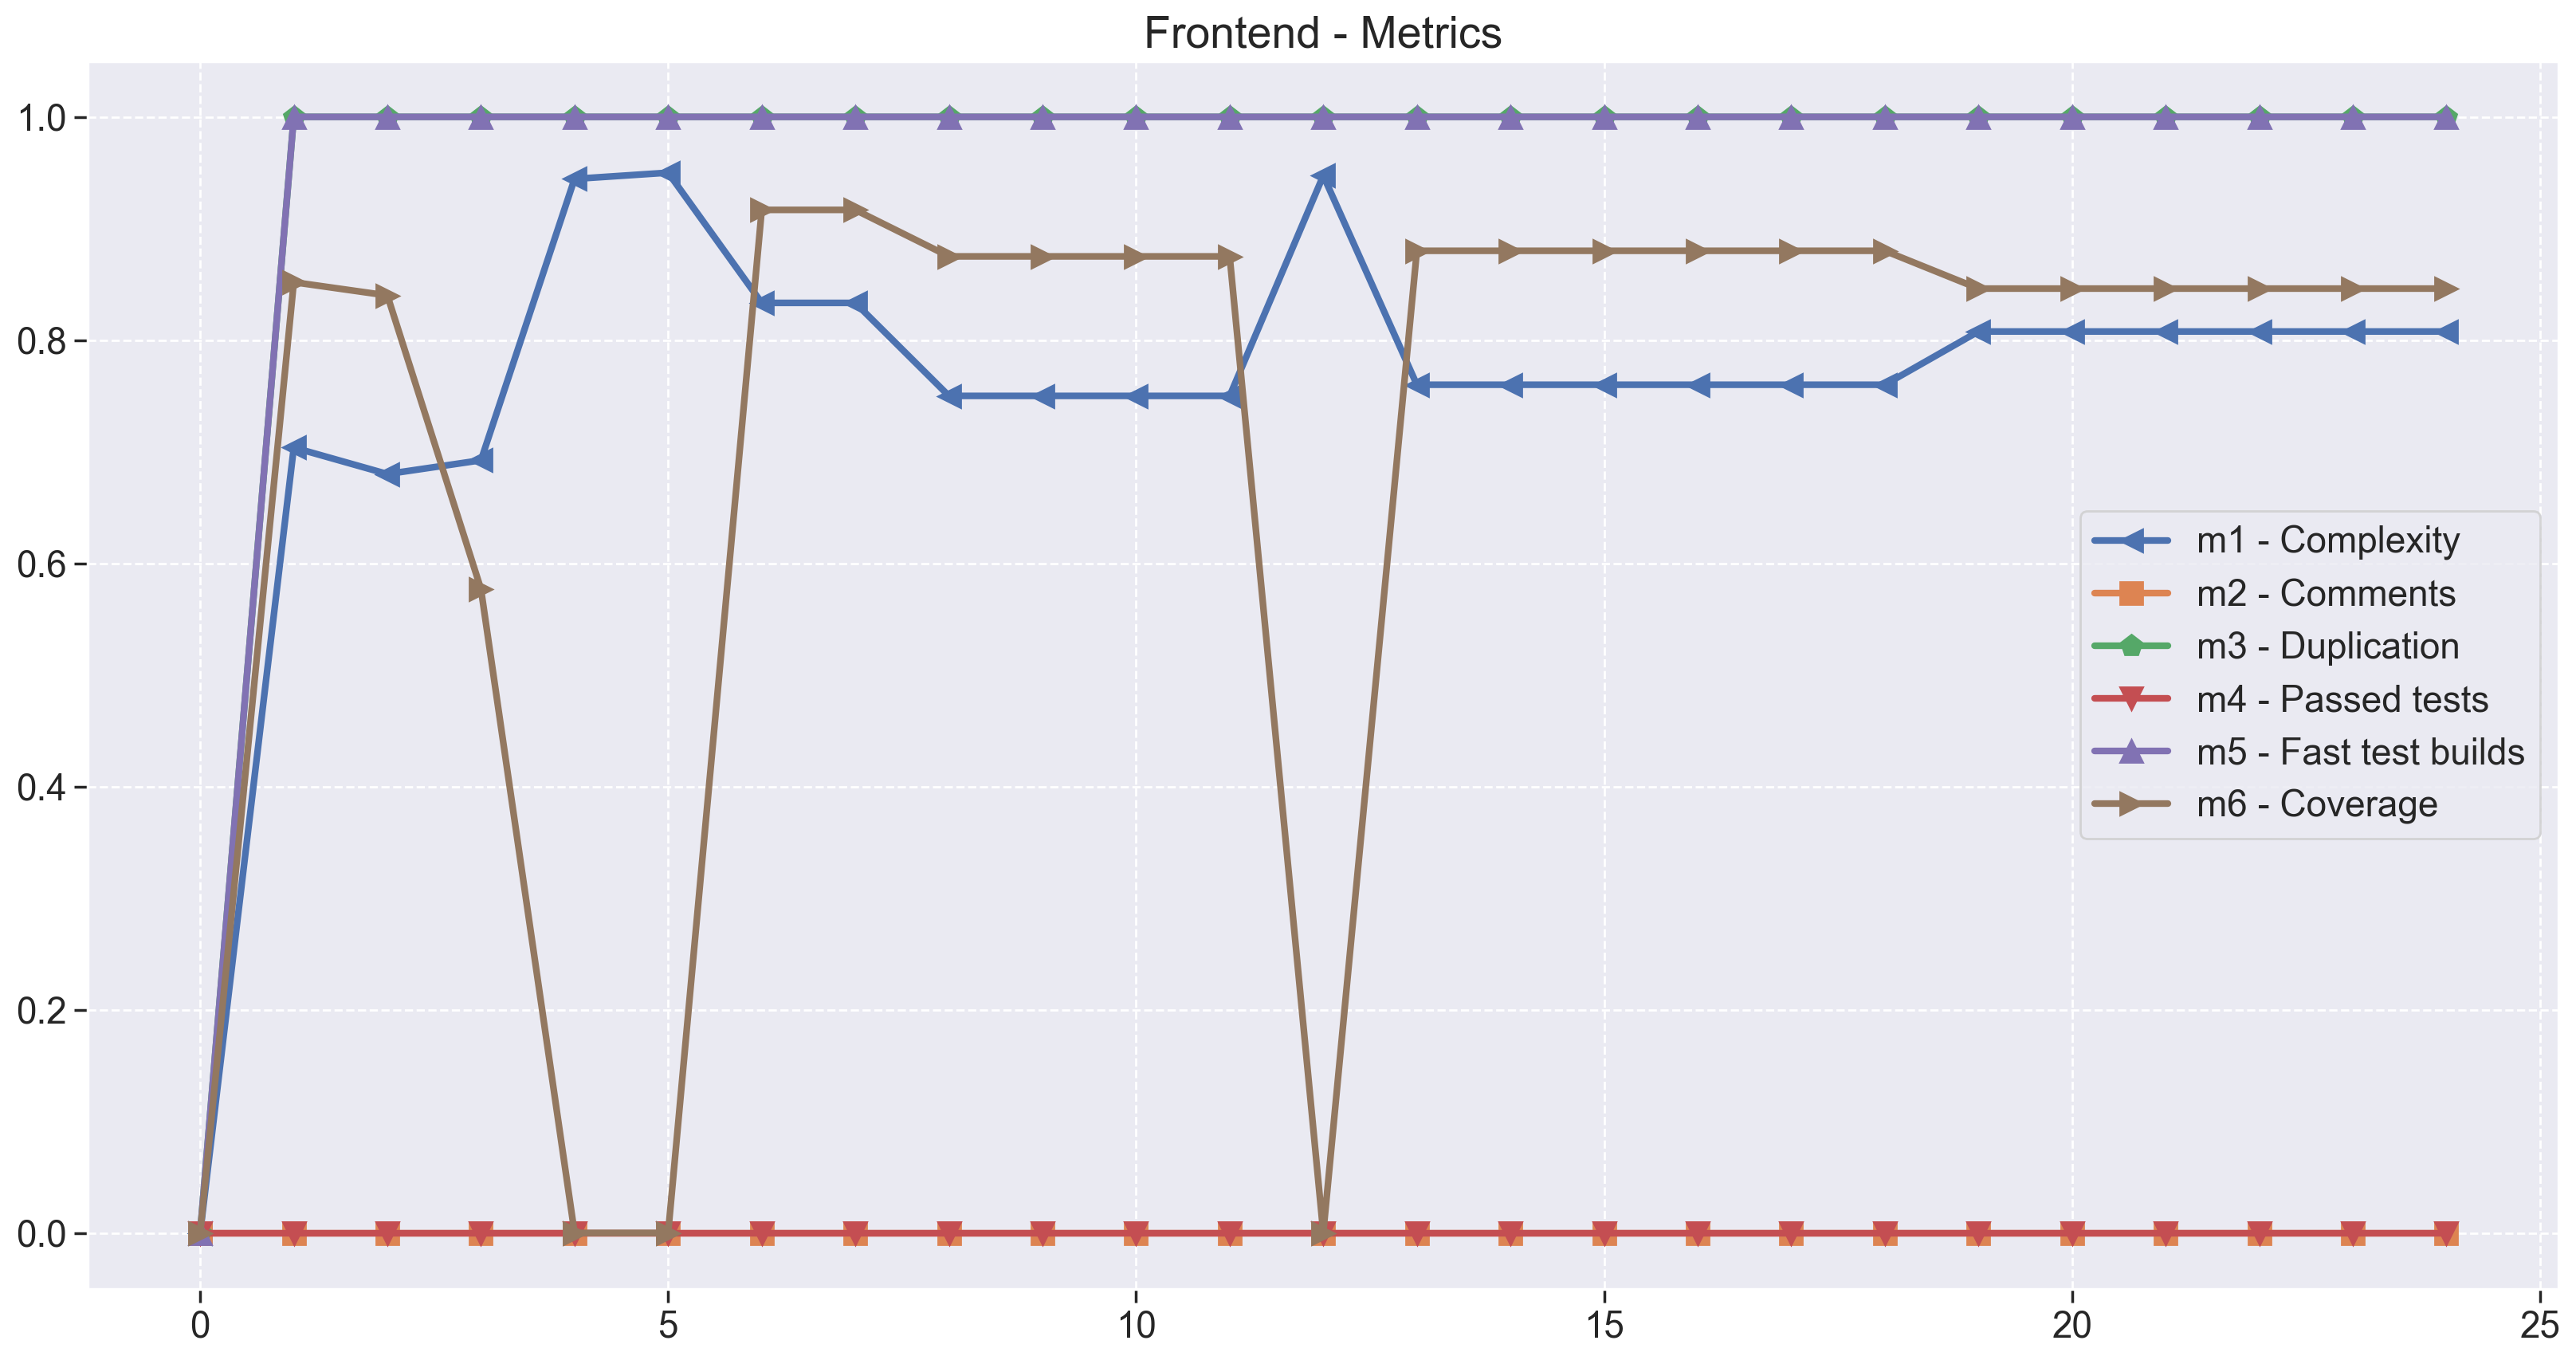

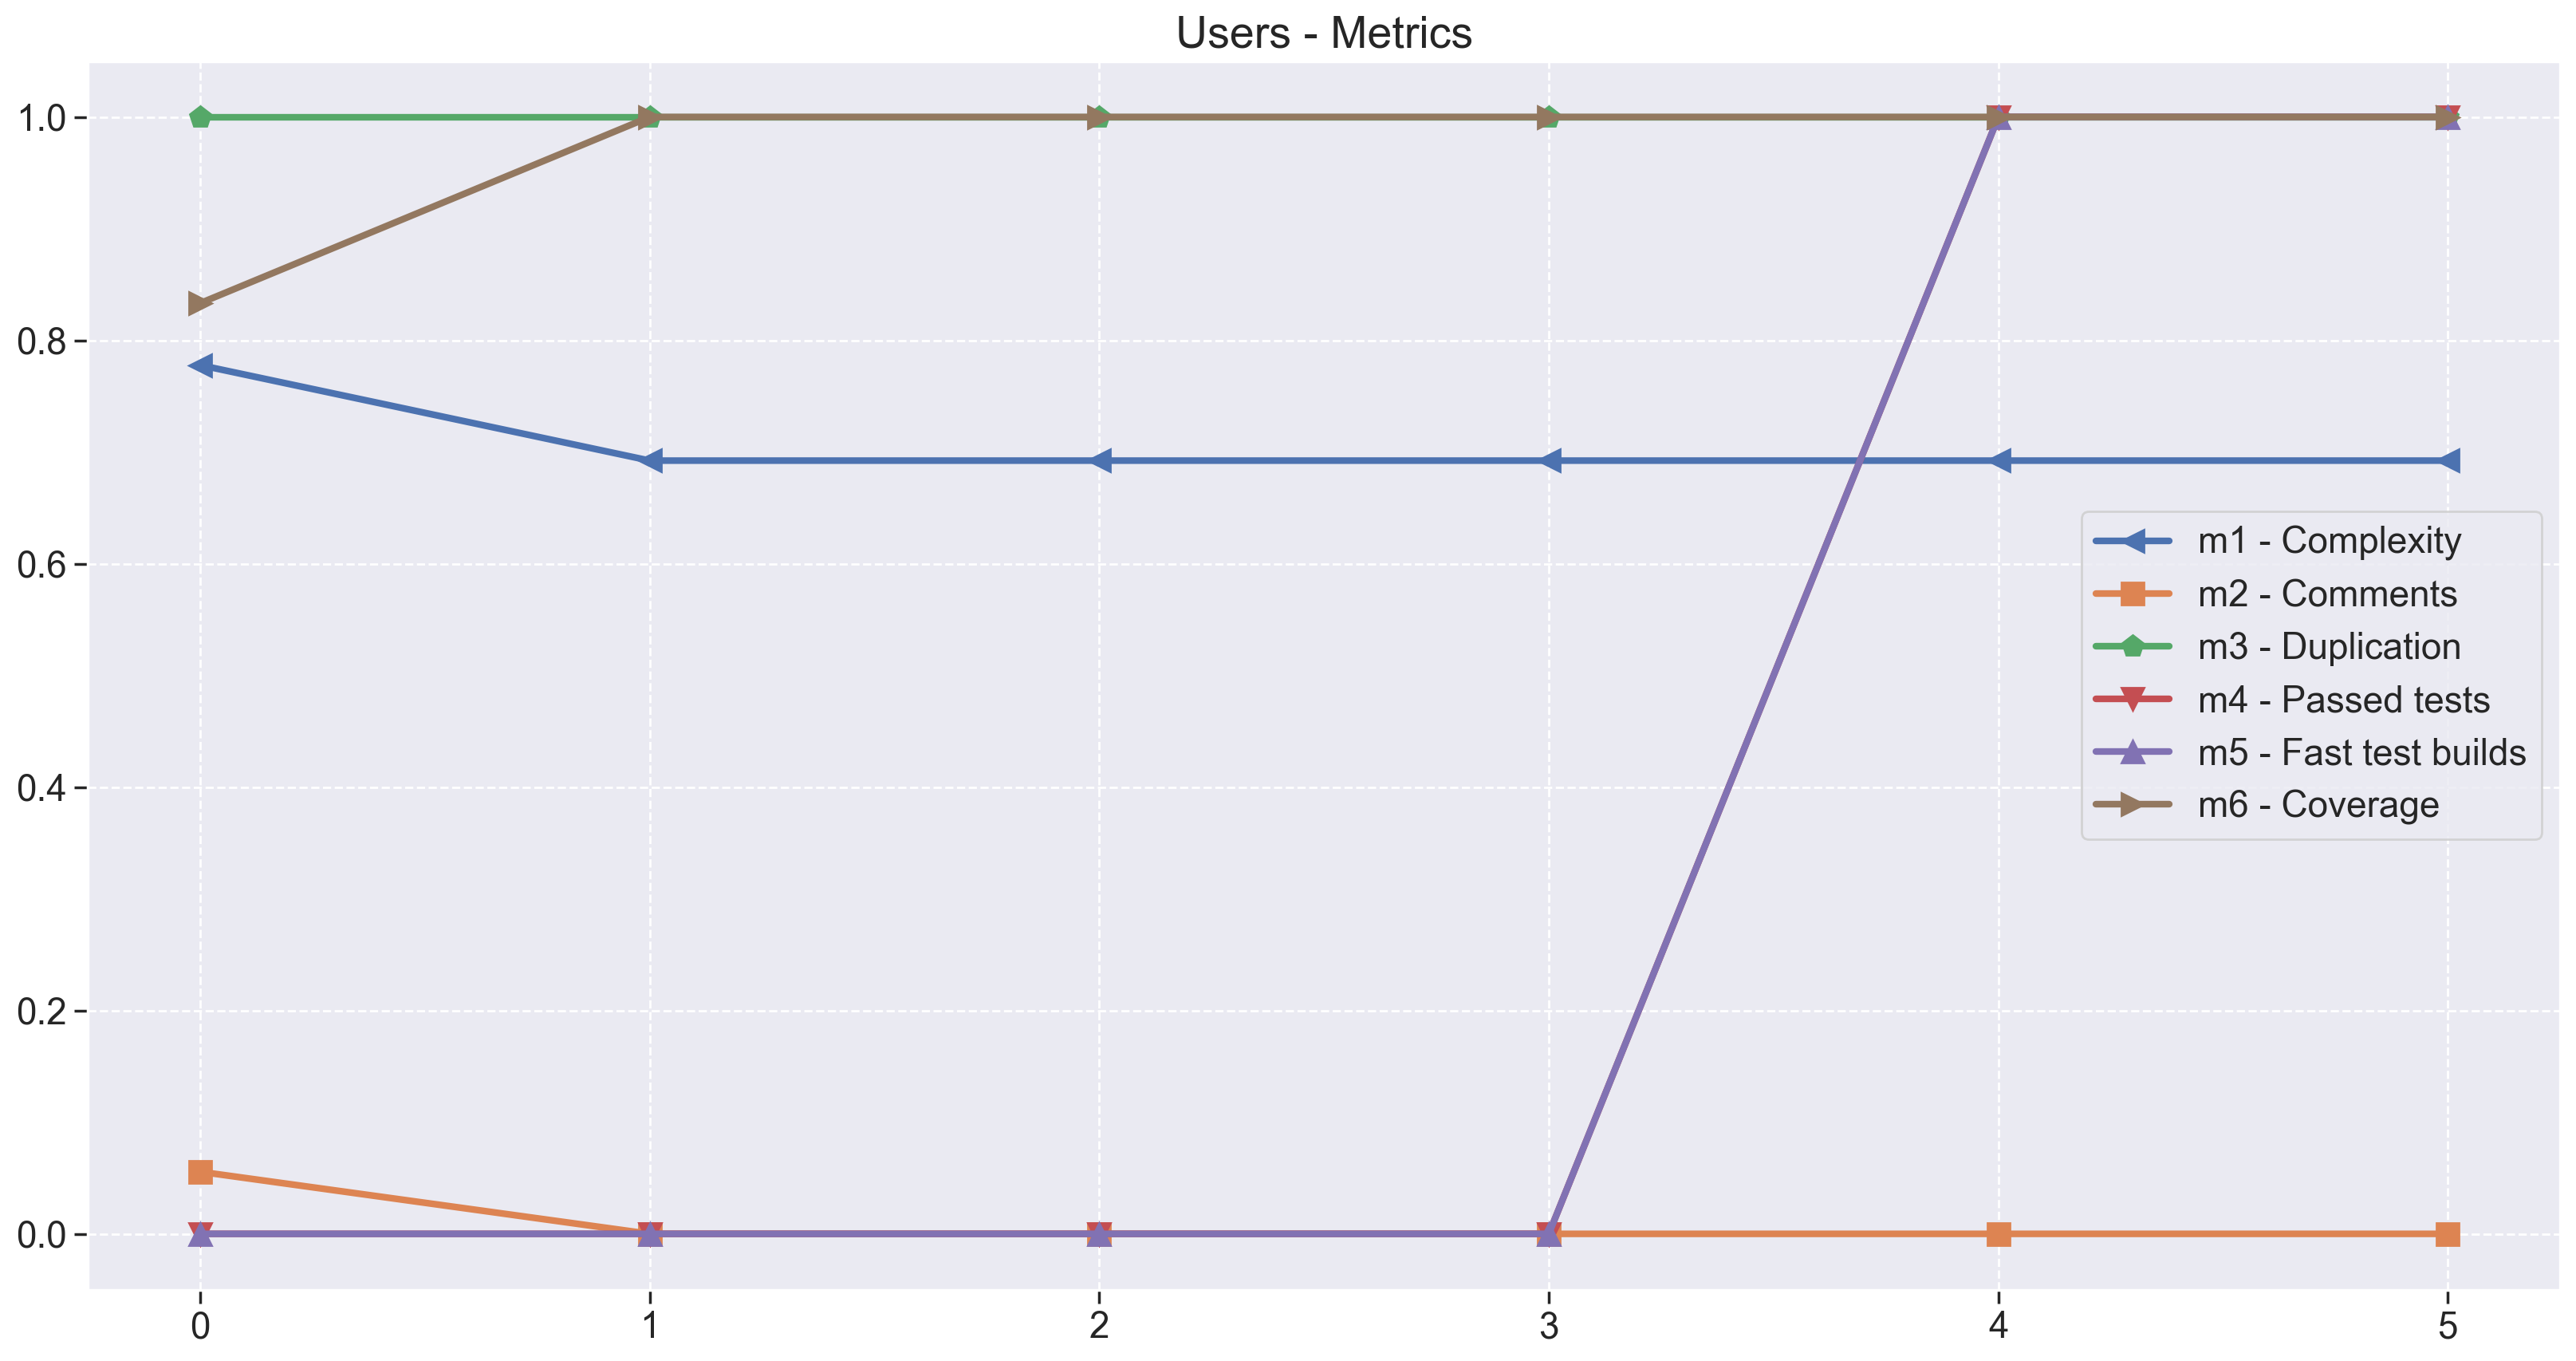

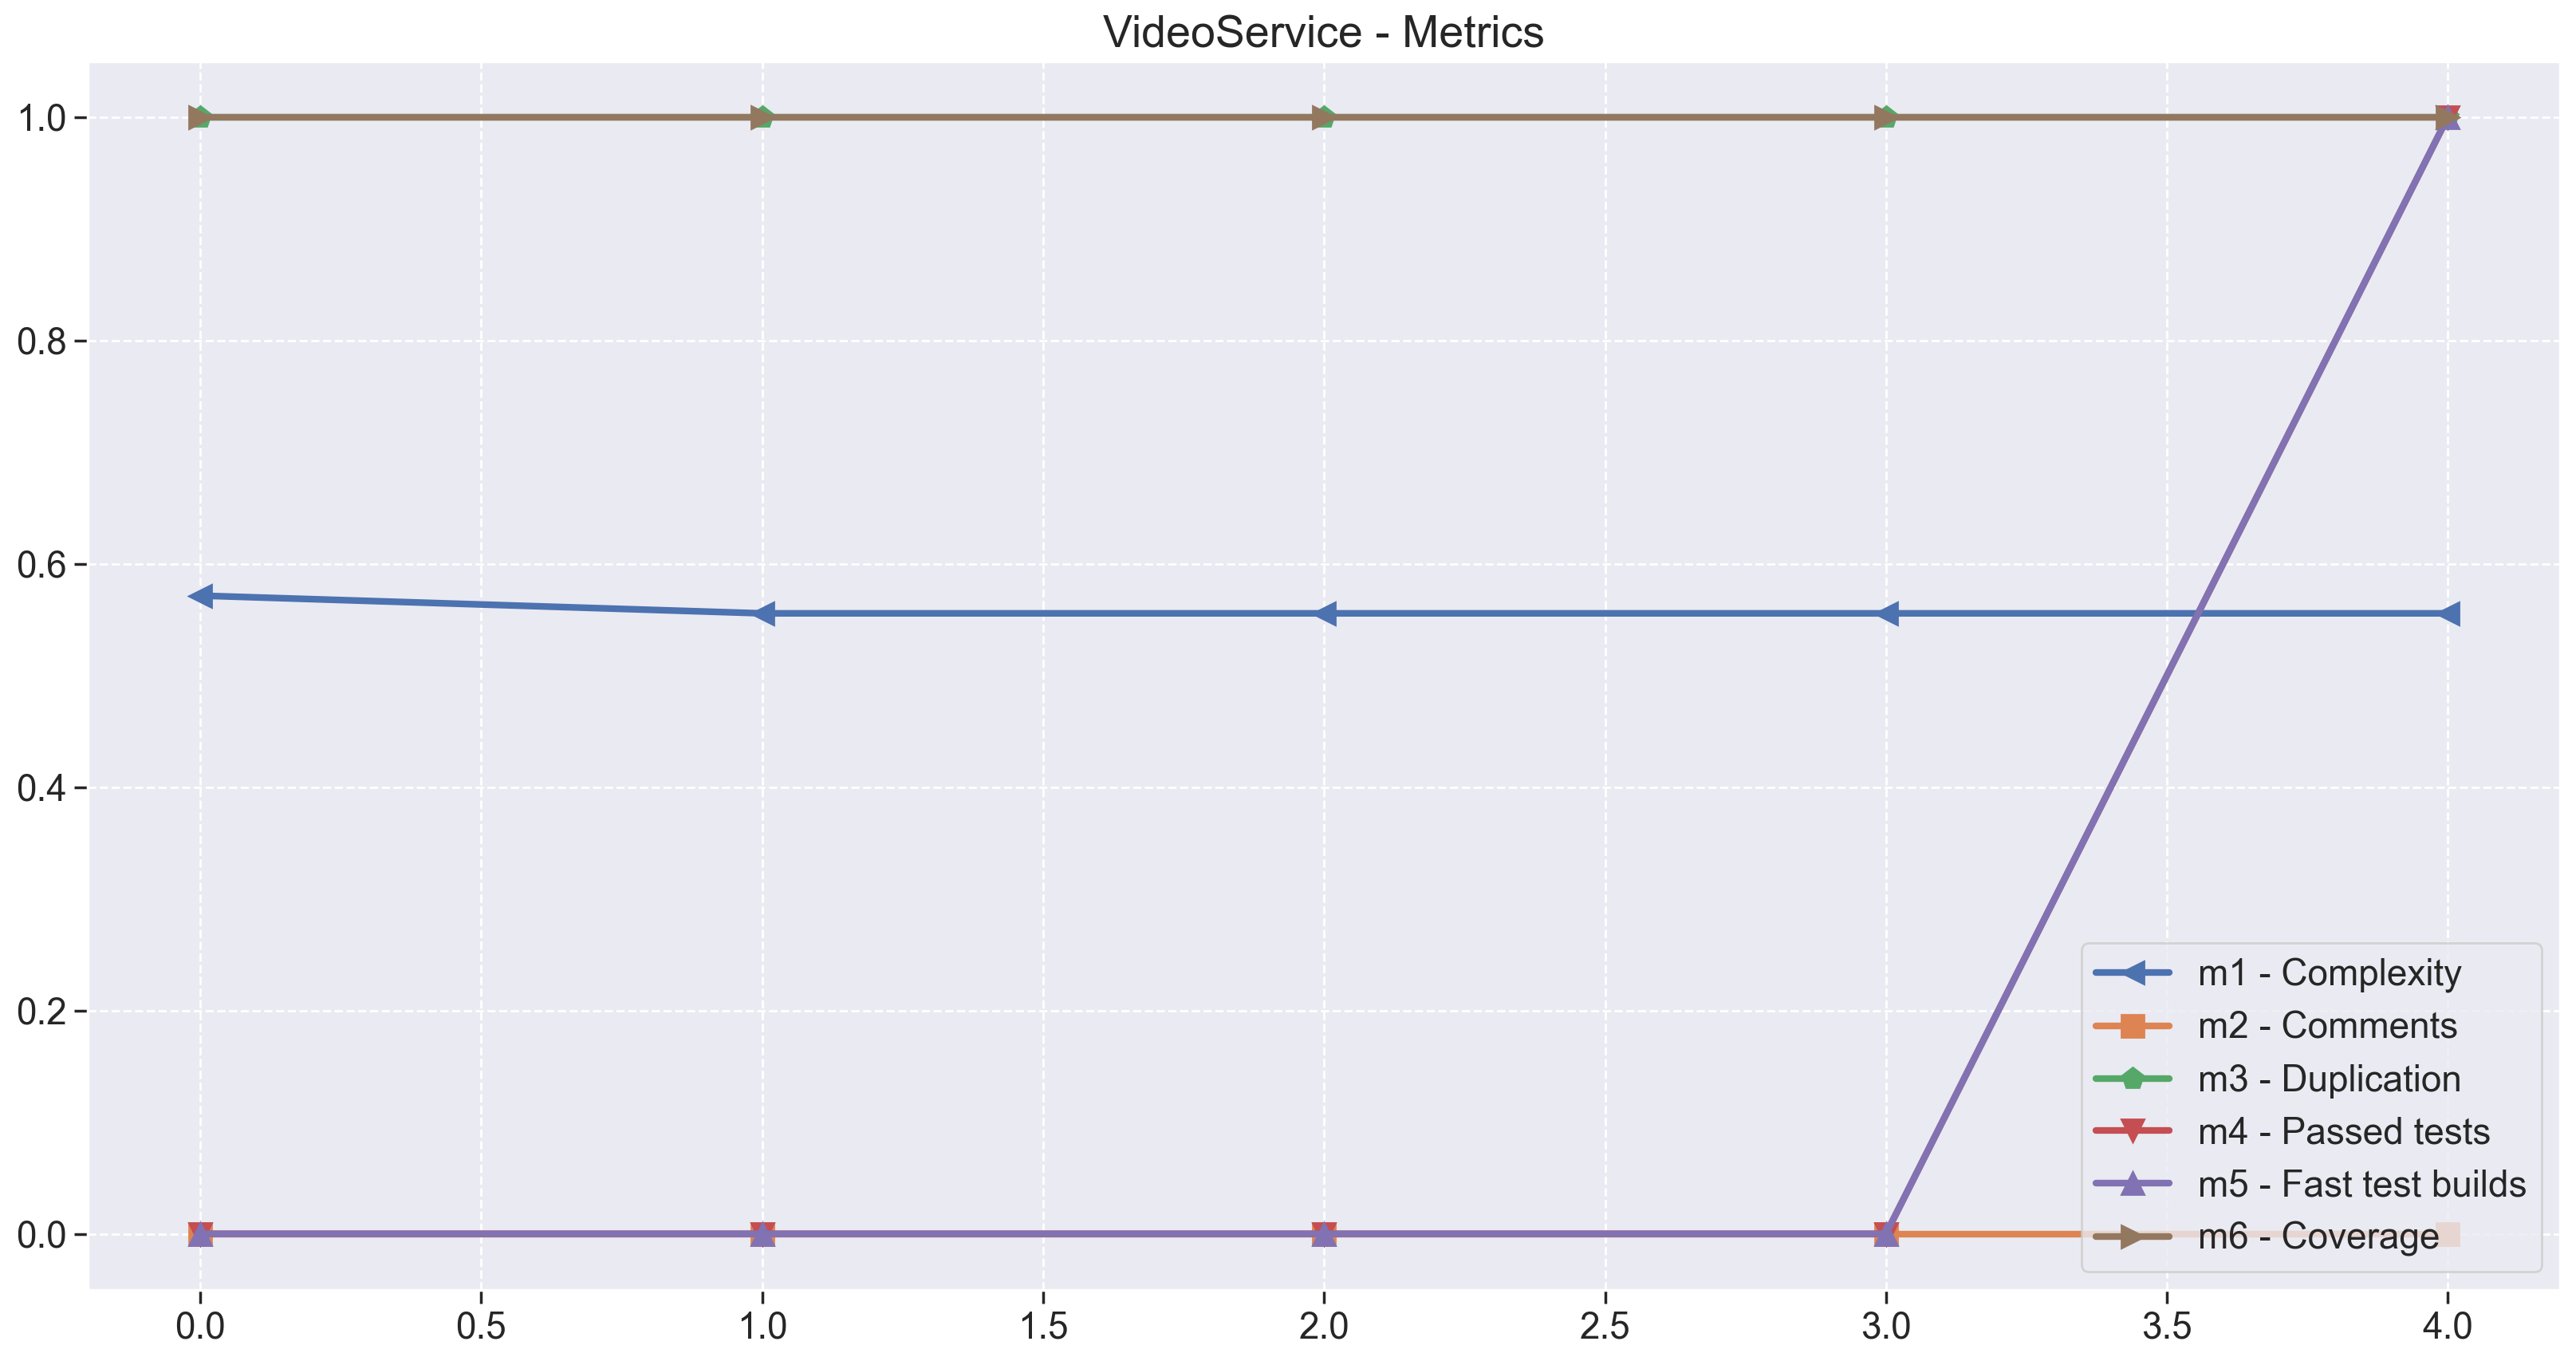

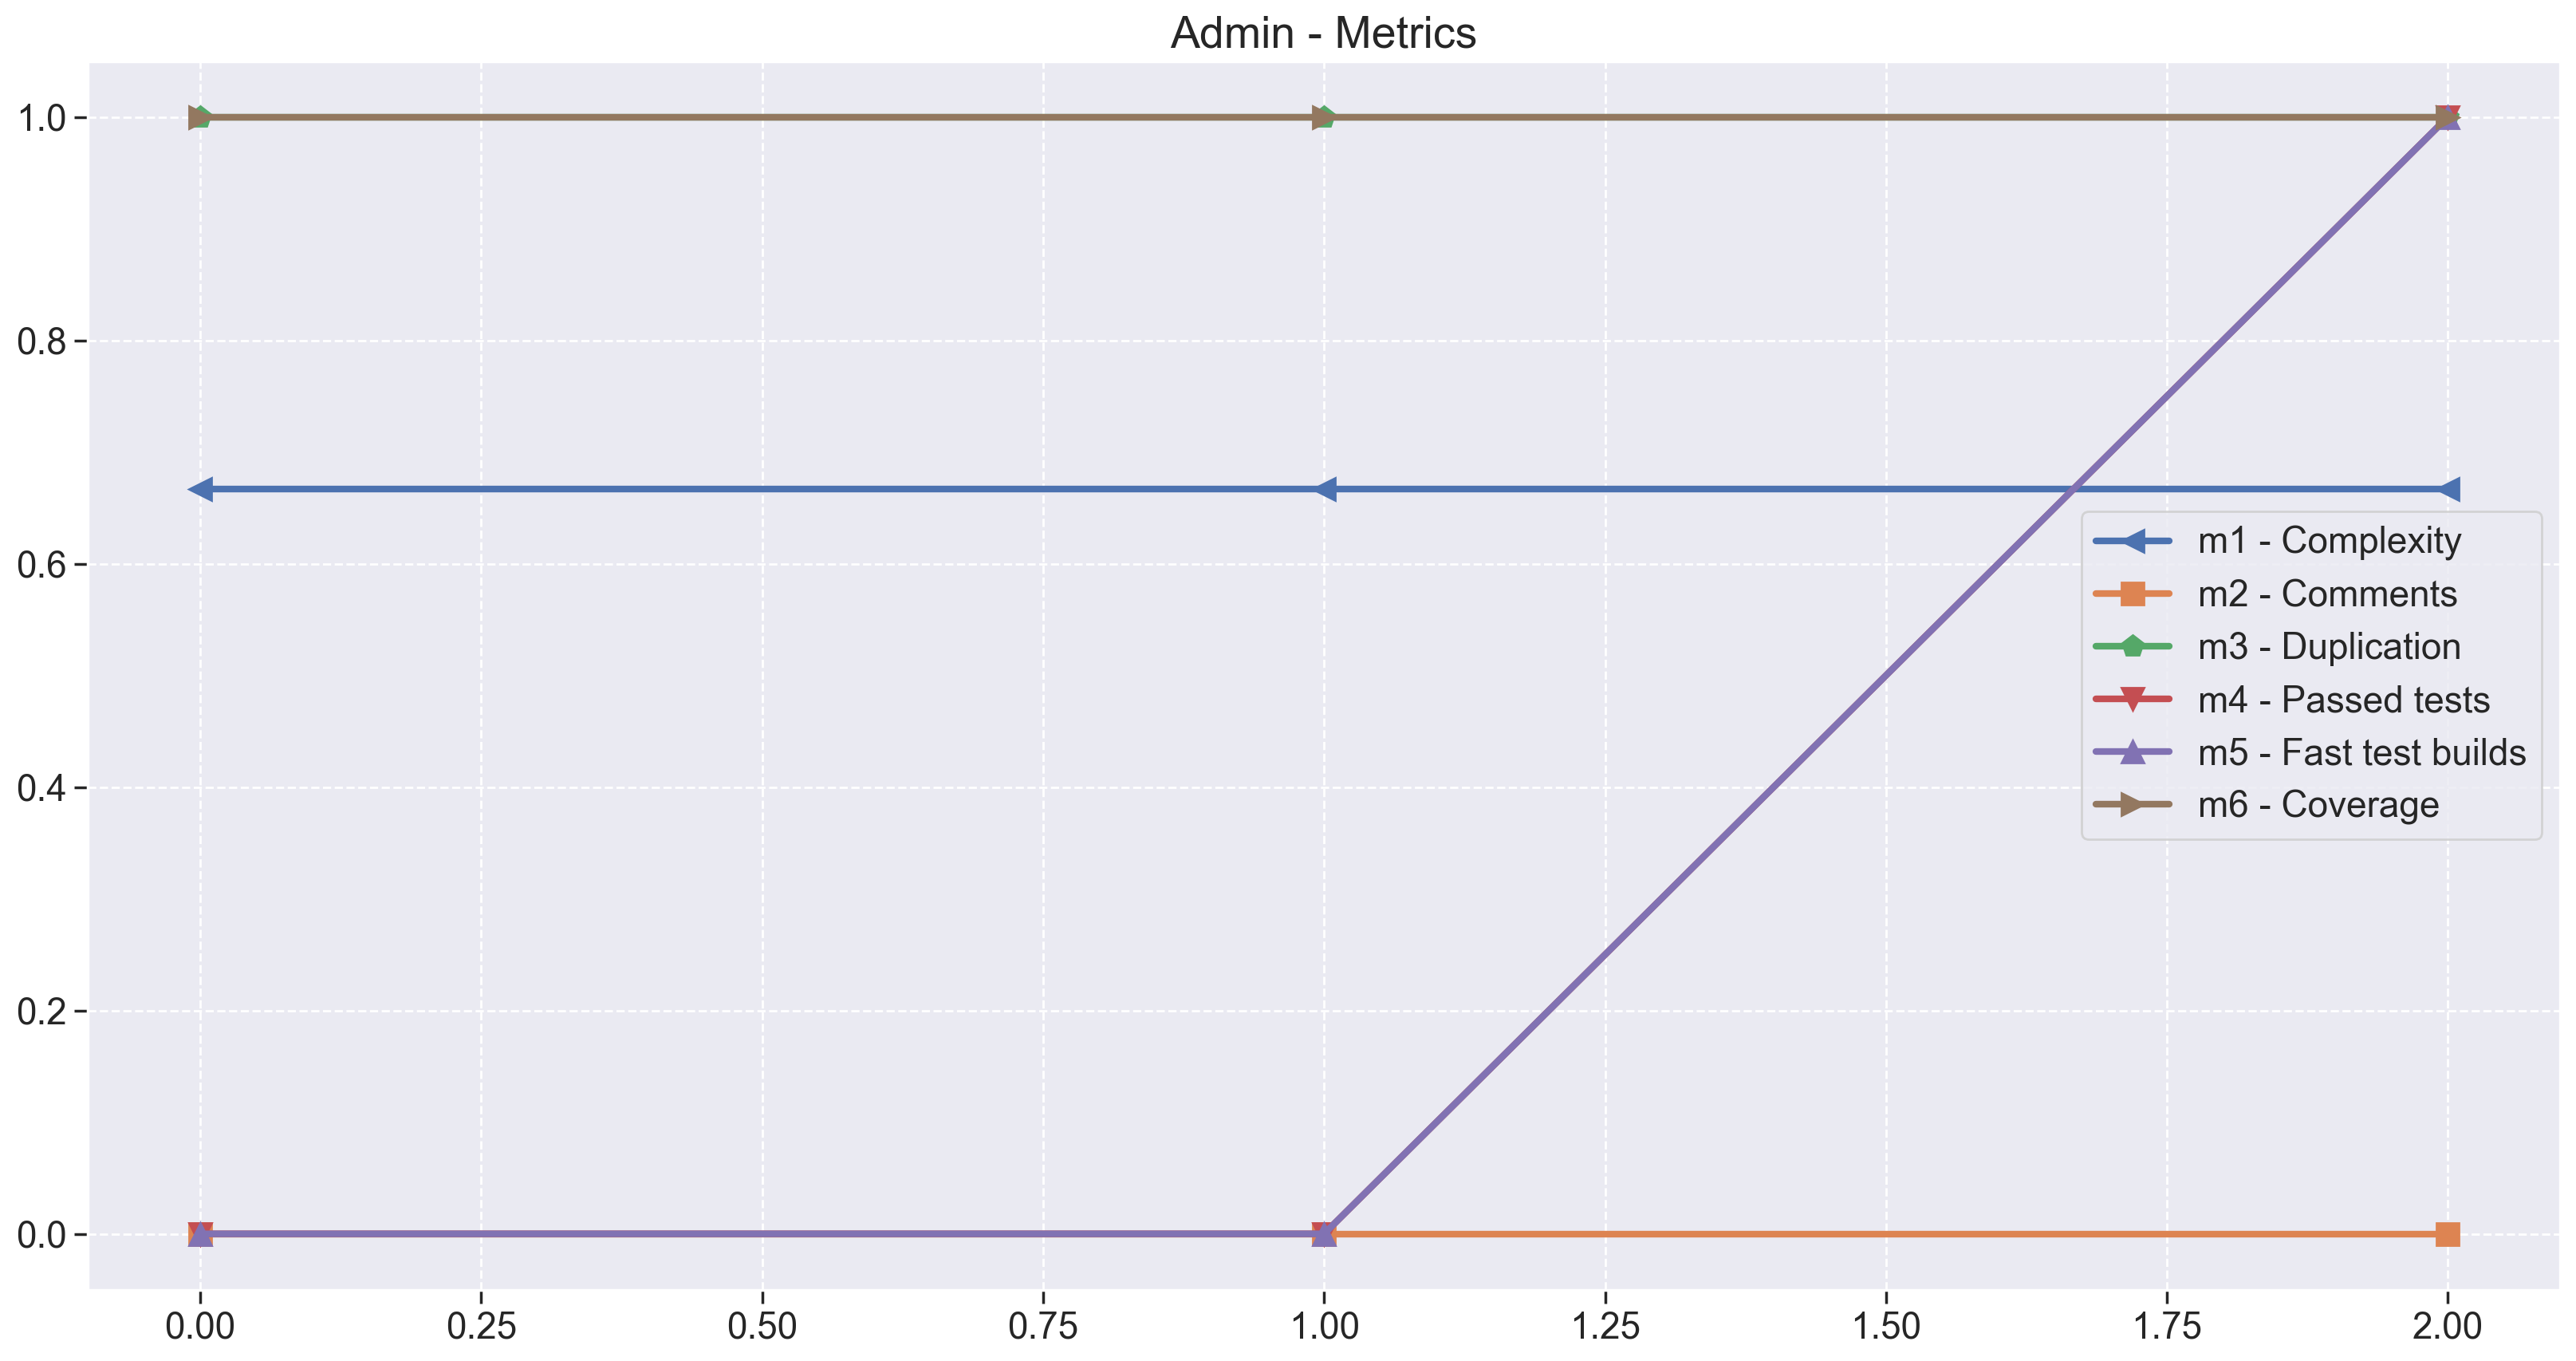

In [24]:
for name, data in metrics.items():
    fig = plt.figure(figsize=(20, 10))

    plt.plot(data['m1'], linewidth=3, marker='<', markersize=10, label="m1 - Complexity")
    plt.plot(data['m2'], linewidth=3, marker='s', markersize=10, label="m2 - Comments")
    plt.plot(data['m3'], linewidth=3, marker='p', markersize=10, label="m3 - Duplication")
    plt.plot(data['m4'], linewidth=3, marker='v', markersize=10, label="m4 - Passed tests")
    plt.plot(data['m5'], linewidth=3, marker='^', markersize=10, label="m5 - Fast test builds")
    plt.plot(data['m6'], linewidth=3, marker='>', markersize=10, label="m6 - Coverage")

    plt.title(f"{name} - Metrics", fontsize=20)
    plt.legend(loc='best')
    plt.show()

## Quality factor and aspect aggregation

In [25]:
psc1 = 1
psc2 = 1
pc1 = 0.5
pc2 = 0.5
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33
pm4 = 0.25
pm5 = 0.25
pm6 = 0.5


# Here you will need to create the code_quality and testing_status metrics for each repository.

for name, data in metrics.items():
    data['code_quality'] = ((data['m1']*pm1) + (data['m2']*pm2) + (data['m3']*pm3)) * psc1
    data['testing_status'] = ((data['m4']*pm4) + (data['m5']*pm5) + (data['m6']*pm6)) * psc2

### Code Quality visualization

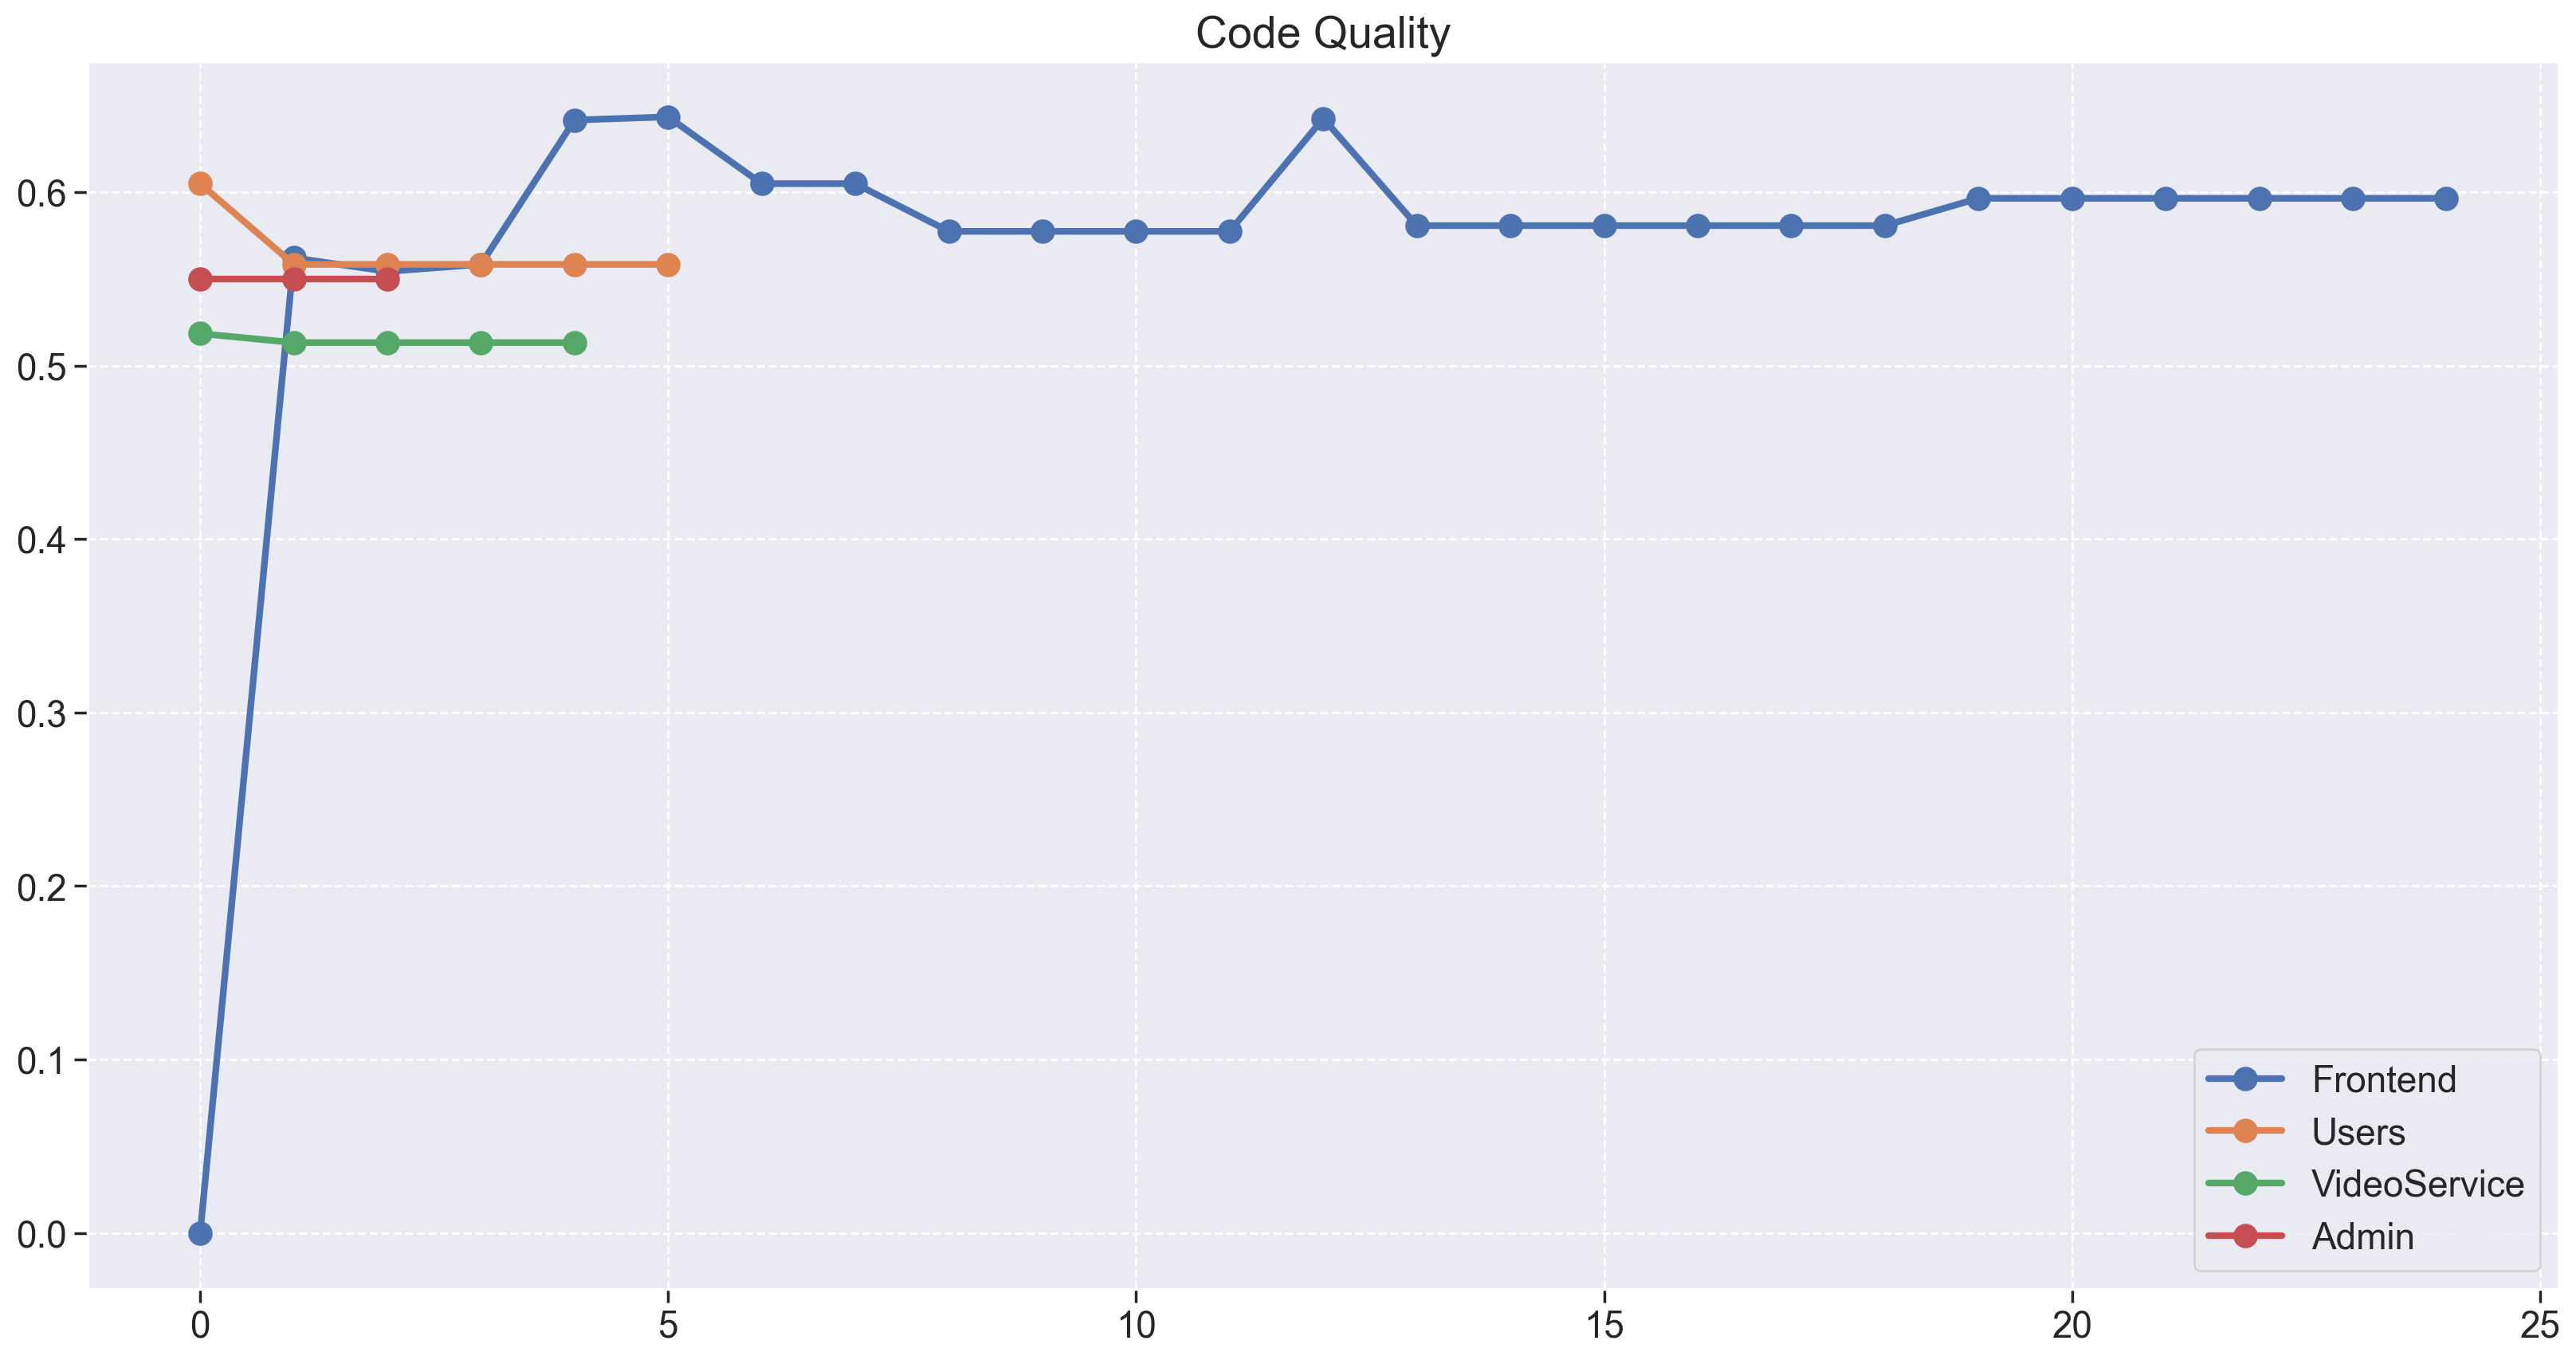

In [26]:
fig = plt.figure(figsize=(20, 10))

for name, data in metrics.items():
    plt.plot(data['code_quality'], linewidth=3, marker='o', markersize=10, label=name)

plt.title("Code Quality", fontsize=20)
plt.legend(loc='best')
plt.show()

### Testing Status visualization

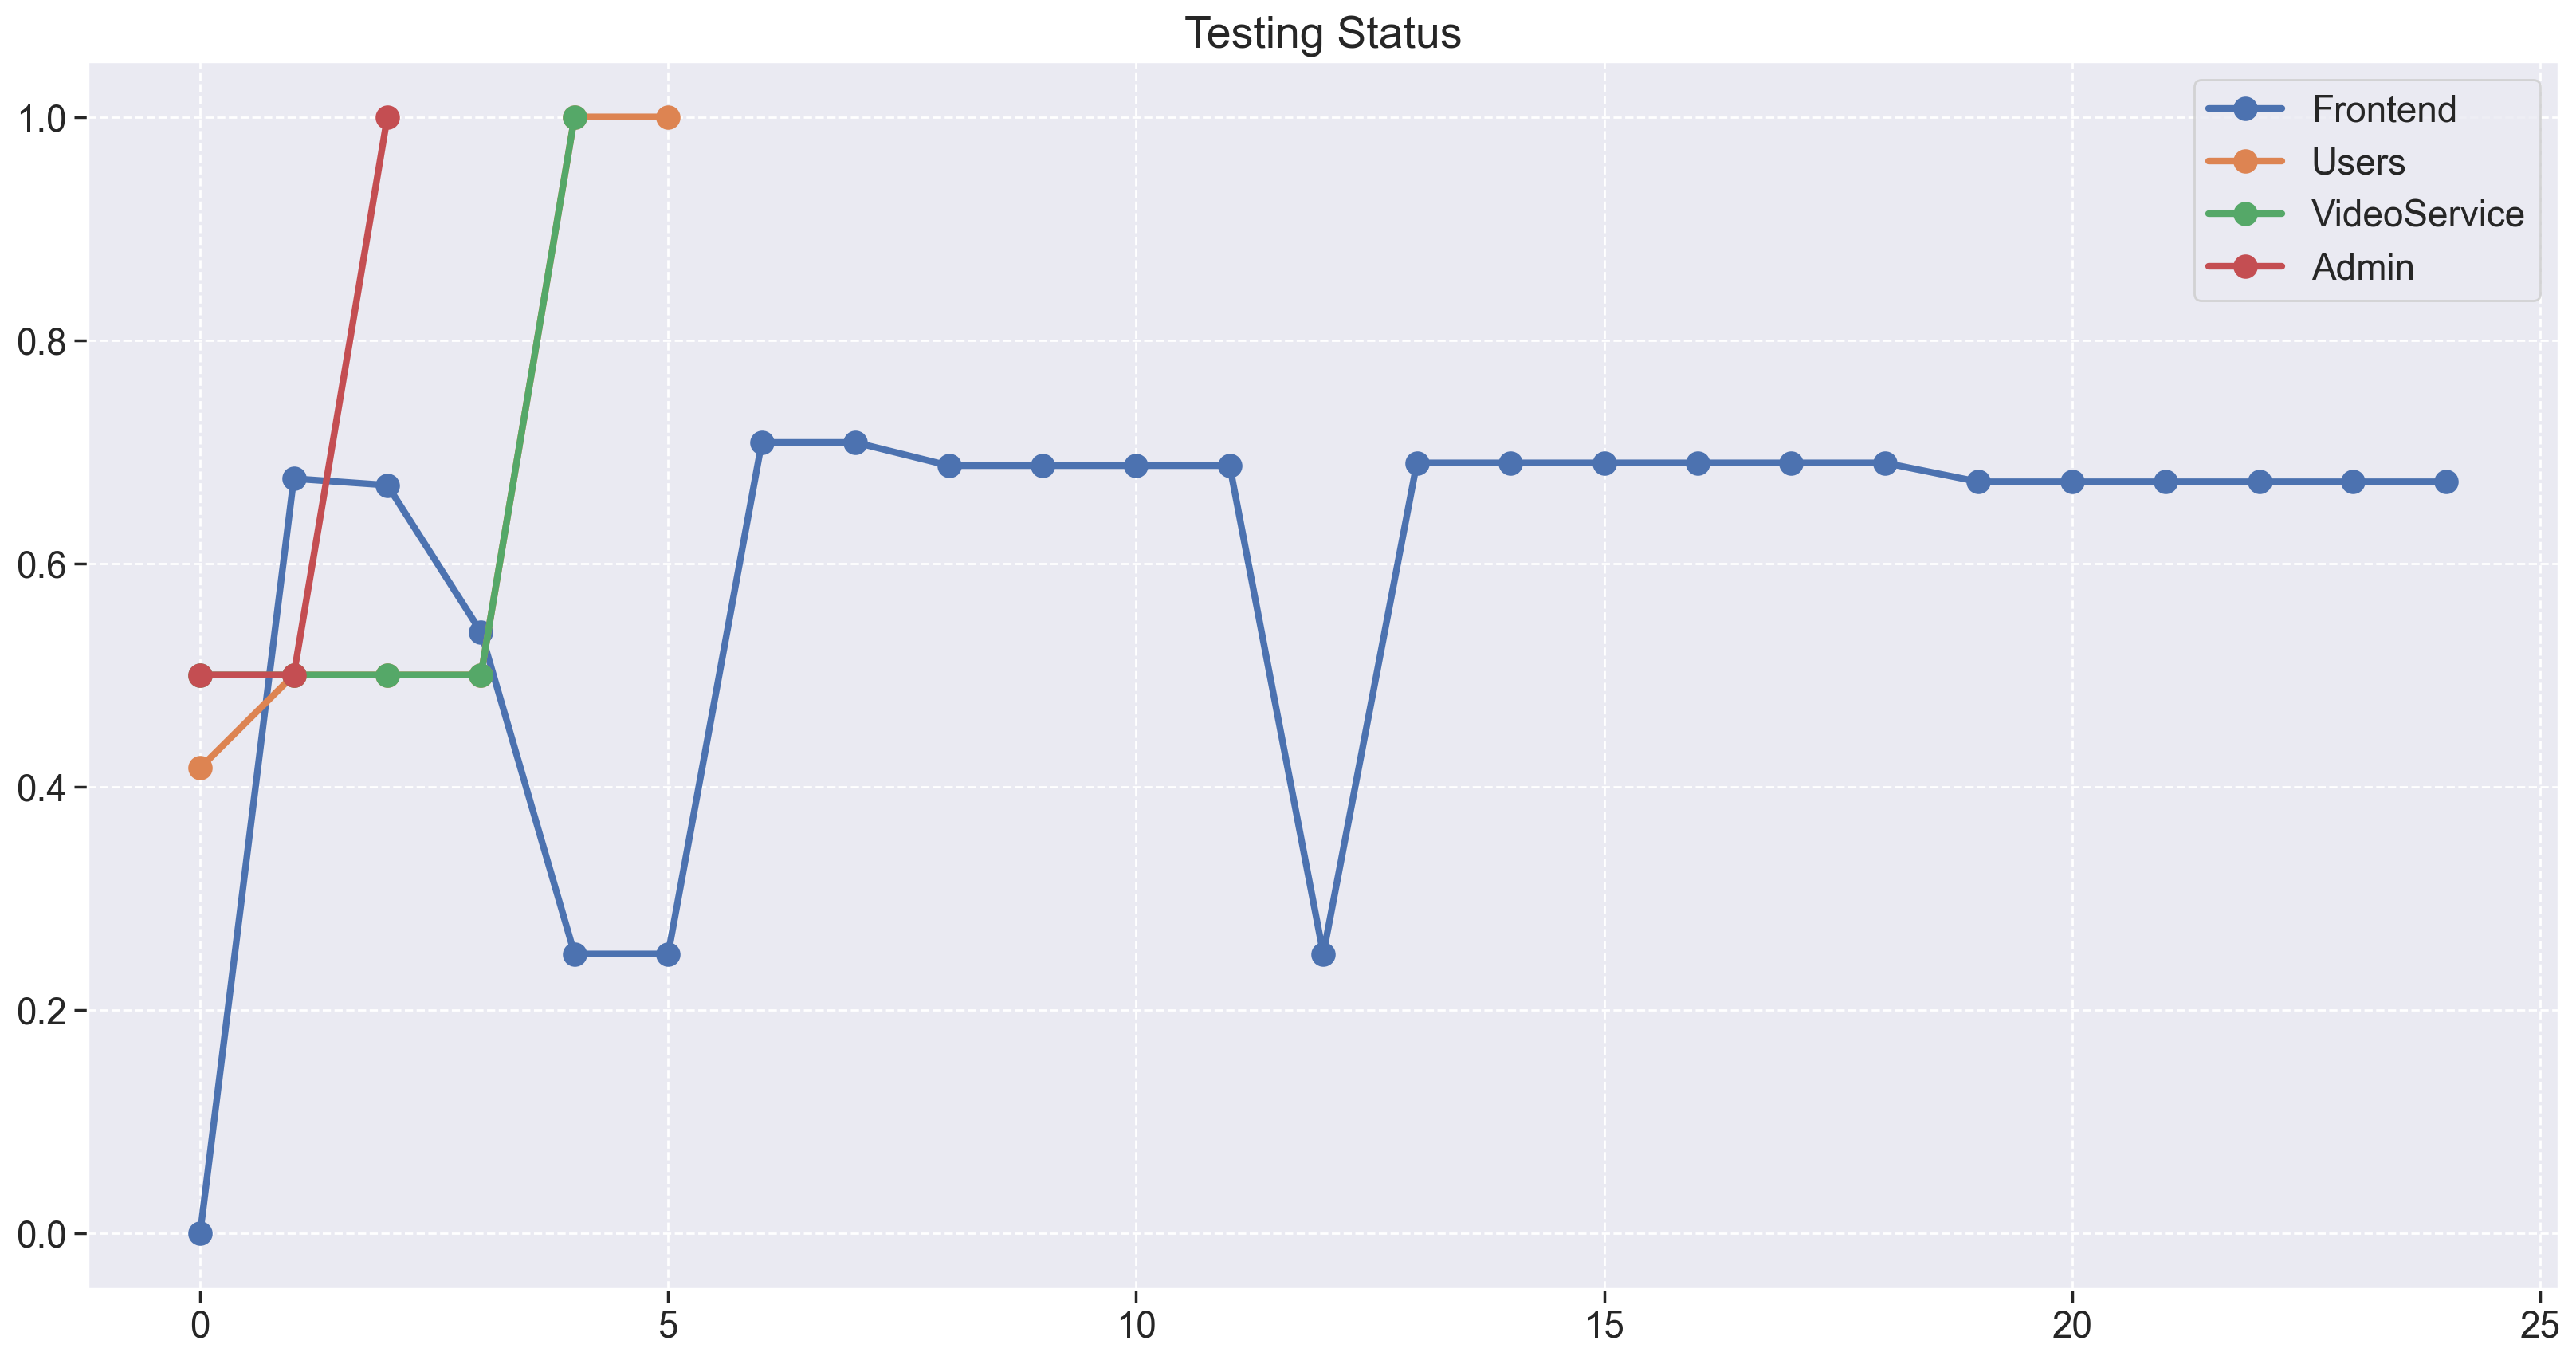

In [27]:
fig = plt.figure(figsize=(20, 10))

for name, data in metrics.items():
    plt.plot(data['testing_status'], linewidth=3, marker='o', markersize=10, label=name)

plt.title("Testing Status", fontsize=20)
plt.legend(loc='best')
plt.show()

### Aggregations

In [28]:
for name, data in metrics.items():
    data['Maintainability'] = data['code_quality'] * pc1
    data['Reliability'] = data['testing_status'] * pc2
    data['total'] = data['Maintainability'] + data['Reliability']

## Repositories analysis

In [29]:
def get_characteristc_stats(repo_series):
    return {
        'mean': repo_series.mean(),
        'mode': repo_series.mode(),
        'median': repo_series.median(),
        'std': repo_series.std(),
        'var': repo_series.var(),
        'min': repo_series.min(),
        'max': repo_series.max()
    }

In [30]:
def analysis(metrics, name):
    maintainability_stats = pd.DataFrame(get_characteristc_stats(metrics["Maintainability"]),
                                     columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])

    reliability_stats = pd.DataFrame(get_characteristc_stats(metrics["Reliability"]),
                                 columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])


    print("Maintainability Stats")
    print(maintainability_stats.to_string(index=False))

    print("Reliability Stats")
    print(reliability_stats.to_string(index=False))

    fig = plt.figure(figsize=(20, 10))

    plt.plot(metrics['Maintainability'], linewidth=3, marker='o', markersize=10, label="Maintainability")
    plt.plot(metrics['Reliability'], linewidth=3, marker='*', markersize=10, label="Reliability")

    plt.ylim(0.1,1.1)
    plt.title(f'{name} - Maintainability and Reliability', fontsize=20)
    plt.legend(loc='best')
    plt.show()

    fig = plt.figure(figsize=(20, 10))

    plt.plot(metrics['total'], linewidth=3, marker='X', markersize=5)

    plt.ylim(0.1,1.1)
    plt.title(f'{name} - Total', fontsize=20)
    plt.show()

### Analysis loop in each repo

Frontend
Maintainability Stats
    mean     mode  median      std      var  min     max
0.283738 0.290400  0.2904 0.060259 0.003631  0.0 0.32175
0.283738 0.298269  0.2904 0.060259 0.003631  0.0 0.32175
Reliability Stats
   mean     mode   median      std      var  min      max
0.29959 0.336538 0.337963 0.095562 0.009132  0.0 0.354167
0.29959 0.345000 0.337963 0.095562 0.009132  0.0 0.354167


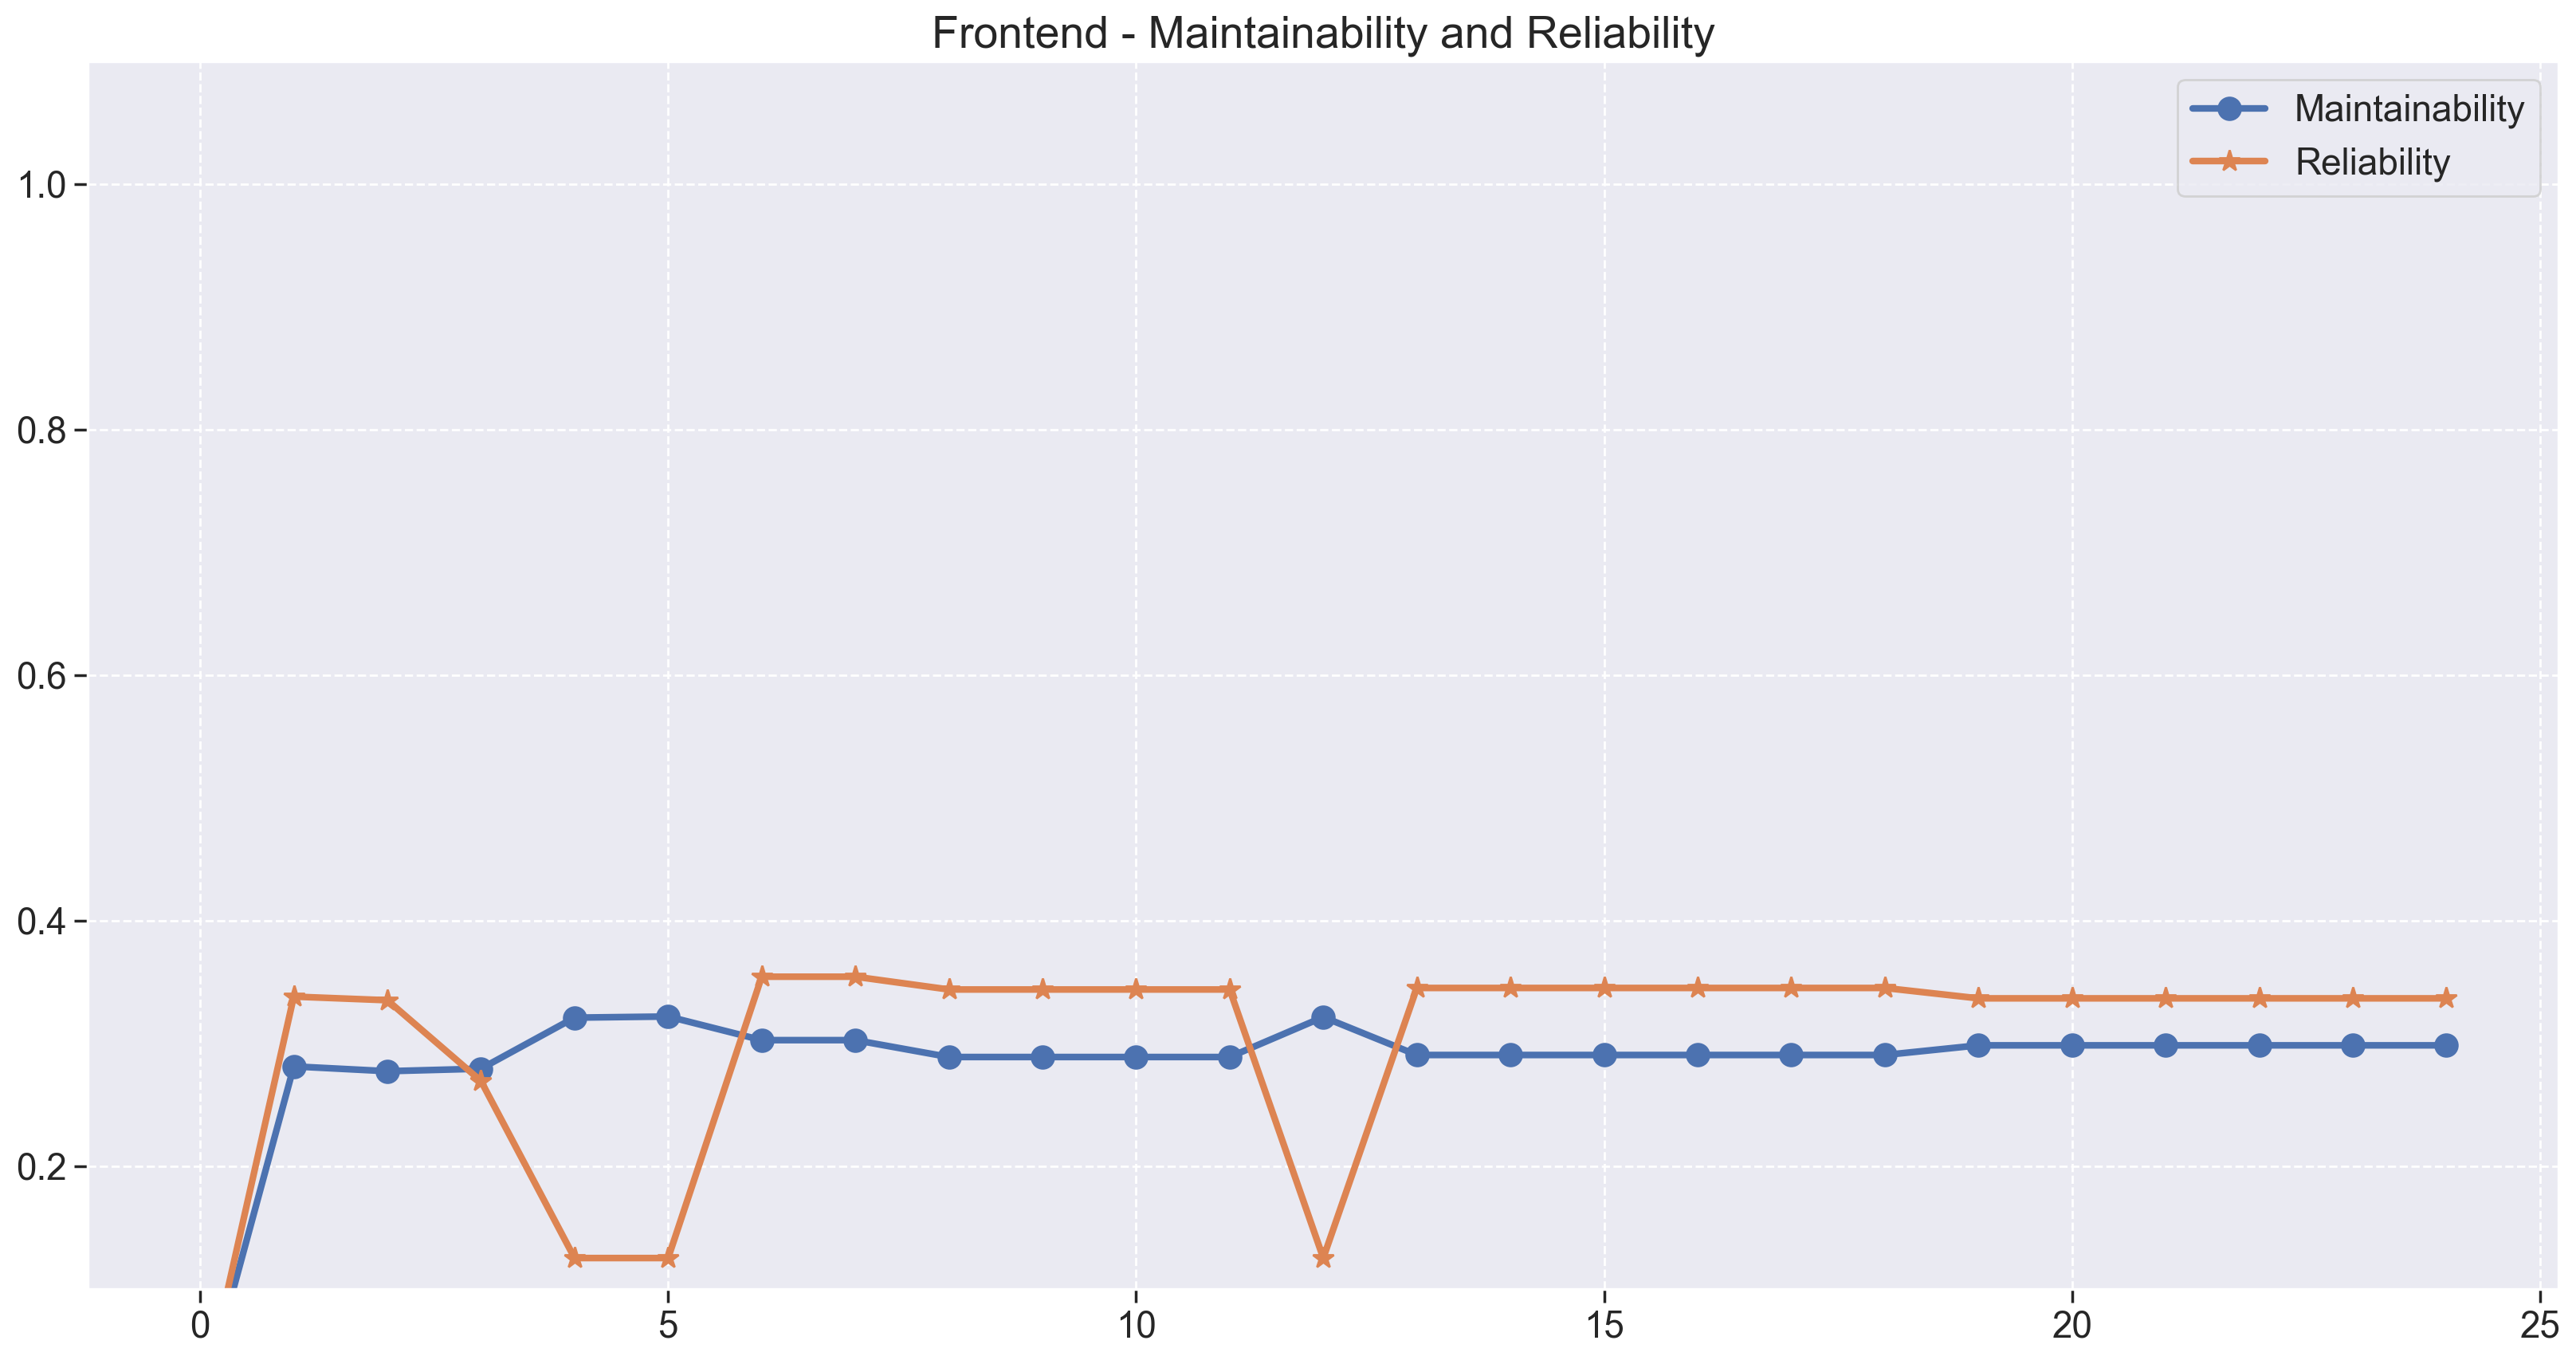

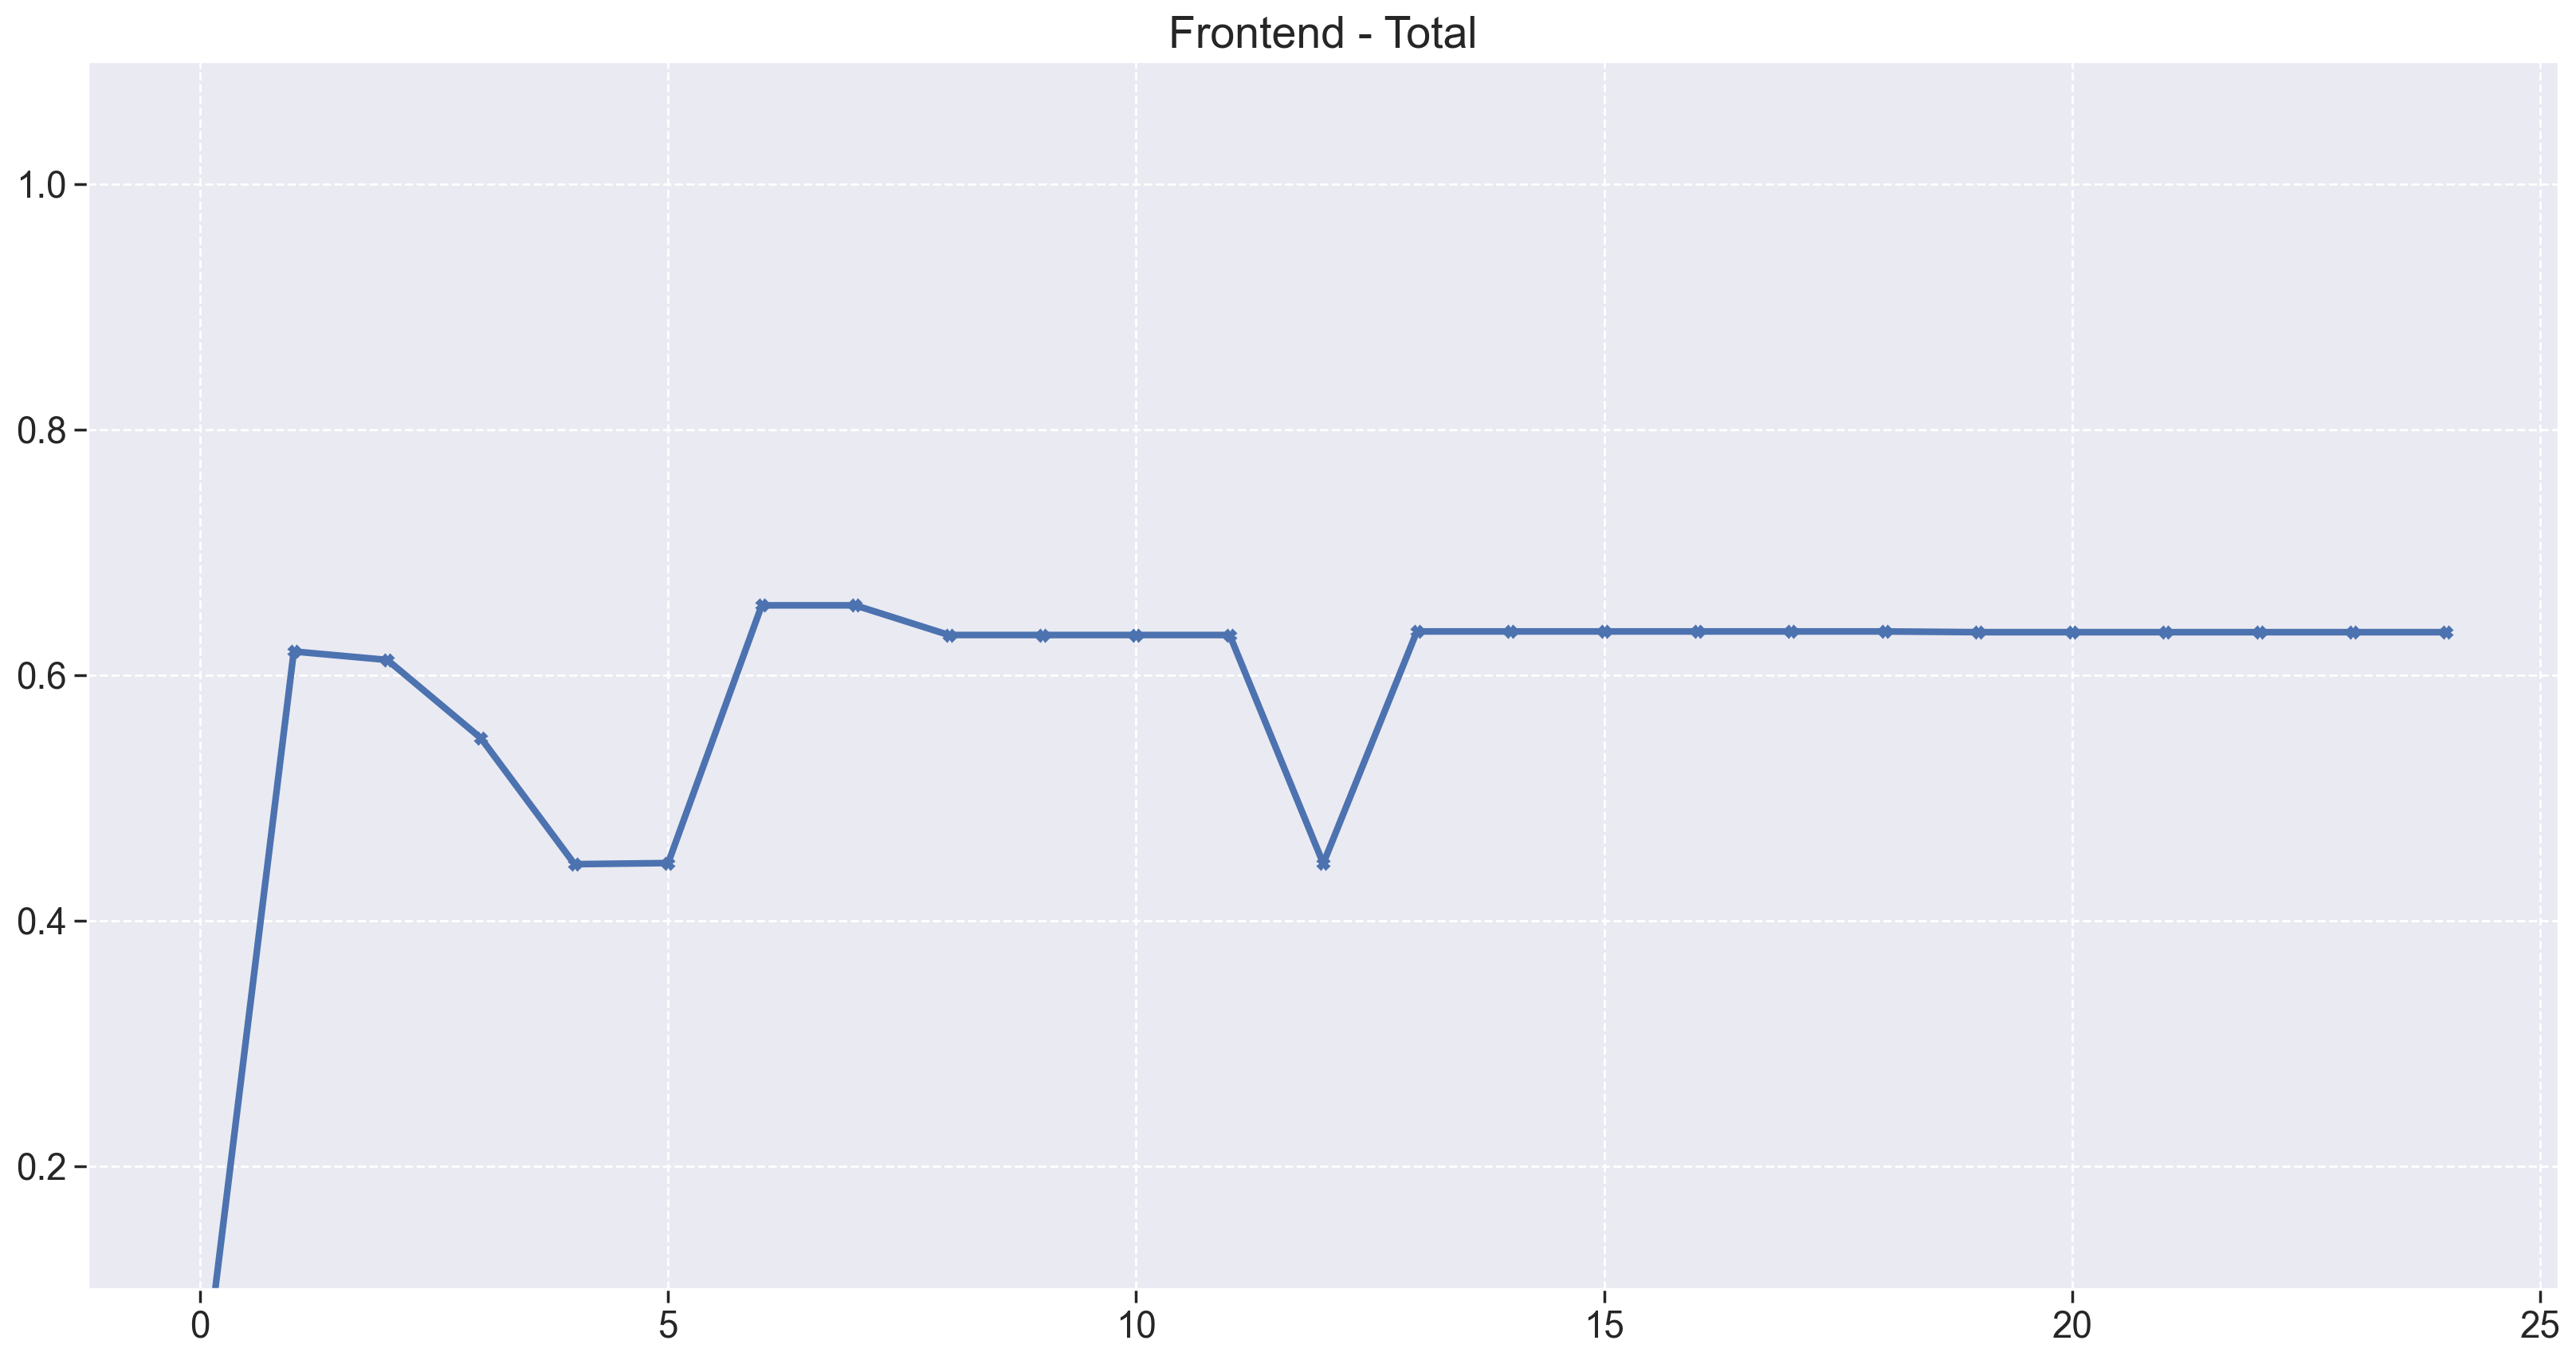

Users
Maintainability Stats
    mean     mode   median    std     var      min    max
0.283109 0.279231 0.279231 0.0095 0.00009 0.279231 0.3025
Reliability Stats
    mean  mode  median      std      var      min  max
0.326389  0.25    0.25 0.135443 0.018345 0.208333  0.5


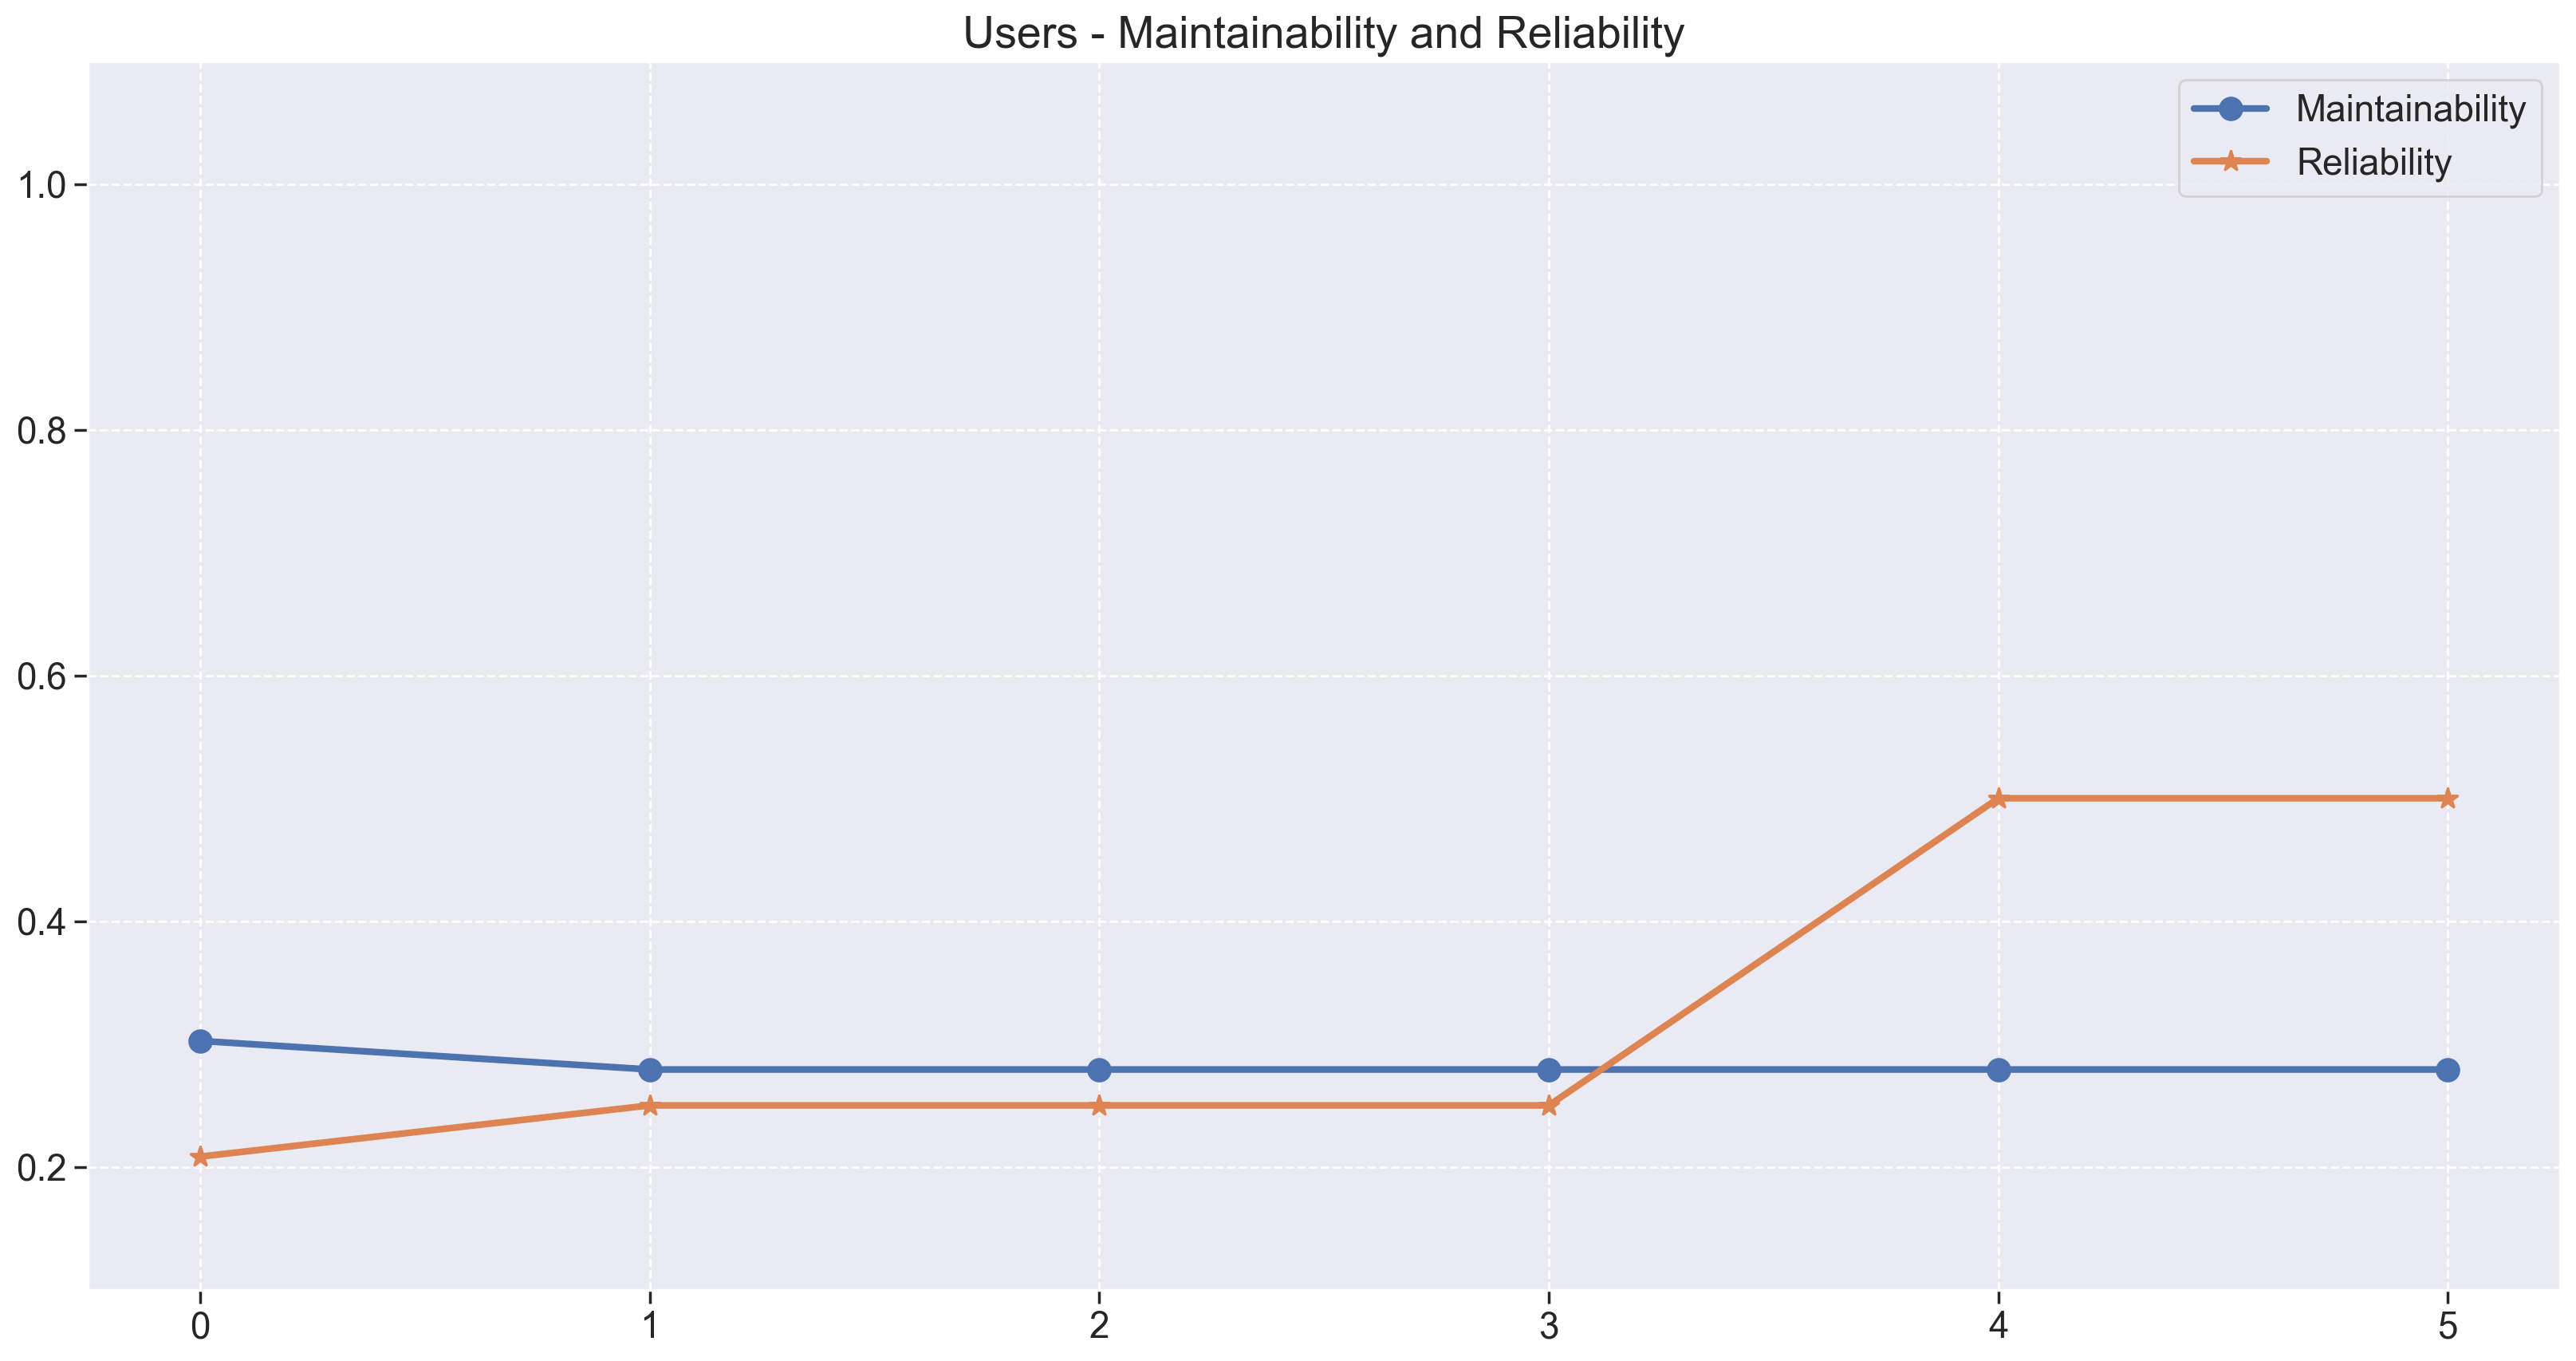

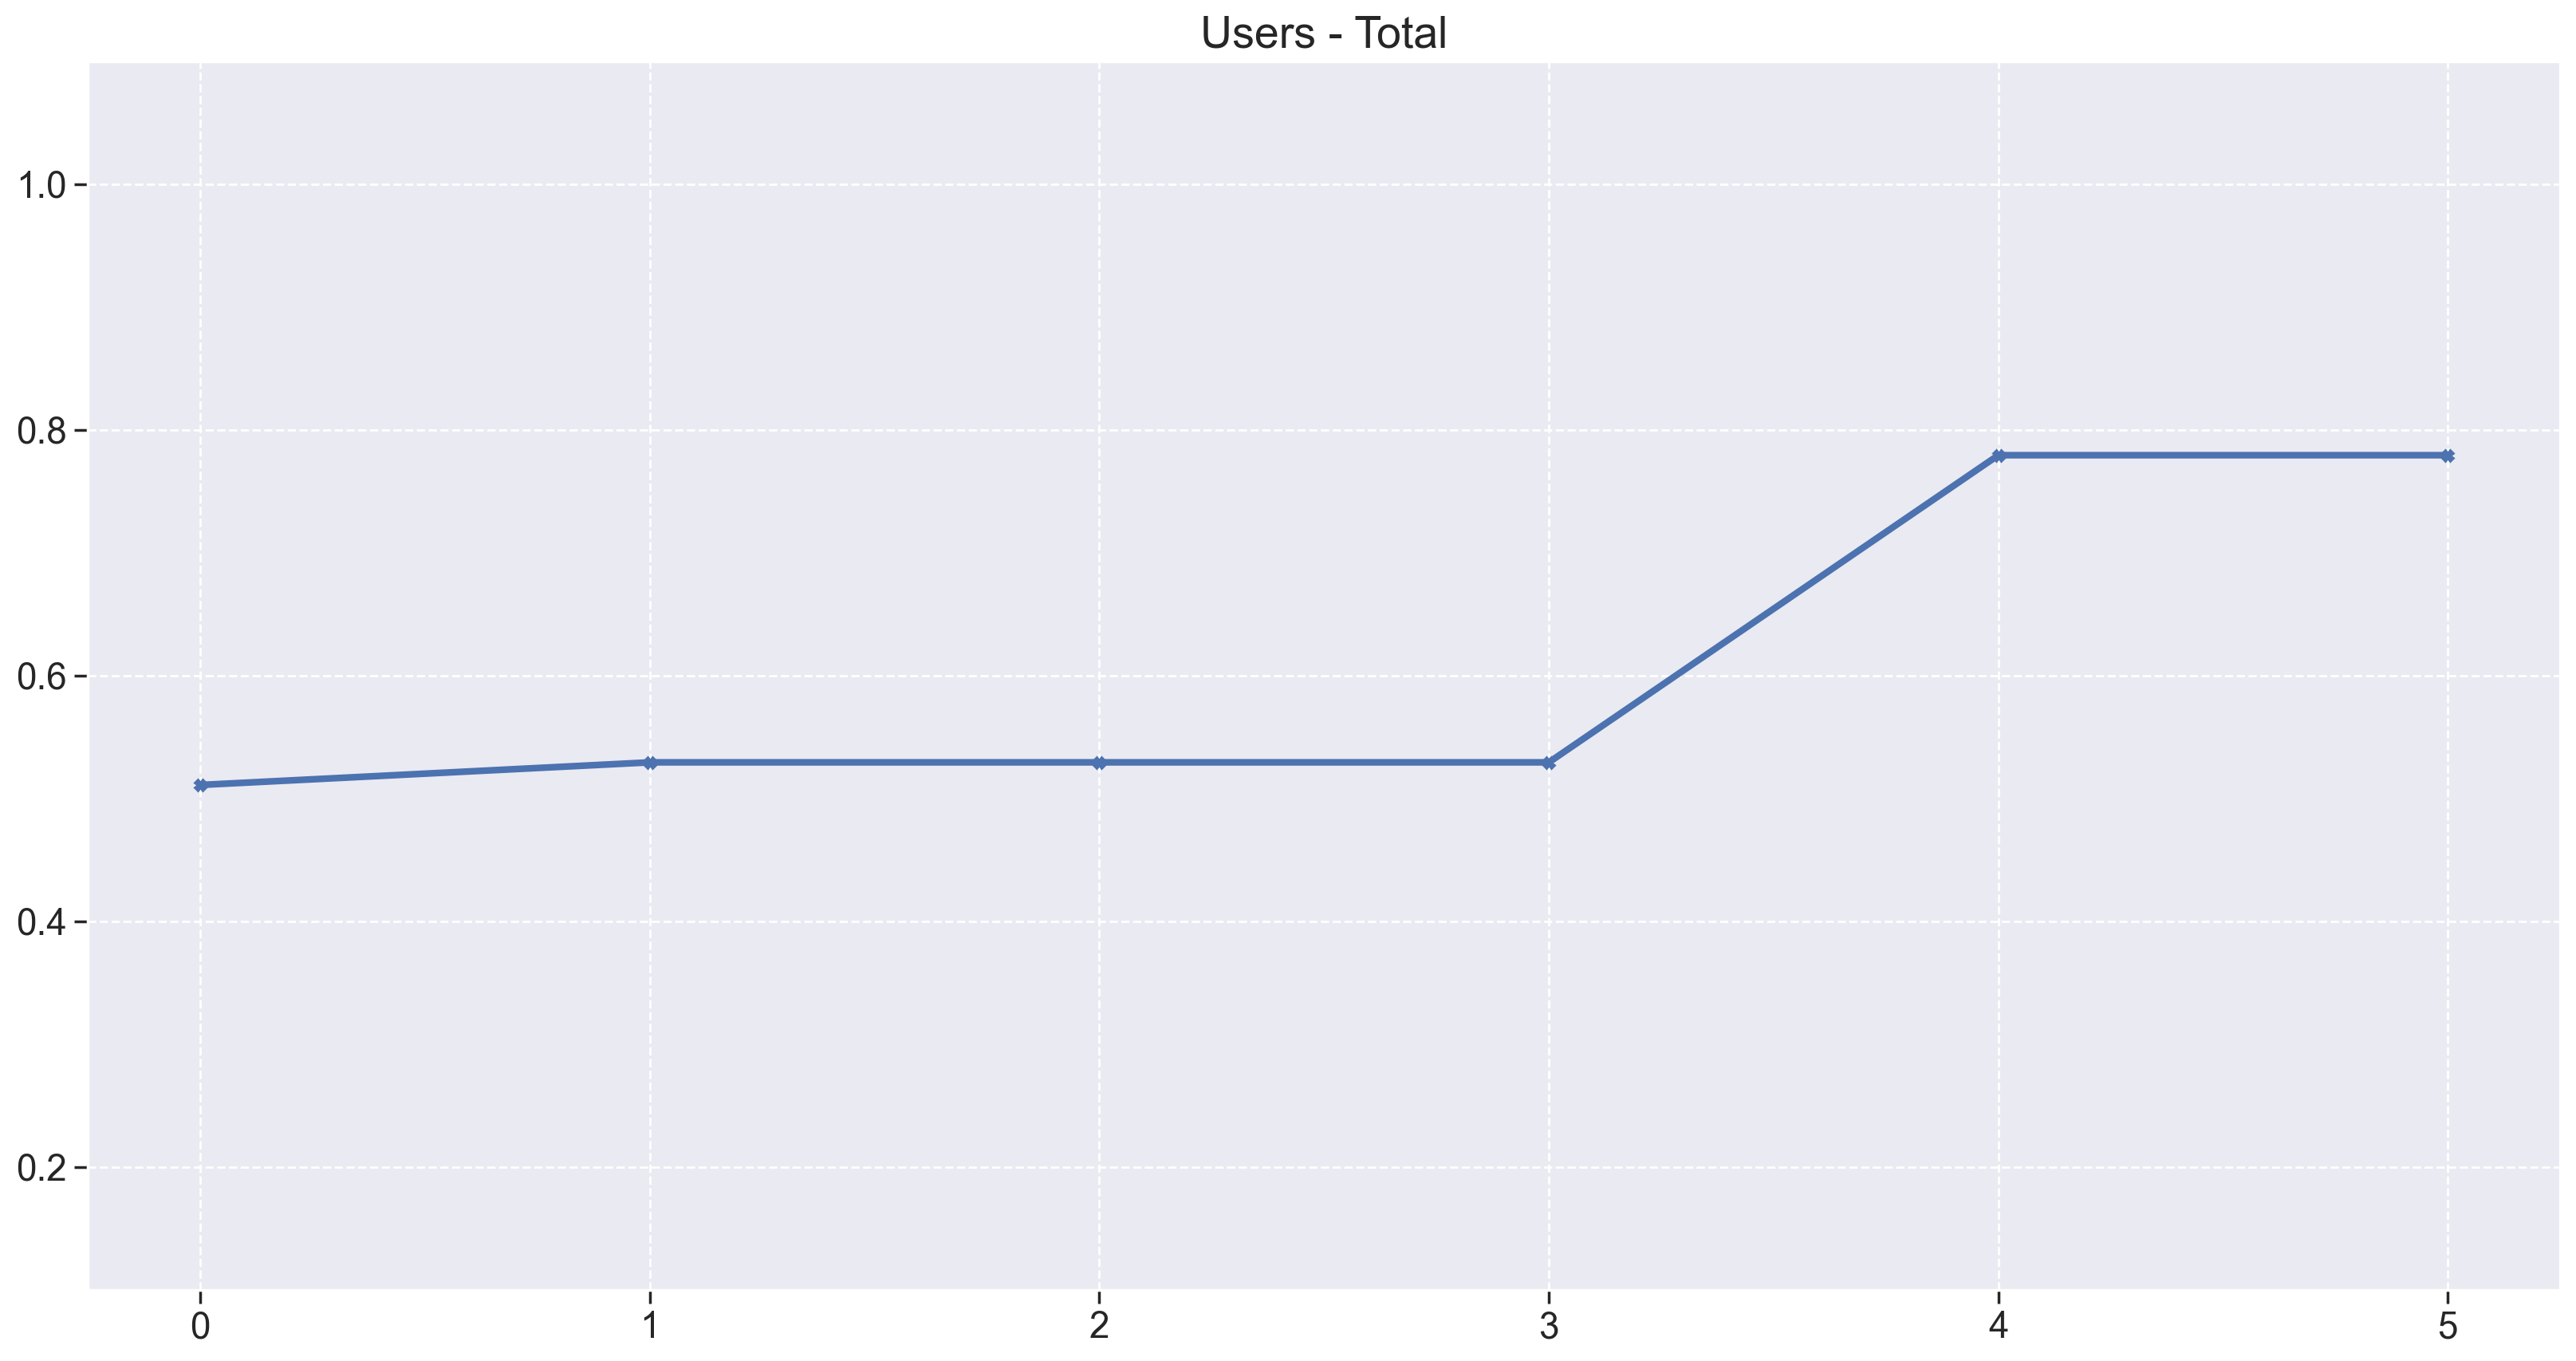

VideoService
Maintainability Stats
   mean     mode   median      std      var      min      max
0.25719 0.256667 0.256667 0.001171 0.000001 0.256667 0.259286
Reliability Stats
 mean  mode  median      std    var  min  max
  0.3  0.25    0.25 0.111803 0.0125 0.25  0.5


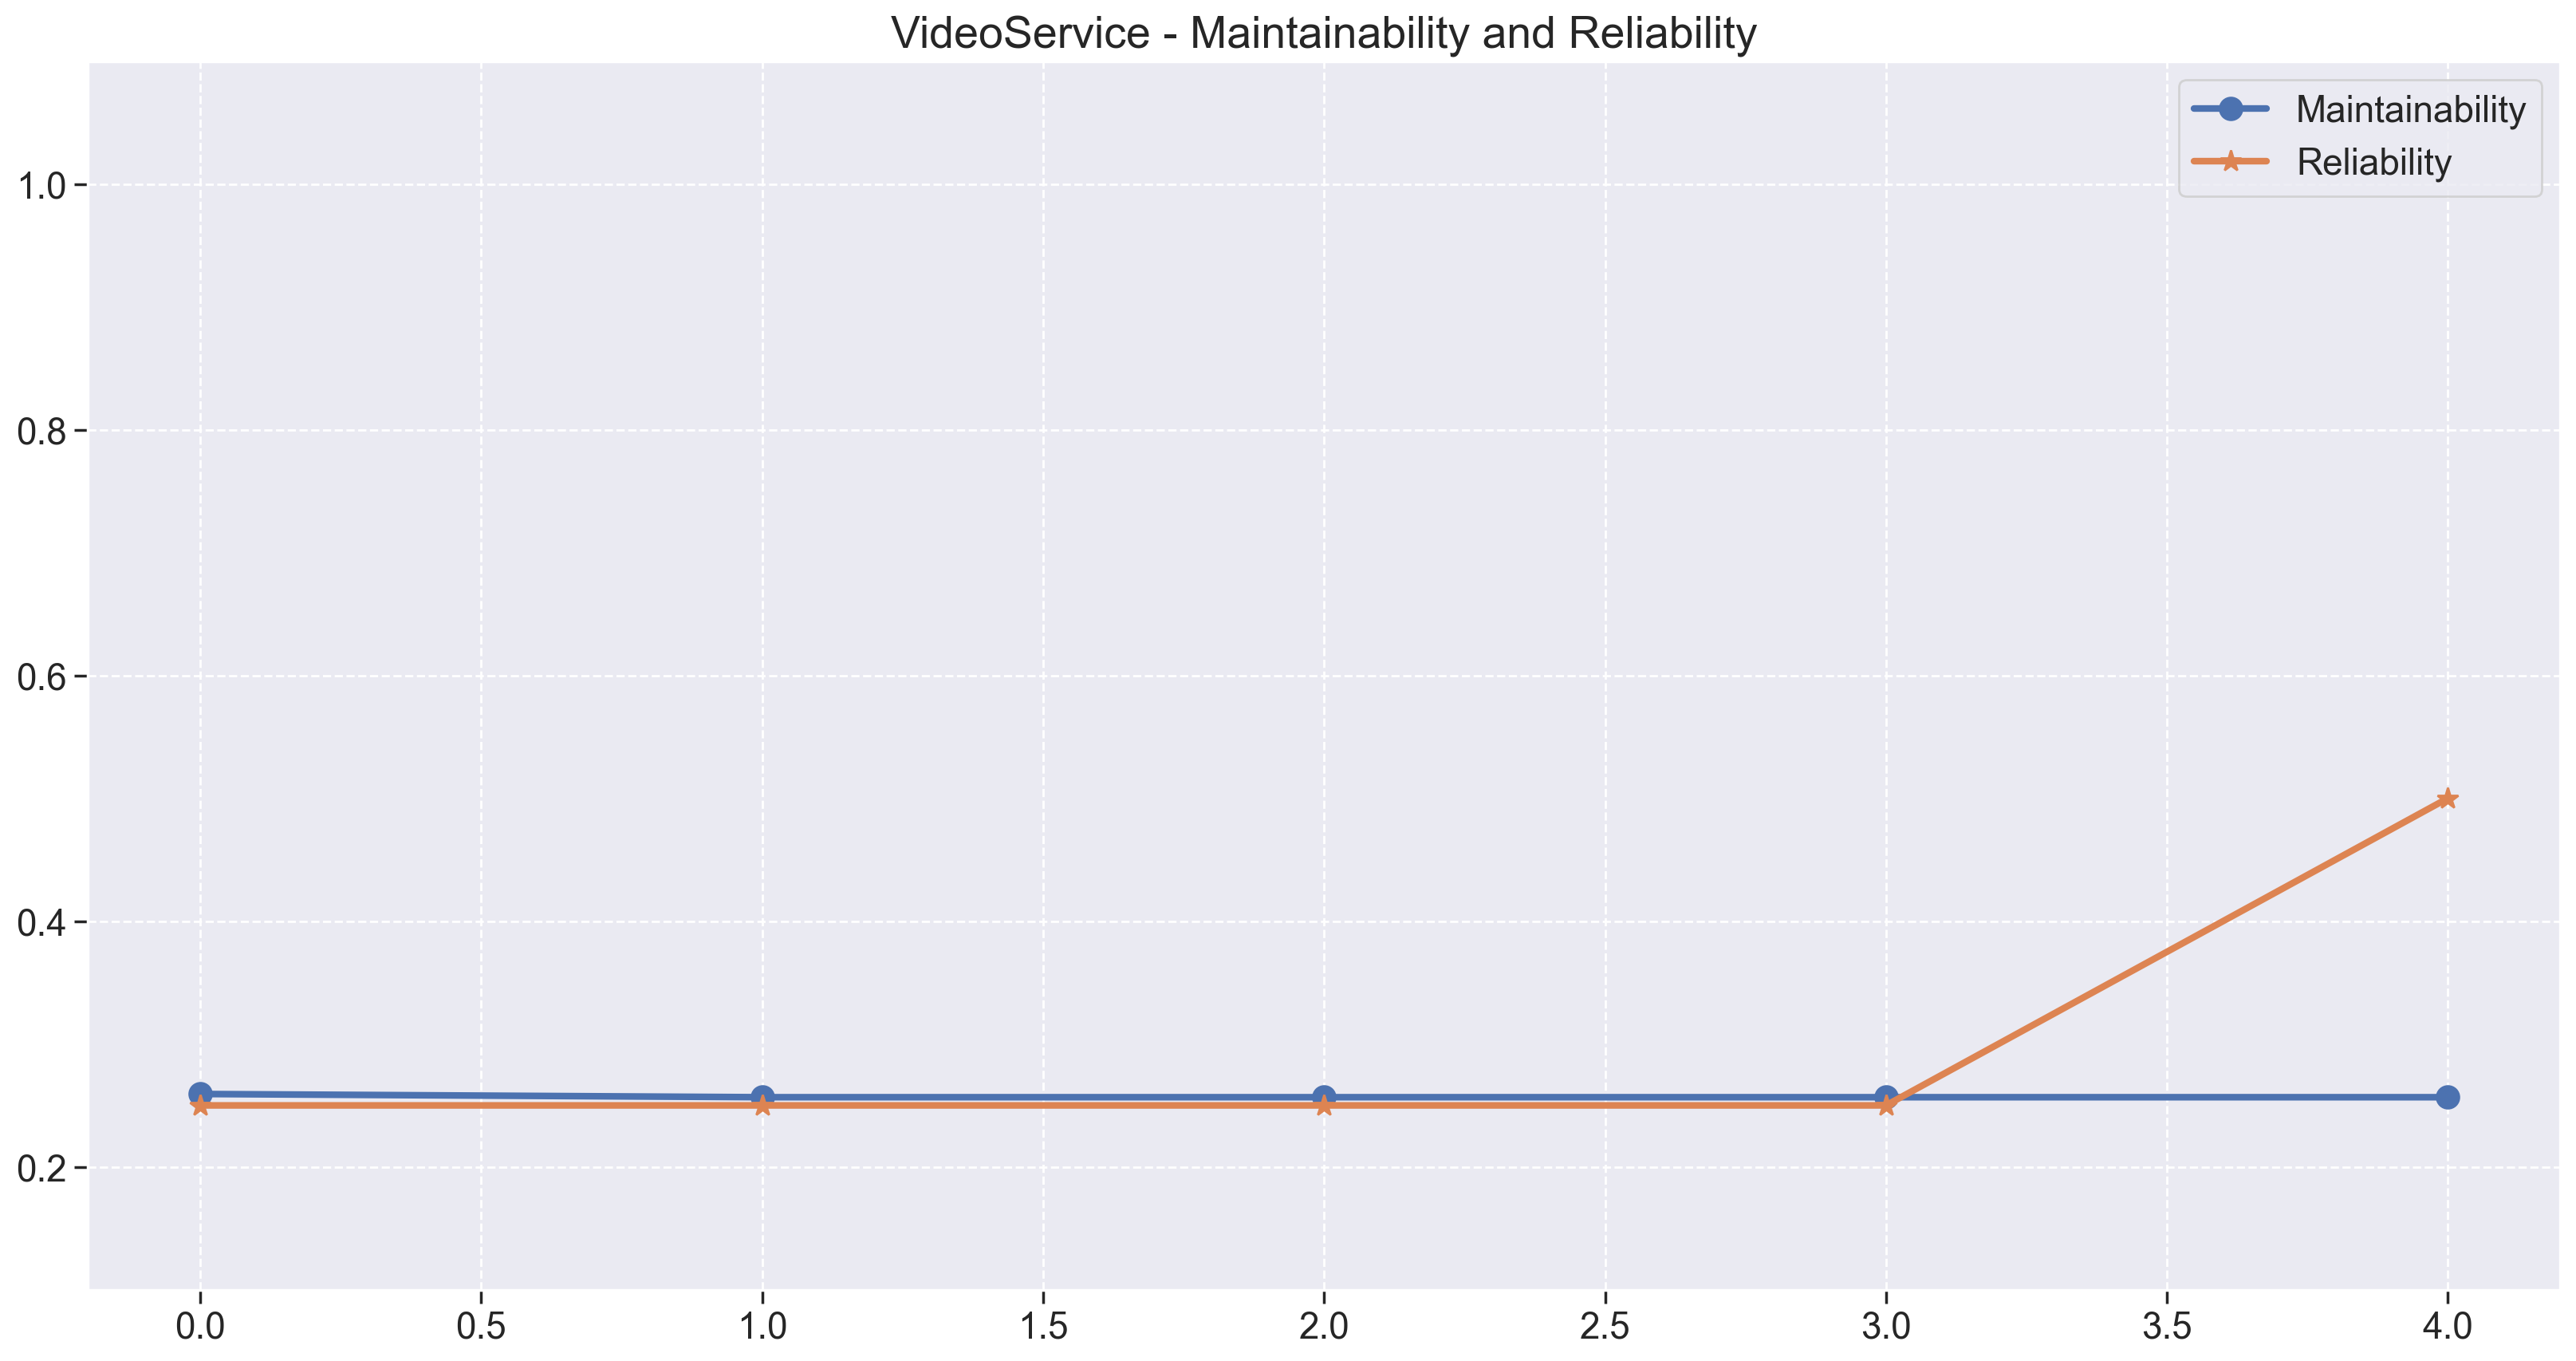

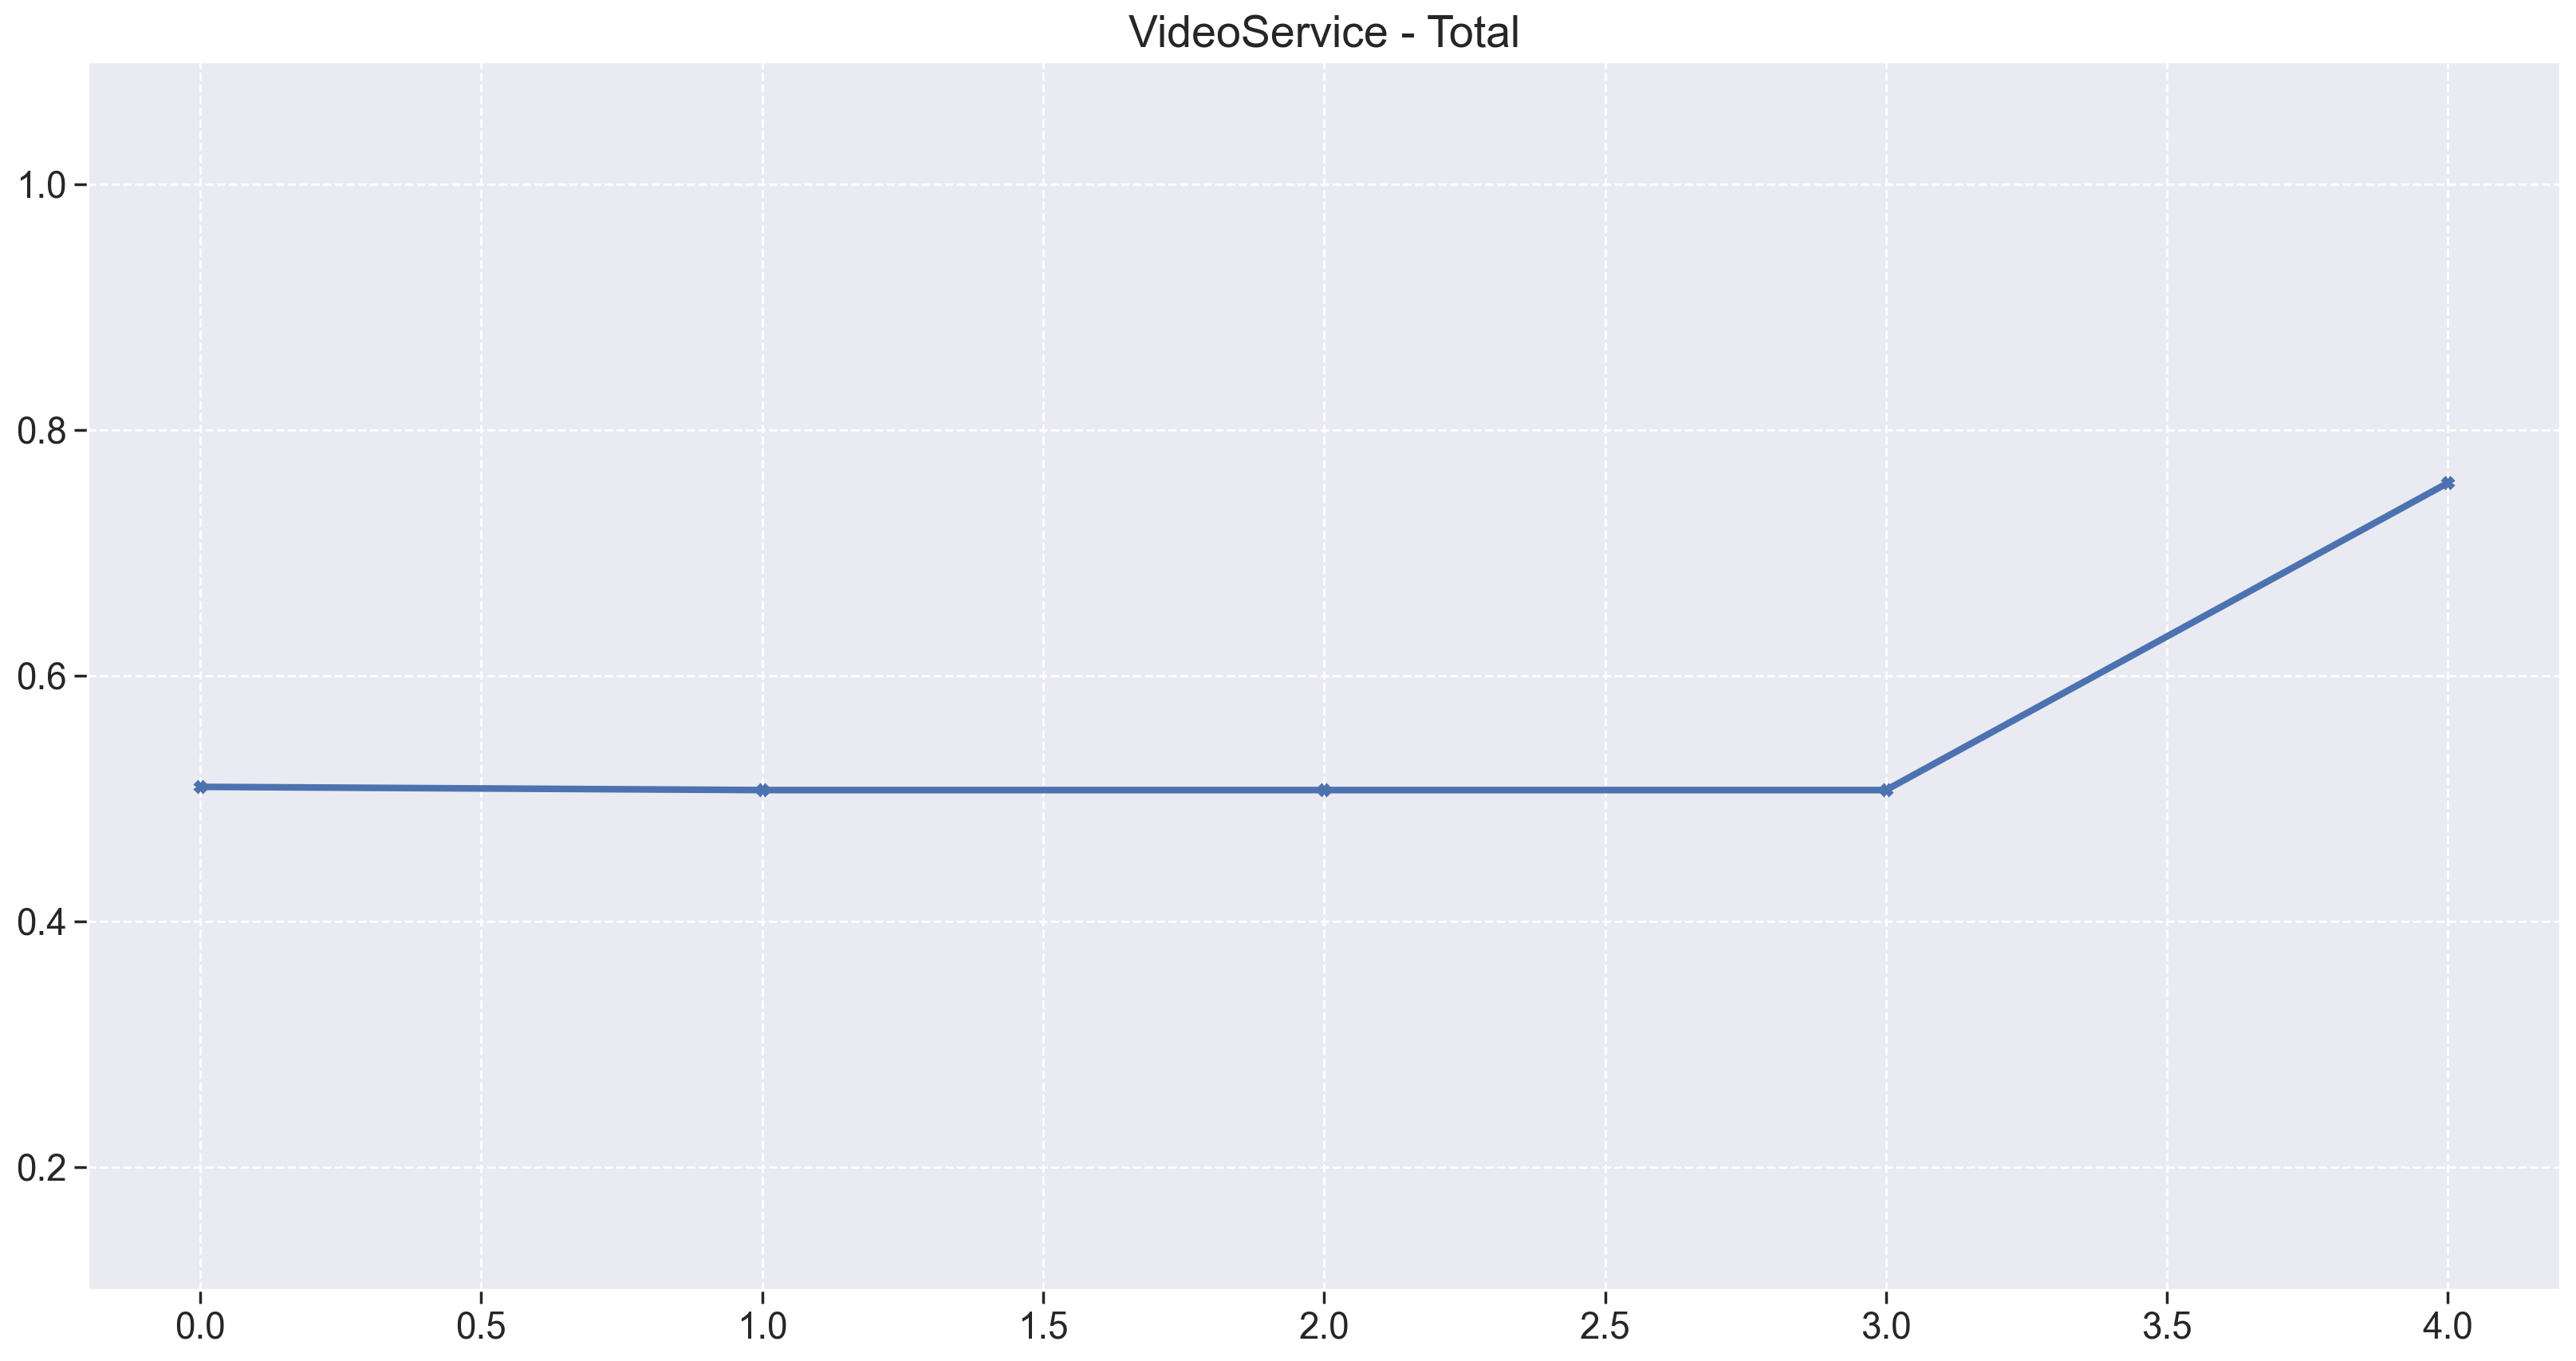

Admin
Maintainability Stats
 mean  mode  median  std  var   min   max
0.275 0.275   0.275  0.0  0.0 0.275 0.275
Reliability Stats
    mean  mode  median      std      var  min  max
0.333333  0.25    0.25 0.144338 0.020833 0.25  0.5


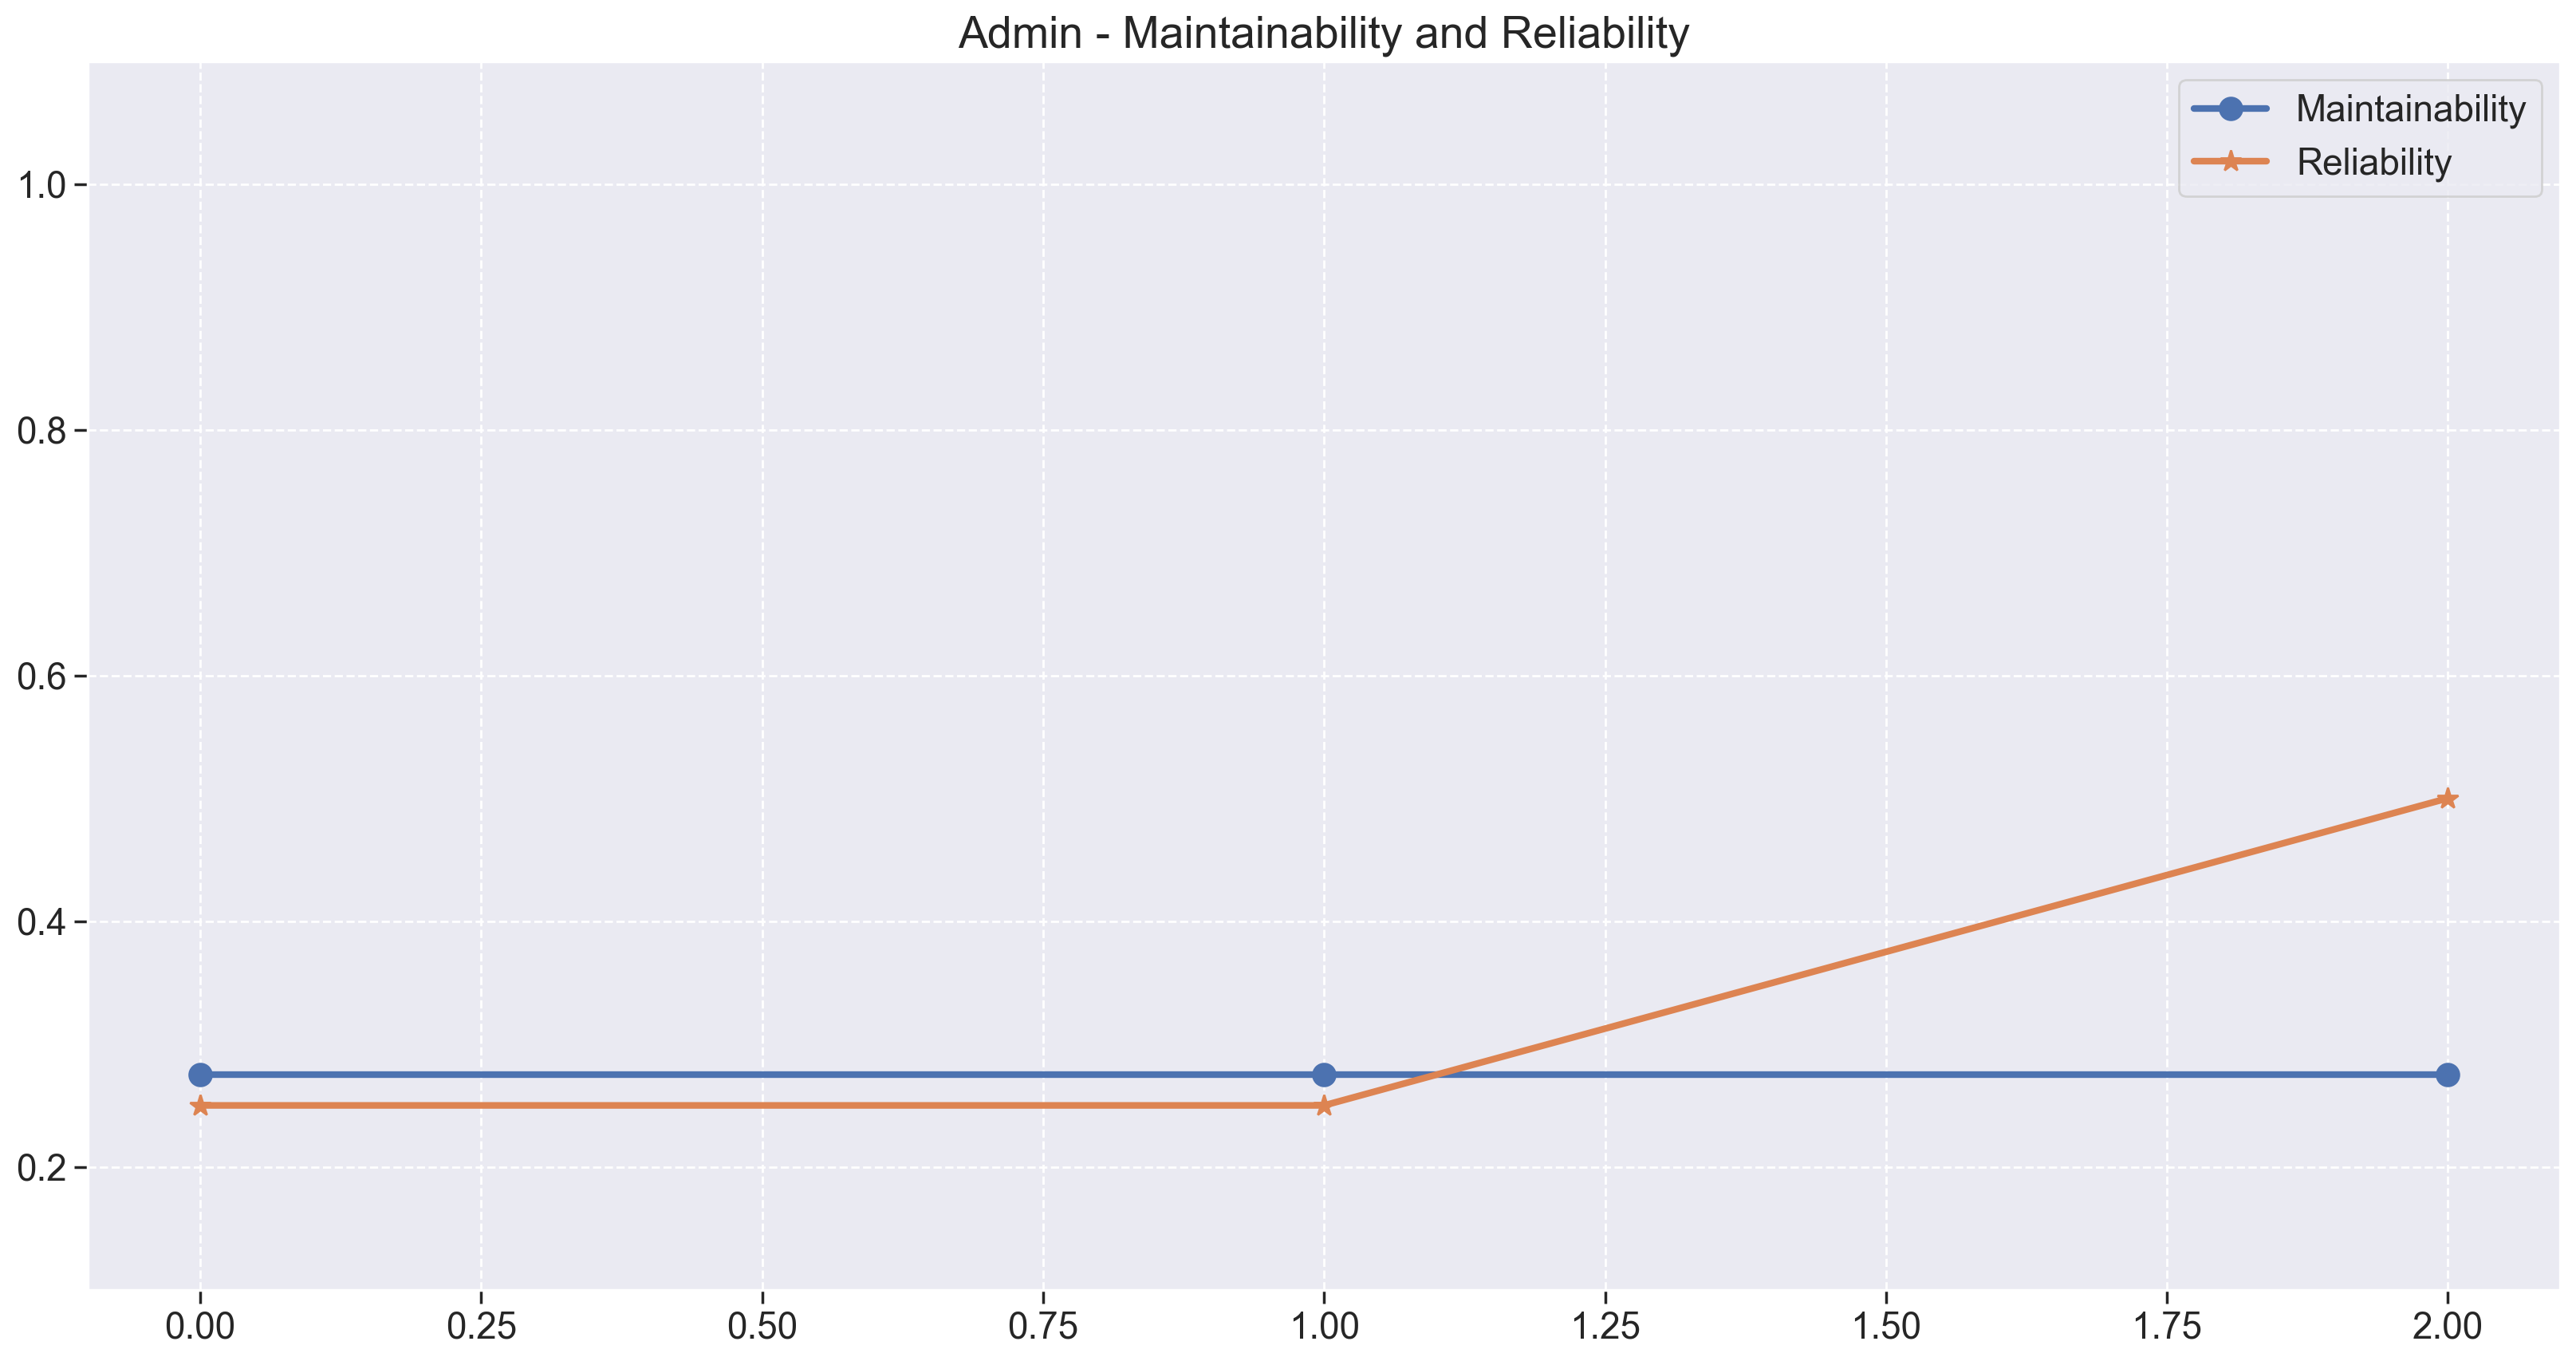

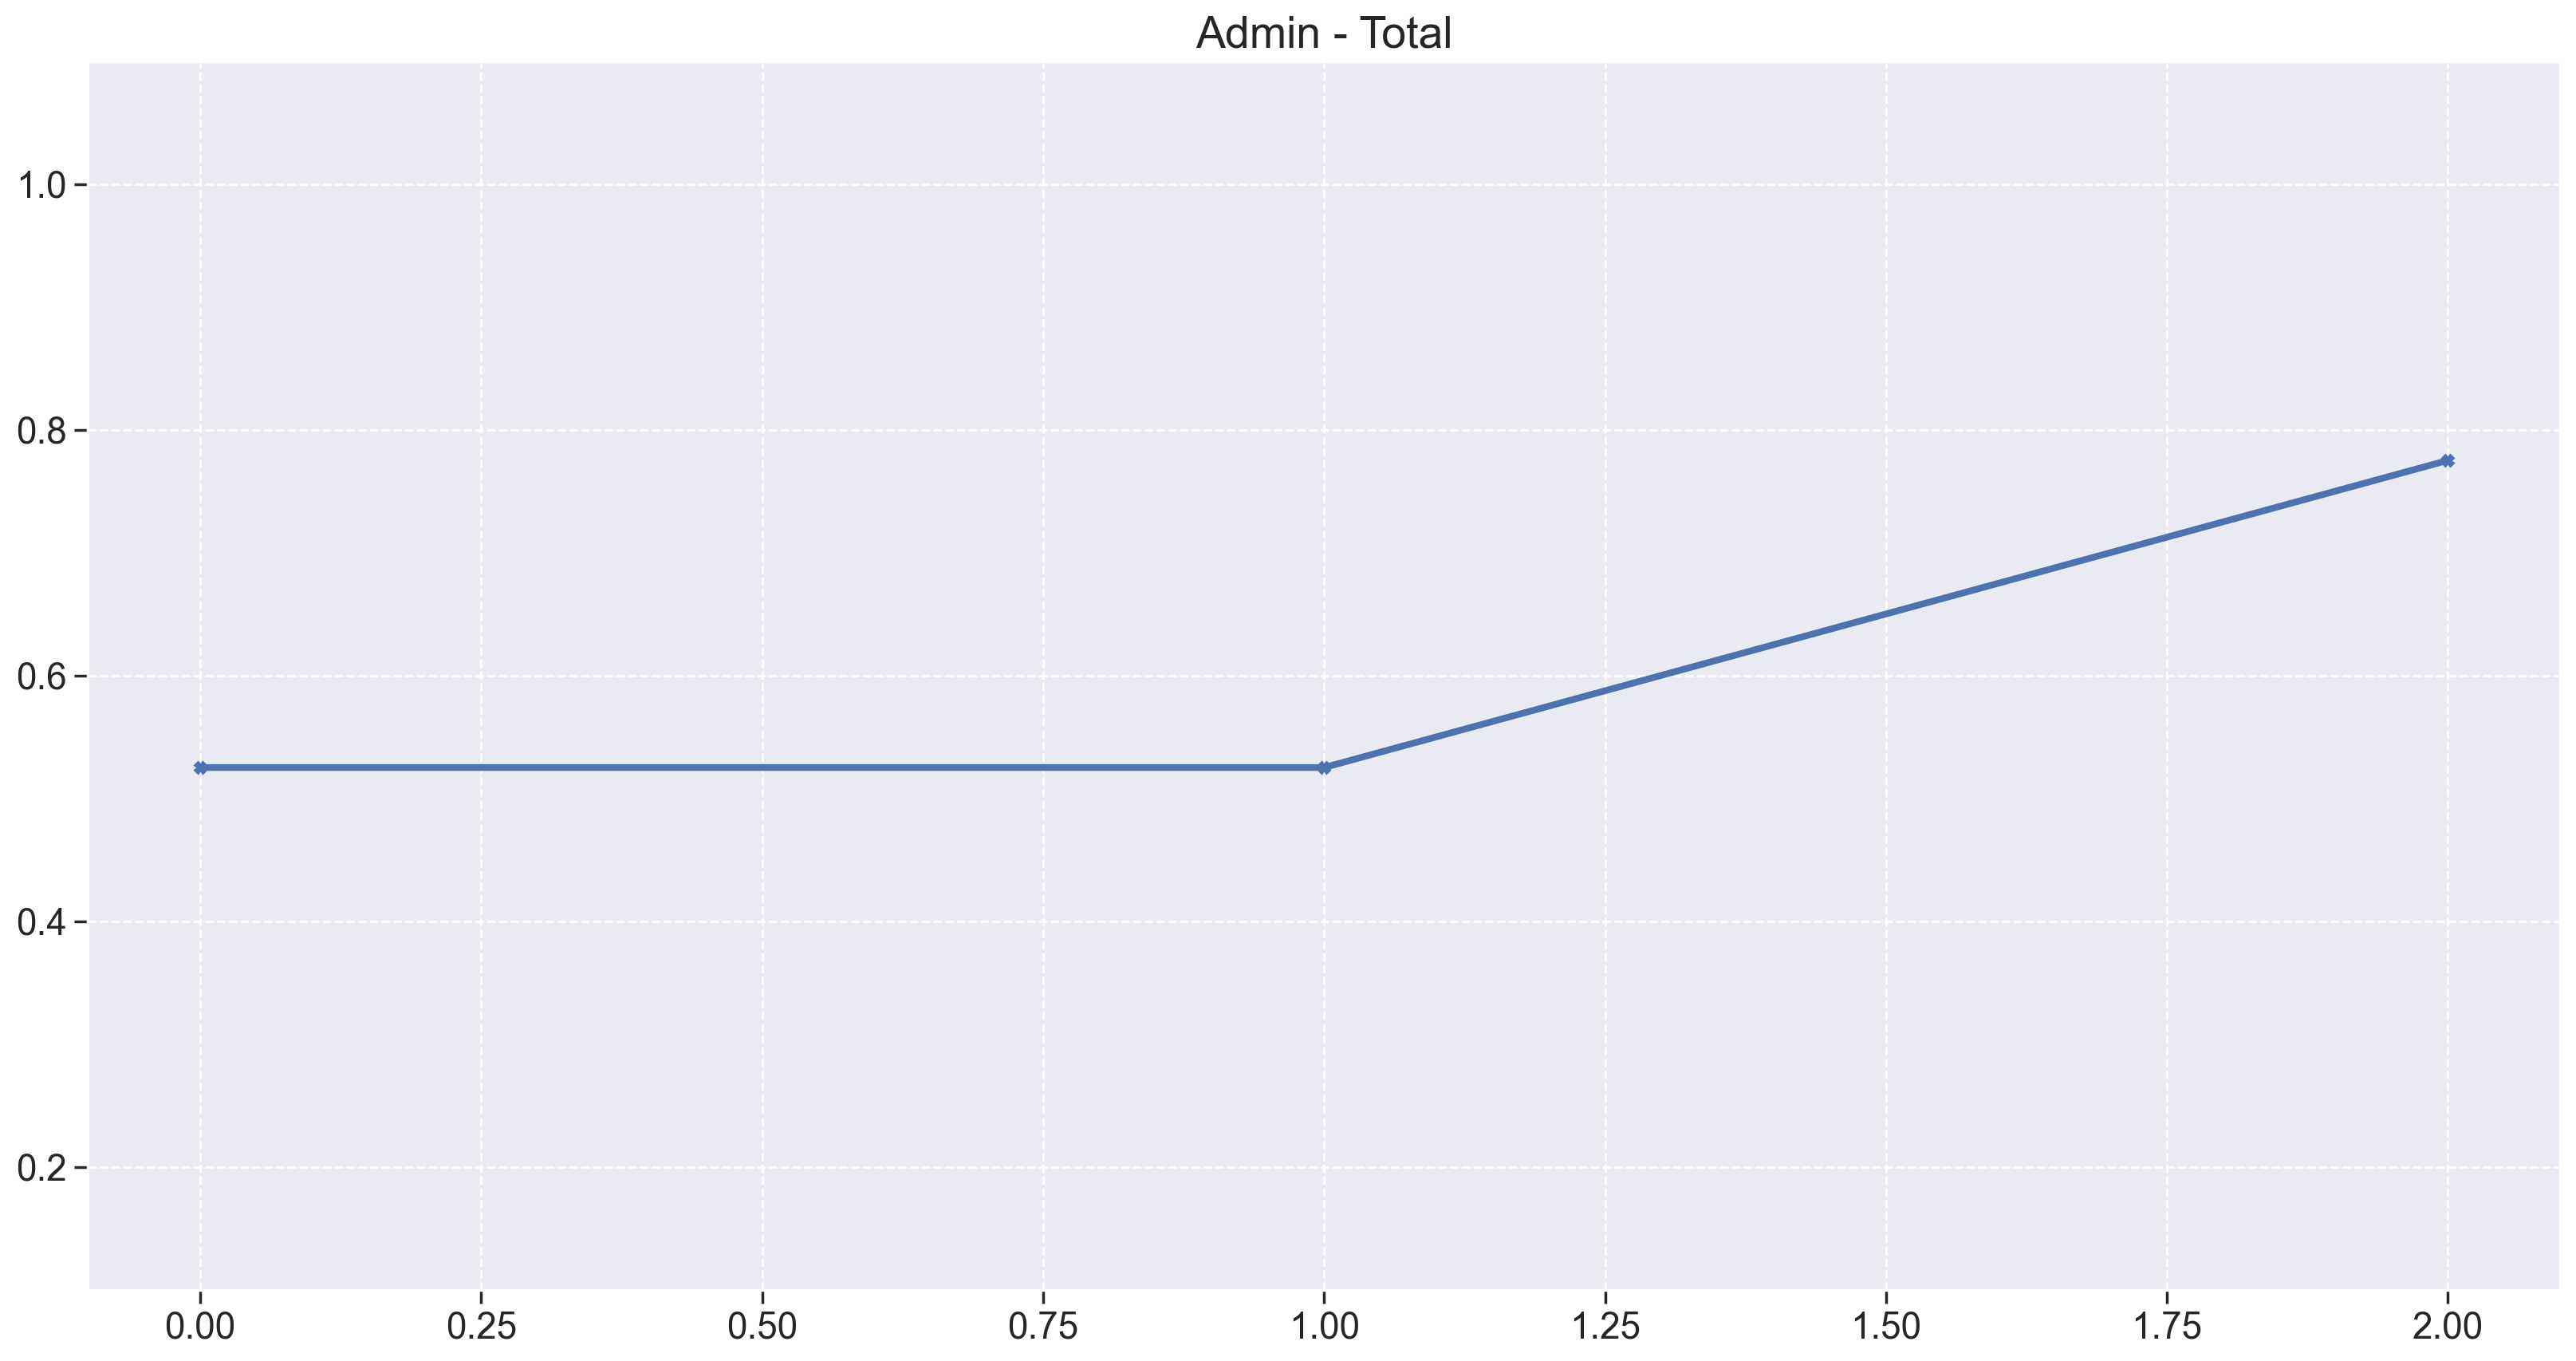

In [31]:
for name, data in metrics.items():
    print(name)
    analysis(data, name)

### Quality characteristic indicator

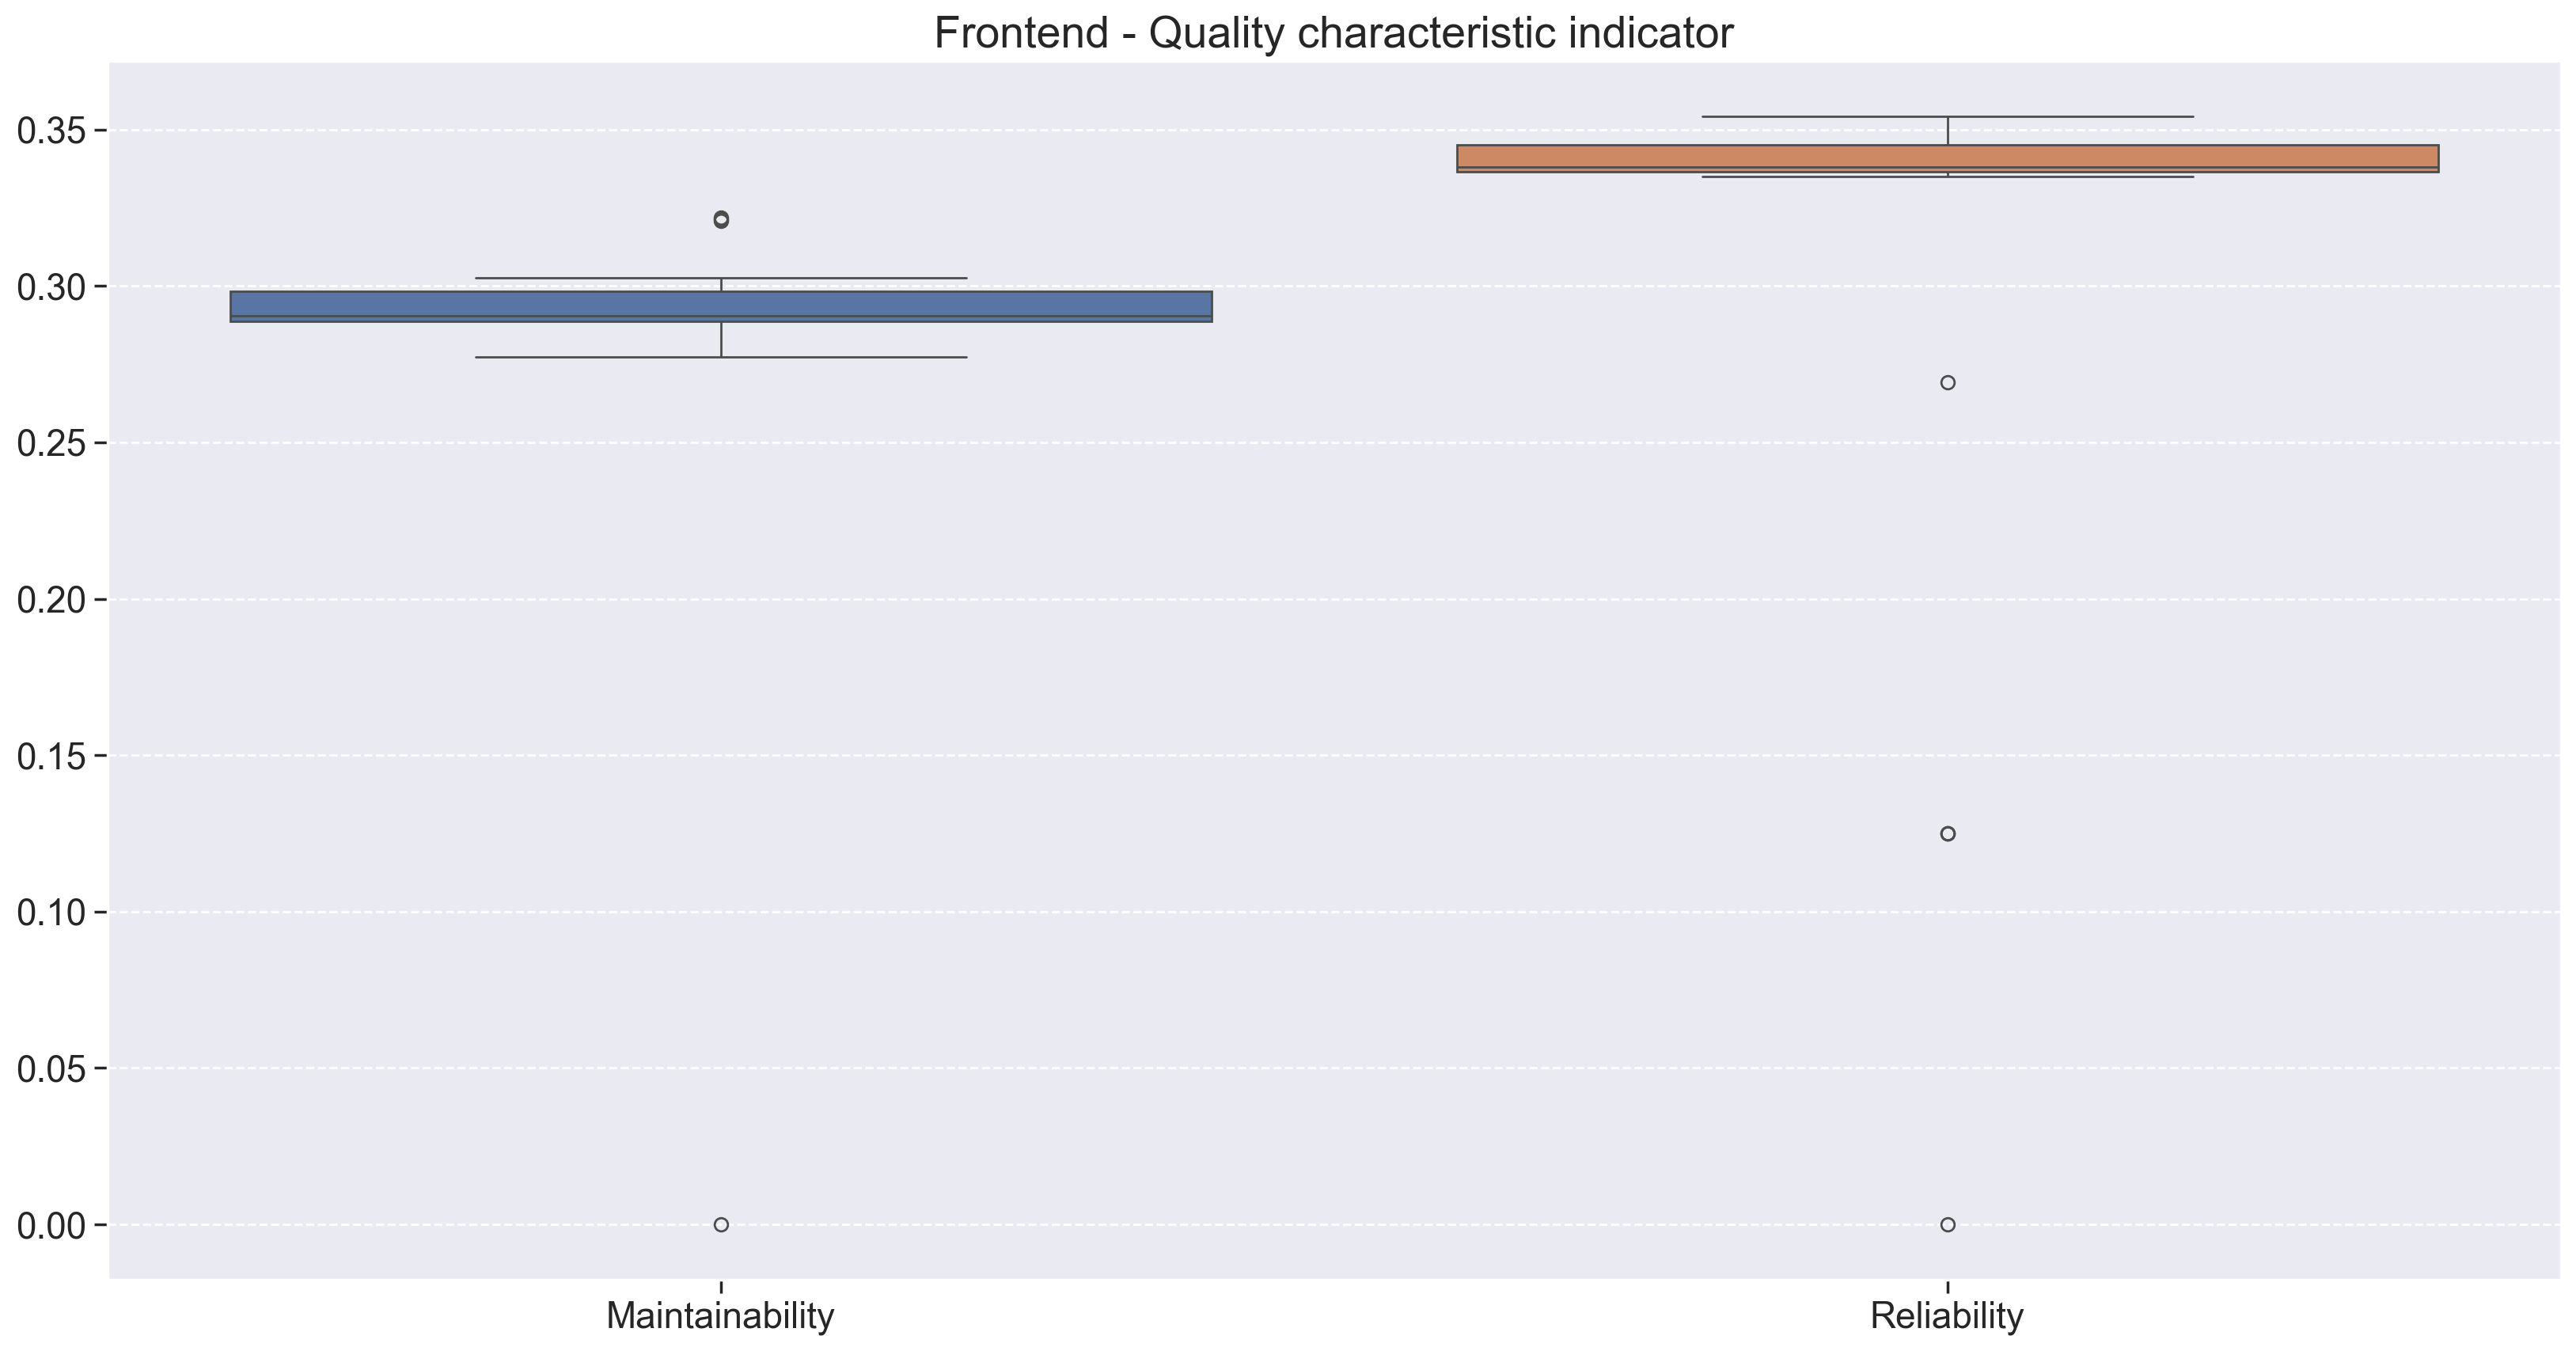

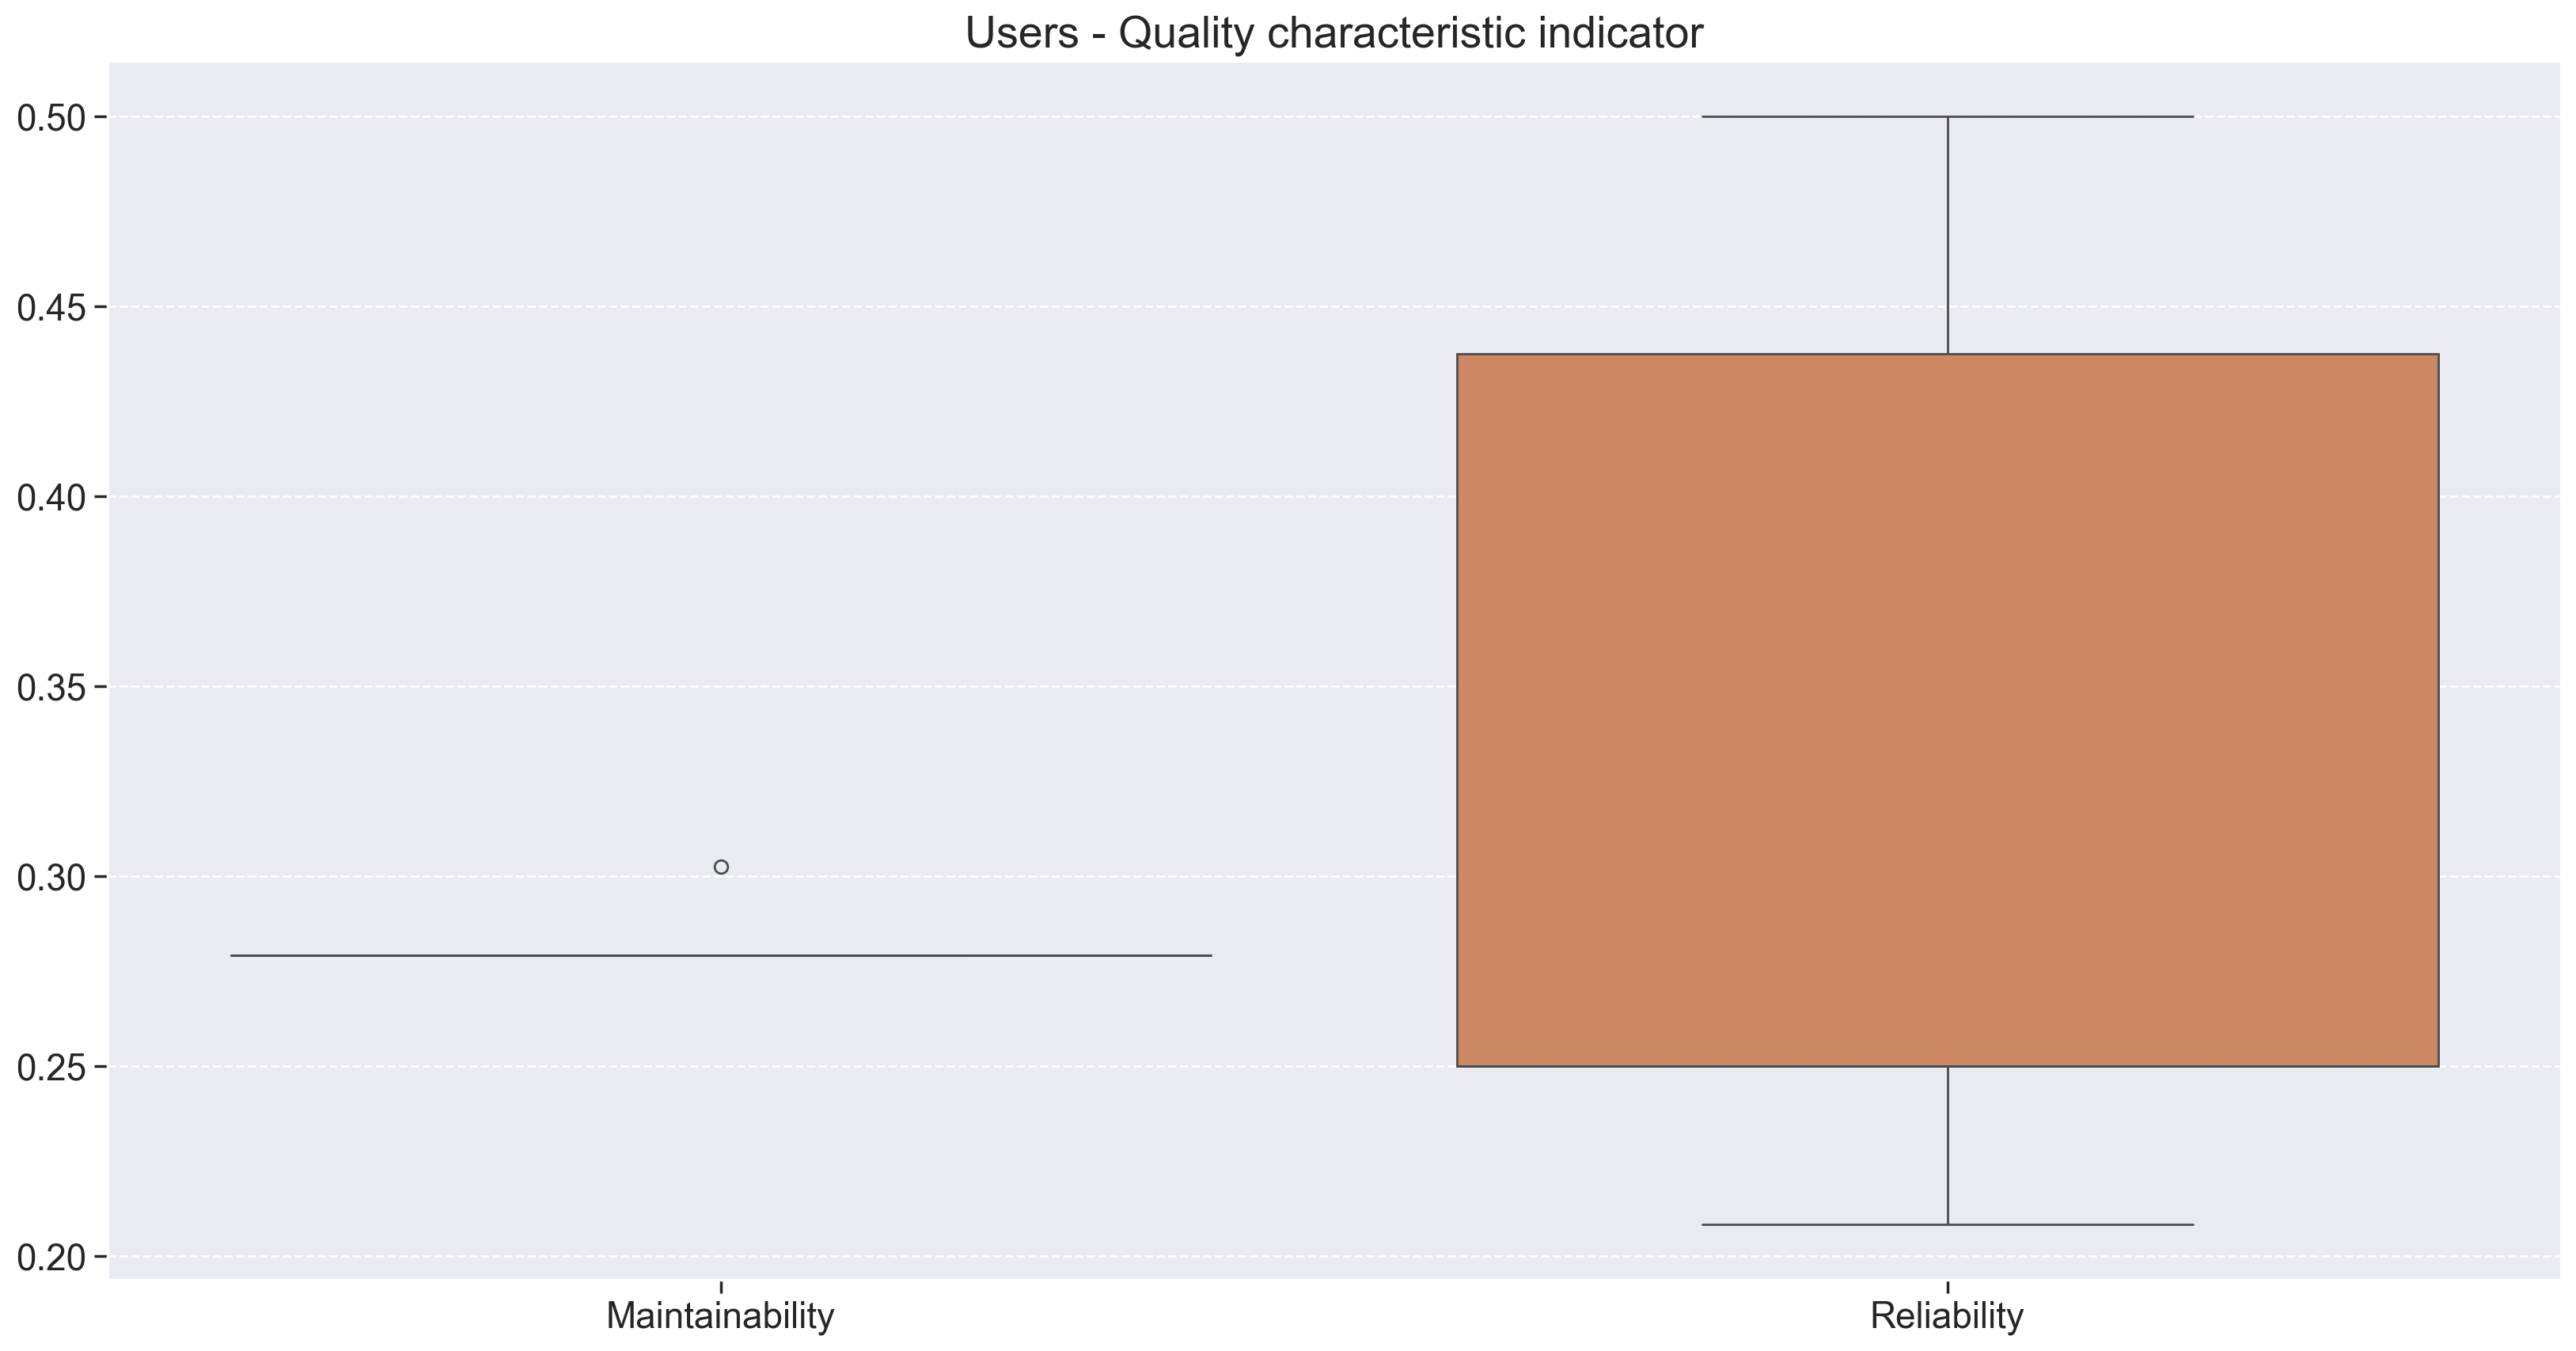

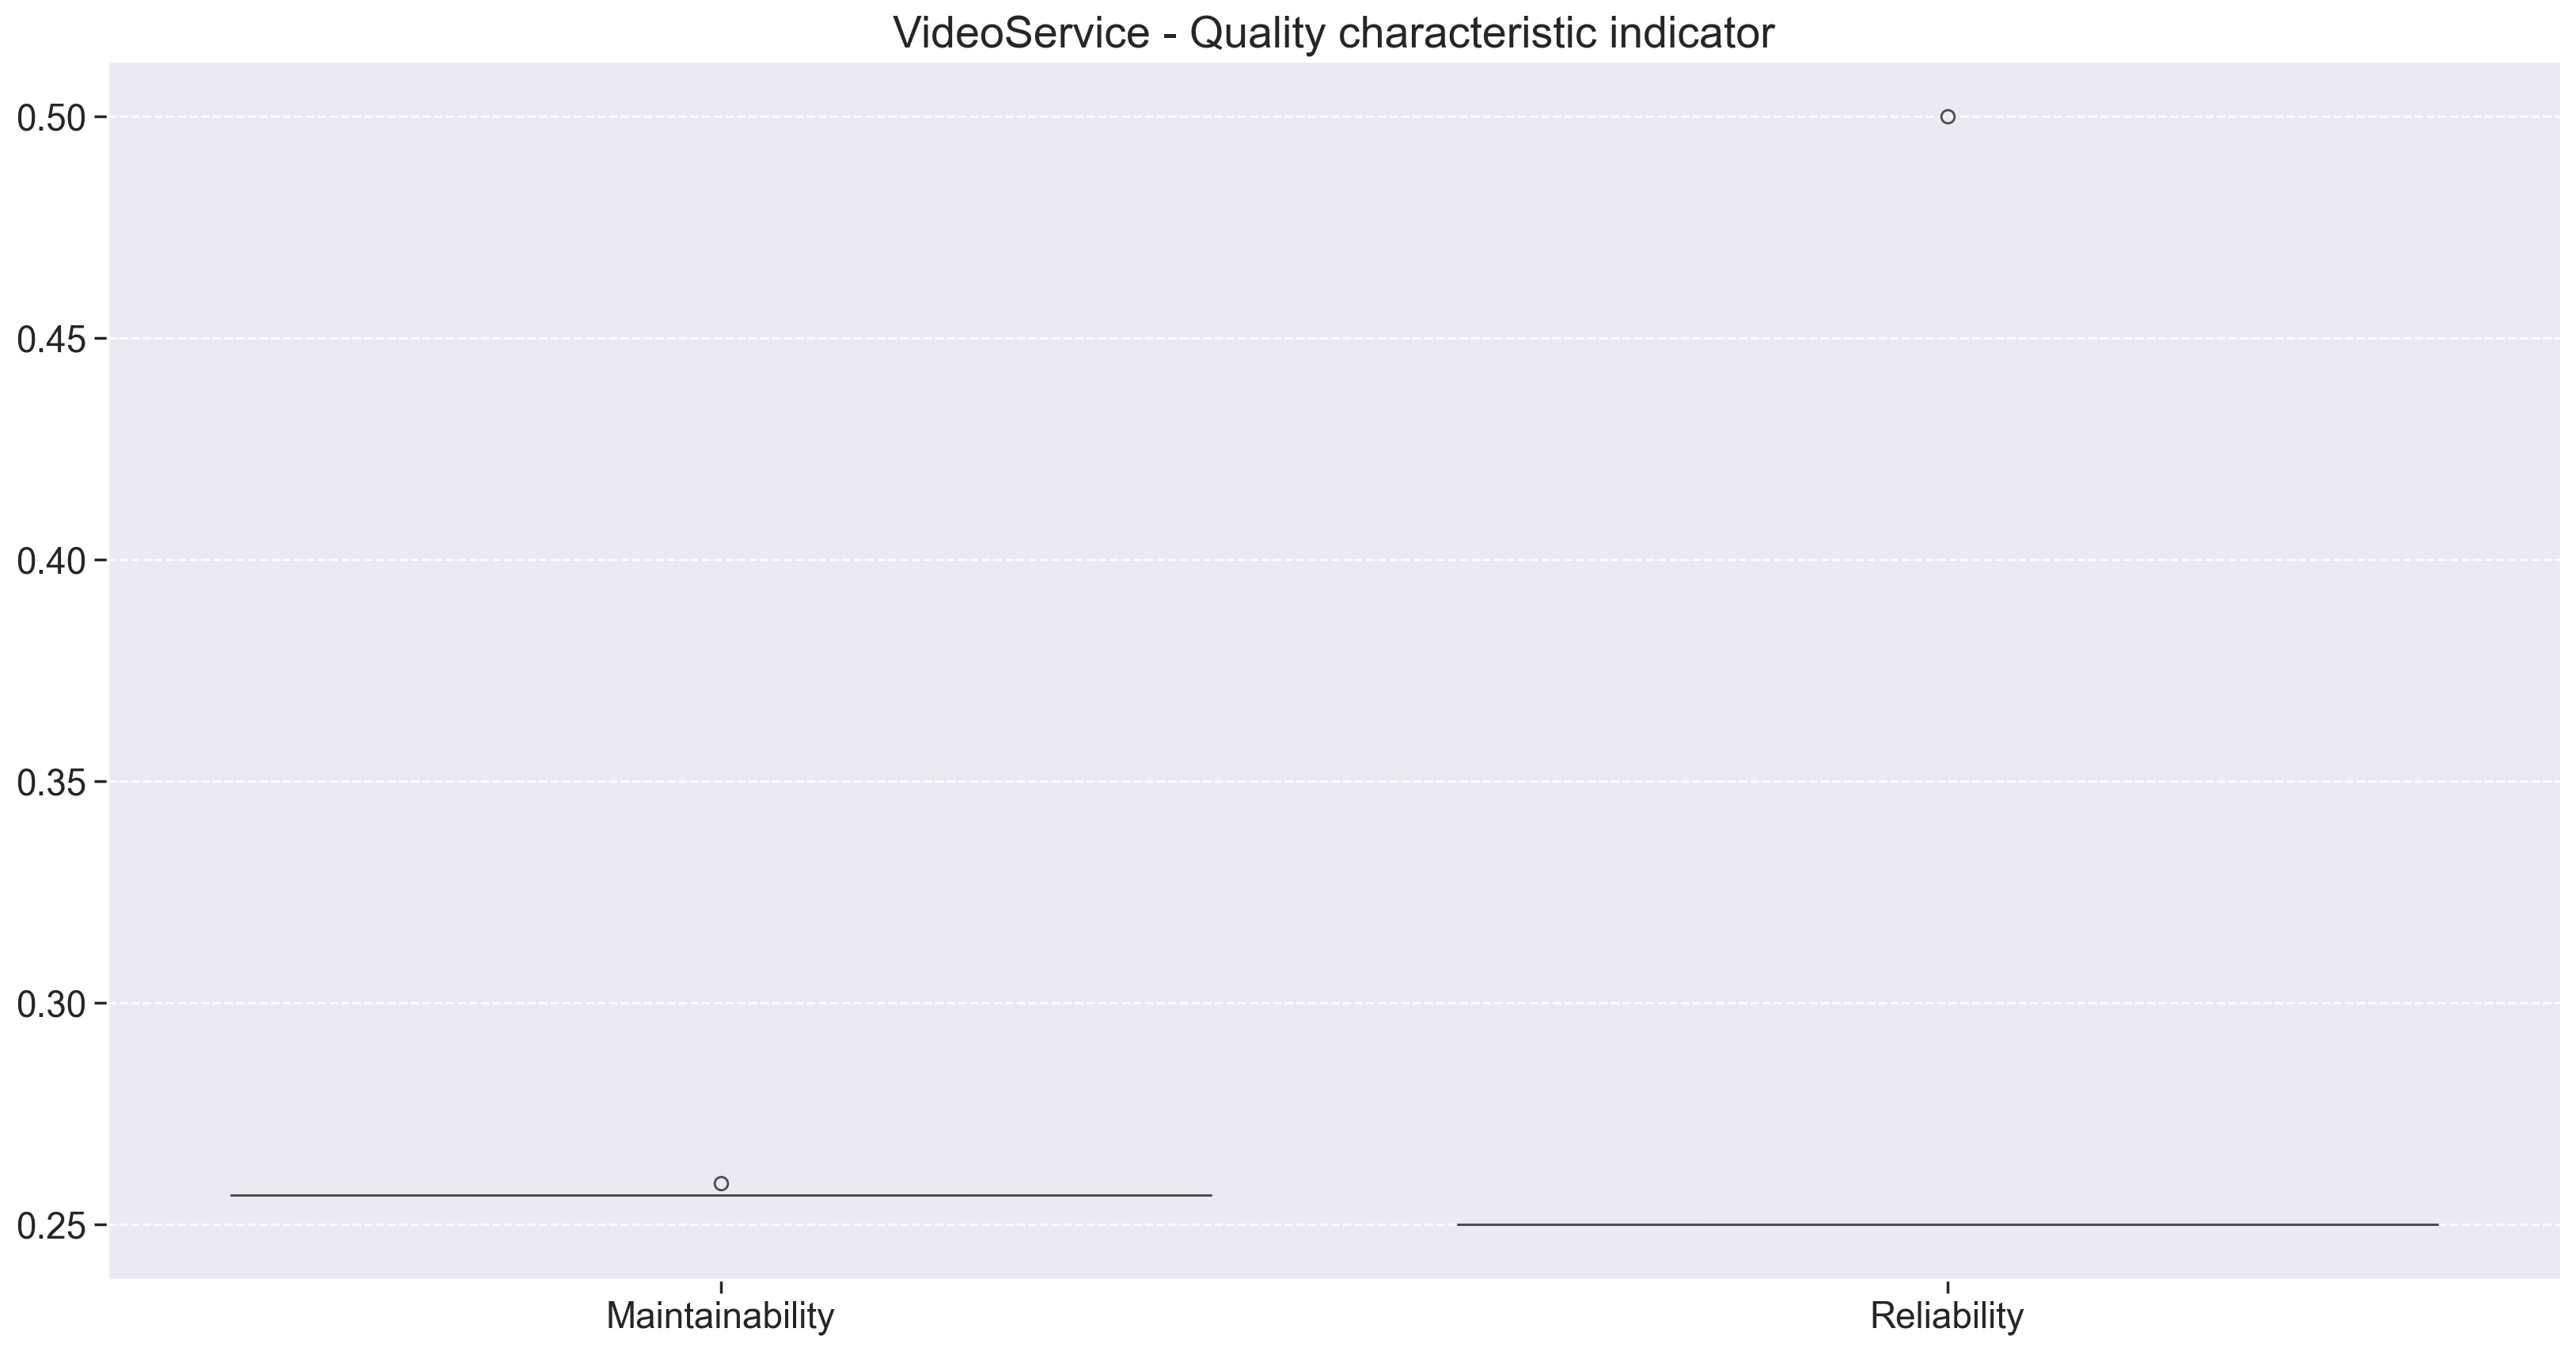

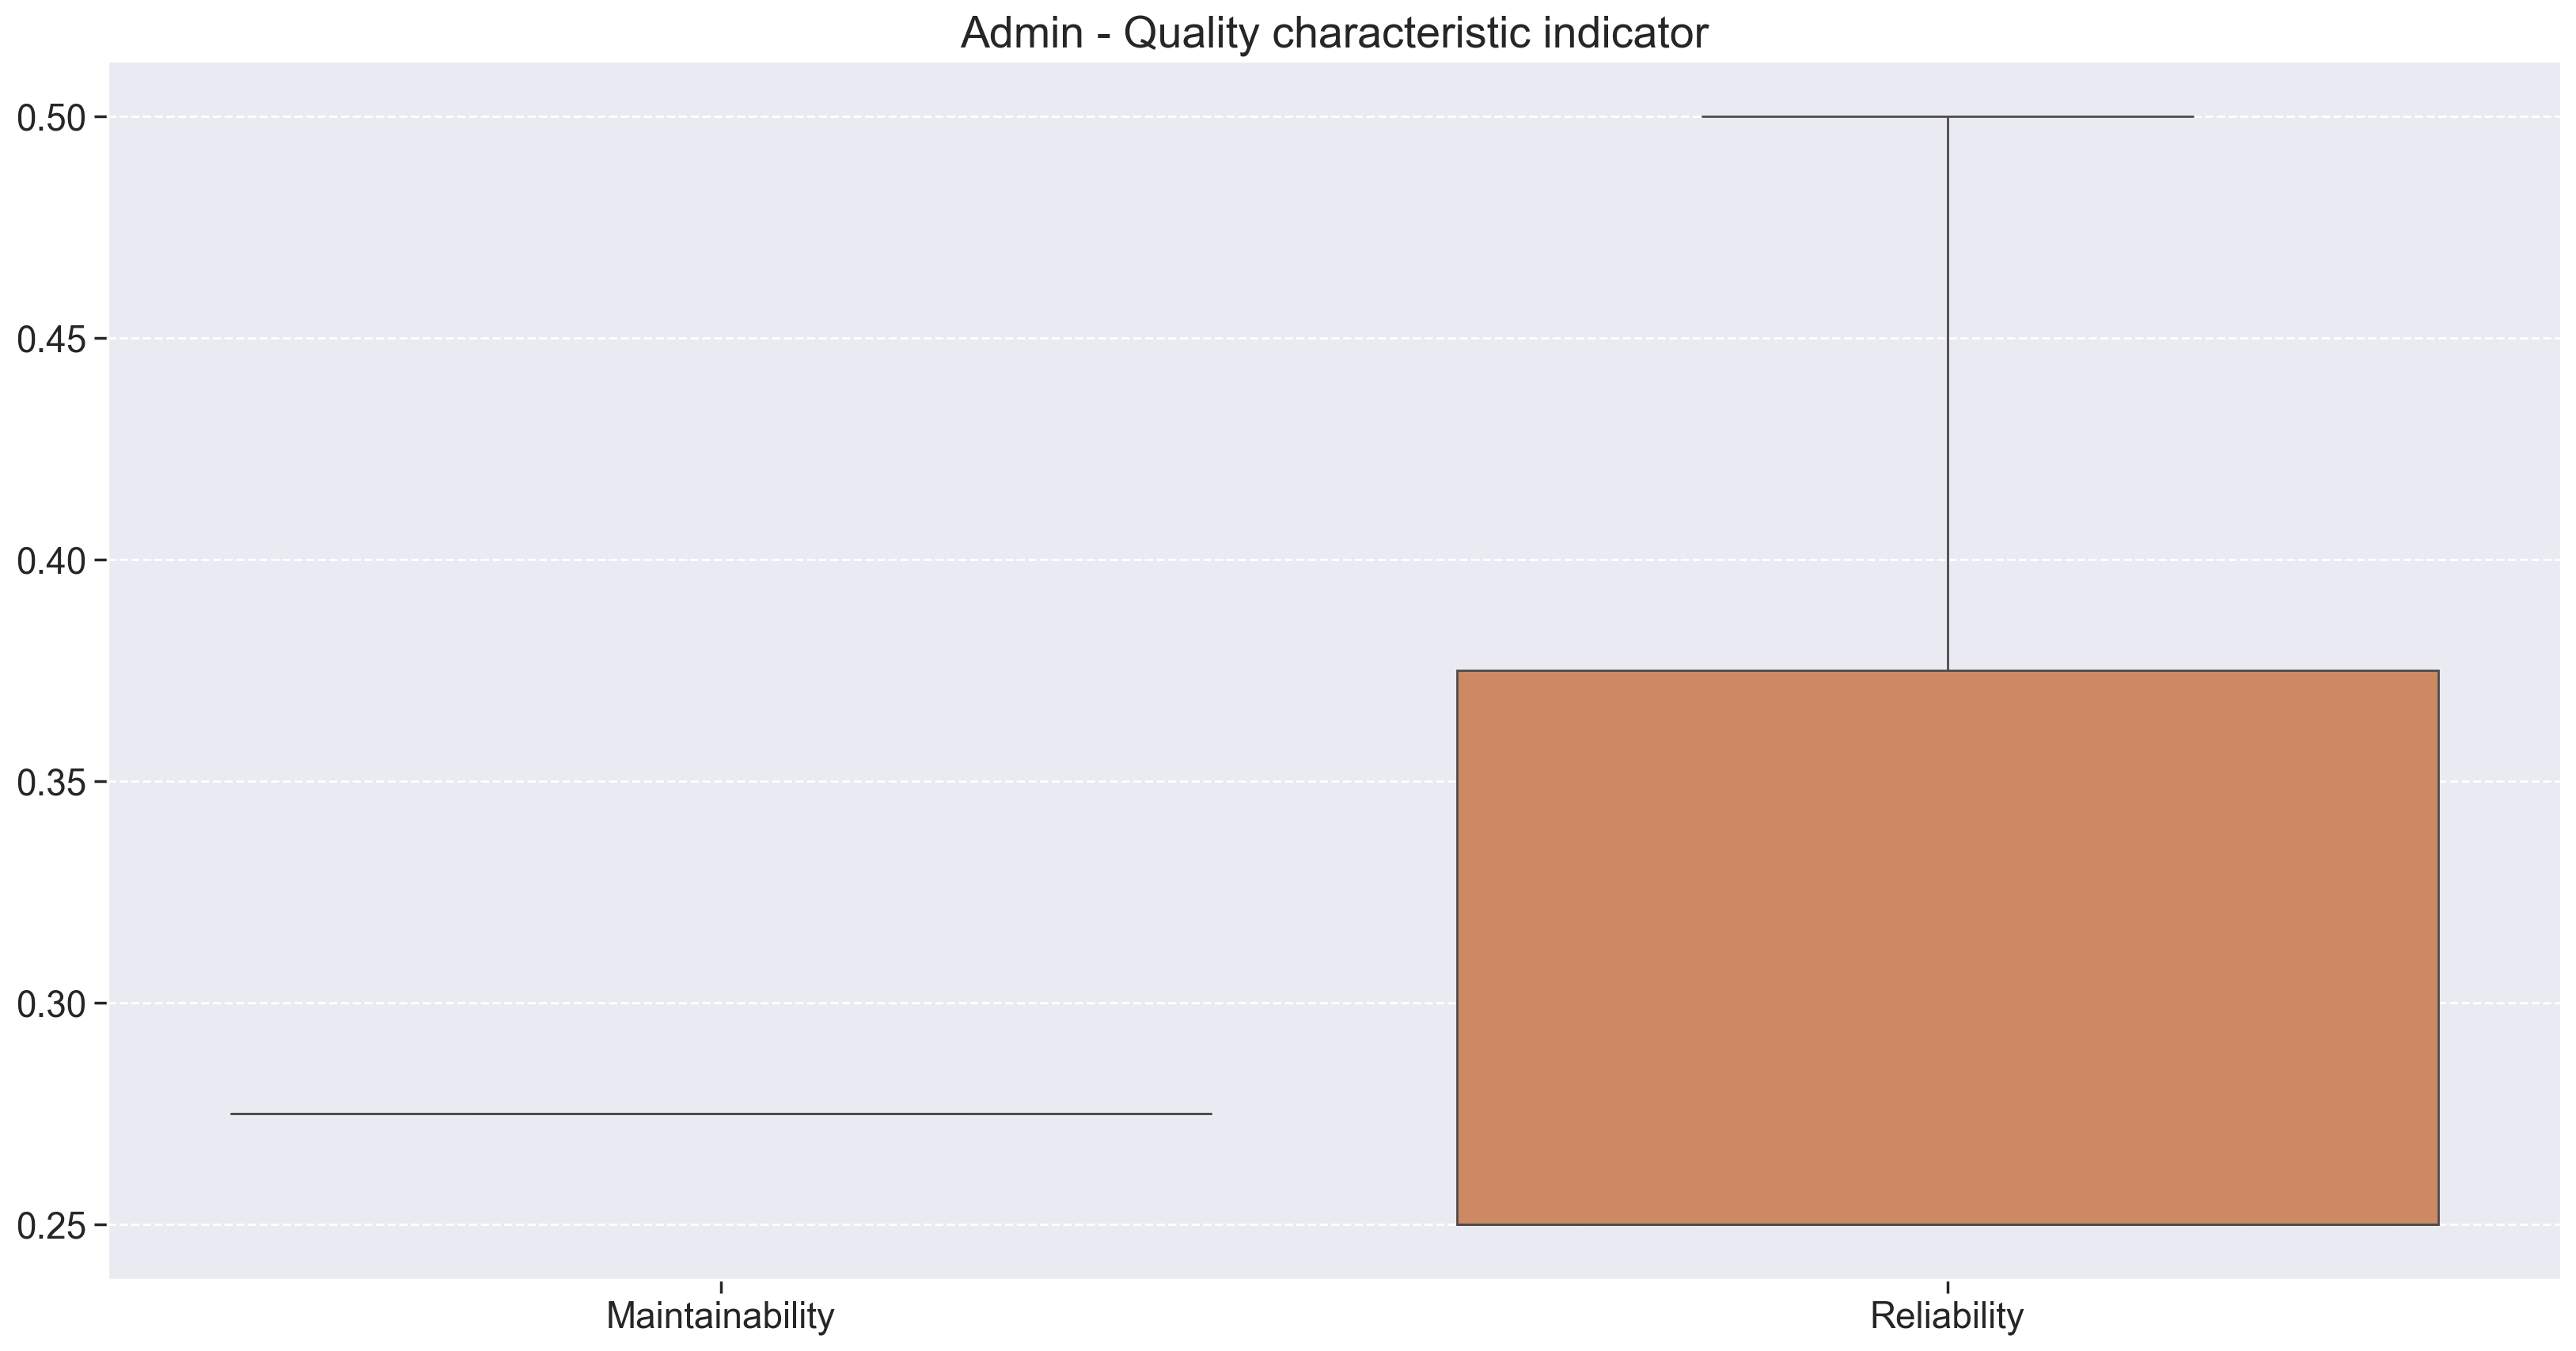

In [32]:

for name, data in metrics.items():
    fig = plt.figure(figsize=(20, 10))
    sns.boxplot(data=data[['Maintainability','Reliability']])

    plt.title(f"{name} - Quality characteristic indicator", fontsize=20)
    plt.show()

### Quality indicator visualization

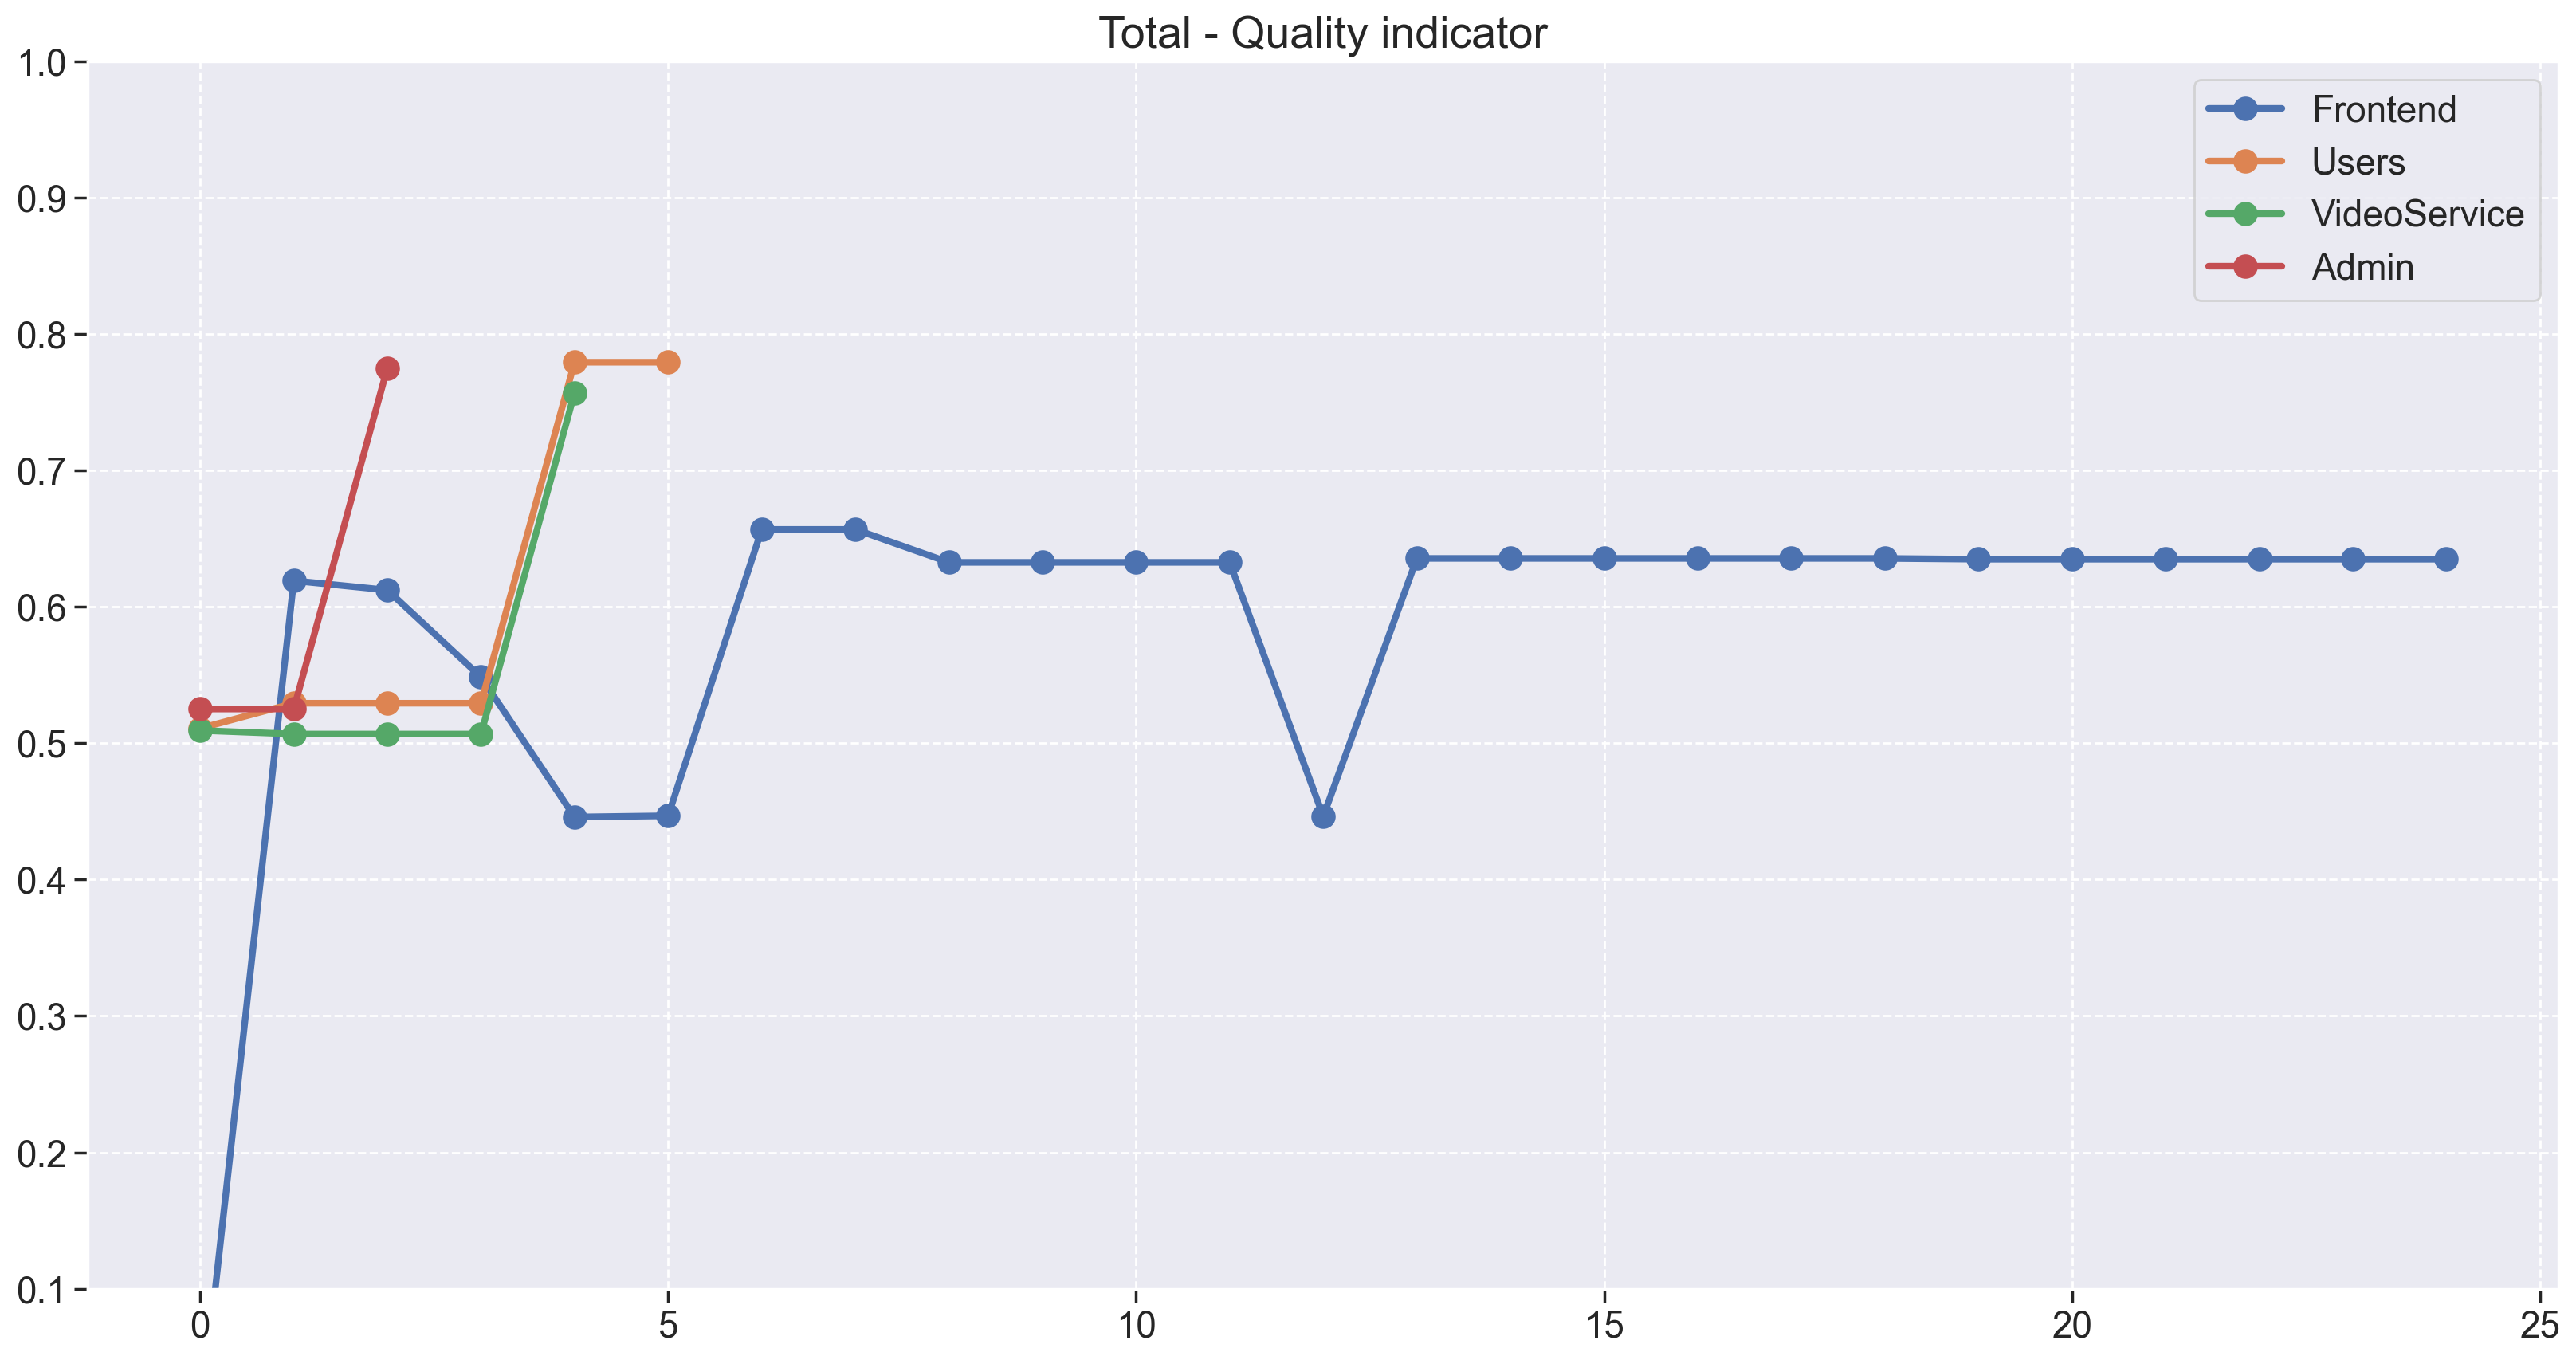

In [33]:
fig = plt.figure(figsize=(20, 10))

for name, data in metrics.items():
    plt.plot(data['total'], linewidth=3, marker='o', markersize=10, label=name)

plt.ylim(.1,1)
plt.title("Total - Quality indicator", fontsize=20)
plt.legend(loc='best')
plt.show()

## Export data

In [34]:
metrics_list = metrics.values()

metrics_df = pd.concat(metrics_list, ignore_index=True)

display(metrics_df)

current_datetime = datetime.datetime.now().strftime("%m-%d-%Y--%H-%M-%S")

metrics_df.to_excel('./data/fga-eps-mds-2023-2-UnB-TV--{}.xlsx'.format(current_datetime), index = False)

metrics_df.to_csv('./data/fga-eps-mds-2023-2-UnB-TV--{}.csv'.format(current_datetime), index = False)

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,fga-eps-mds-2023.2-UnB-TV-Frontend,11-16-2023-02-32-10,11846,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.703704,0.000000,1.0,0.0,1.0,0.851852,fga-eps-mds-2023.2-UnB-TV-Frontend,11-16-2023-21-00-54,5687,0.562222,0.675926,0.281111,0.337963,0.619074
2,0.680000,0.000000,1.0,0.0,1.0,0.840000,fga-eps-mds-2023.2-UnB-TV-Frontend,11-16-2023-21-18-11,6509,0.554400,0.670000,0.277200,0.335000,0.612200
3,0.692308,0.000000,1.0,0.0,1.0,0.576923,fga-eps-mds-2023.2-UnB-TV-Frontend,11-16-2023-21-26-01,6679,0.558462,0.538462,0.279231,0.269231,0.548462
4,0.944444,0.000000,1.0,0.0,1.0,0.000000,fga-eps-mds-2023.2-UnB-TV-Frontend,11-17-2023-20-40-19,7416,0.641667,0.250000,0.320833,0.125000,0.445833
5,0.950000,0.000000,1.0,0.0,1.0,0.000000,fga-eps-mds-2023.2-UnB-TV-Frontend,11-18-2023-21-18-35,7669,0.643500,0.250000,0.321750,0.125000,0.446750
6,0.833333,0.000000,1.0,0.0,1.0,0.916667,fga-eps-mds-2023.2-UnB-TV-Frontend,11-20-2023-12-24-48,7745,0.605000,0.708333,0.302500,0.354167,0.656667
7,0.833333,0.000000,1.0,0.0,1.0,0.916667,fga-eps-mds-2023.2-UnB-TV-Frontend,11-20-2023-12-33-09,8368,0.605000,0.708333,0.302500,0.354167,0.656667
8,0.750000,0.000000,1.0,0.0,1.0,0.875000,fga-eps-mds-2023.2-UnB-TV-Frontend,11-22-2023-00-39-26,6040,0.577500,0.687500,0.288750,0.343750,0.632500
9,0.750000,0.000000,1.0,0.0,1.0,0.875000,fga-eps-mds-2023.2-UnB-TV-Frontend,11-22-2023-23-14-56,6128,0.577500,0.687500,0.288750,0.343750,0.632500


### 1) No microsserviço de backend que apresentar o pior indicador de manutenibilidade indique qual(is) o(s) módulos/arquivos mais críticos e explique como seu time tratou esse problema.

### 2) No microsserviço que apresentar o pior indicador de confiabilidade, explique como seu time tratou esse problema.

### 3) Explique o comportamento da qualidade do produto, observada ao longo do tempo do desenvolvimento, do projeto relacionado ao seu time.